In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import joblib, json, sys, os
from IPython.display import Image, display_png

sys.path.append("../script/")
#from MergeBrain import WholeBrainCells
import matplotlib.pyplot as plt
import pandas as pd

import sys, os, os.path, re, csv, math
import linecache
import numpy as  np
import pandas as pd
from matplotlib import pyplot as plt
from statistics import mean,stdev
import seaborn as sns

import csv
import pprint
#import ants
import tifffile
from multiprocessing import Pool
import datetime
from itertools import product

import numpy as np
import tifffile
import os
import pickle
import joblib
import pandas as pd
from matplotlib import pyplot as plt
import concurrent.futures
import gc
import json

In [3]:
conditions = {
    "WT_0.2m": ["#3_1w_B6JWT_atlas_1_2022_1103_2305","1w_B6JWT_atlas_2_2022_1219_1829", "1w_B6JWT_atlas_3_2022_1223_1719", "1w_B6JWT_atlas_4_2023_0105_1708"],
   "WT_0.75m": ["3w_B6JWT_atlas_1_2022_0925_1526", "3w_B6JWT_atlas_2_2022_1004_928", "3w_B6JWT_atlas_3_2022_1017_2126", "3w_B6JWT_atlas_4_2022_1130_1051"],
    
    "WT_1m": ["#4_APPmodel_Ctr1m_1_2022_1104_1550","#4_APPmodel_Ctr1m_2_2022_1108_959","#4_APPmodel_Ctr1m_3_2022_1209_1751"],
    "WT_2m": ["8w_B6JWT_atlas_1_2022_0924_1847","8w_B6JWT_atlas_2_2022_0926_1326", "8w_B6JWT_atlas_3_2022_1005_1110", "8w_B6JWT_atlas_4_2022_1010_2030","8w_B6JWT_atlas_5_2023_0423_1604",],
    "WT_3m": ["#5_APPmodel_Ctr3m_1_2023_0113_1230", "#5_APPmodel_Ctr3m_2_2023_0210_1142", "#5_APPmodel_Ctr3m_3_2023_0227_1605", "#4_APPmodel_Ctr3m_4_2023_0427_1444",],
    "WT_5m": ["#4_APPmodel_Ctr5m_1_2022_1026_252", "#4_APPmodel_Ctr5m_2_2022_1028_2336", "#4_APPmodel_Ctr5m_3_2022_1101_140", "#4_APPmodel_Ctr5m_4_2023_0512_2057"],
    "WT_7m": [ "#5_APPmodel_Ctr7m_1_2023_0206_1534","#5_APPmodel_Ctr7m_2_2023_0313_1111","#5_APPmodel_Ctr7m_3_2023_0331_2139","#4_APPmodel_Ctr7m_4_2023_0516_1559","#5_APPmodel_Ctr7m_5_2023_0522_2218"],
    "WT_9m": [ "#5_APPmodel_Ctr9m_1_2023_0130_1607", "#5_APPmodel_Ctr9m_2_2023_0216_2052" ,"#5_APPmodel_Ctr9m_3_2023_0322_2014","#5_APPmodel_Ctr9m_4_2023_0518_1449"],
    "WT_12m": ["56w_B6JWT_atlas_1_2022_1128_1548", "56w_B6JWT_atlas_2_2022_1221_1537", "56w_B6JWT_atlas_3_2022_1224_1718"],
    "APP_1m": ["#4_APPmodel_APP1m_1_2022_1102_1304", "#4_APPmodel_APP1m_2_2022_1106_1708","#4_APPmodel_APP1m_3_2022_1213_2151","#4_APPmodel_APP1m_4_2023_0417_2052", ],
    "APP_3m": [ "#5_APPmodel_APP3m_2_2023_0123_1645", "#5_APPmodel_APP3m_3_2023_0212_2217","#5_APPmodel_APP3m_4_2023_0214_2027","#4_APPmodel_APP3m_5_2023_0502_1423",],
   "APP_5m": ["#4_APPmodel_APP5m_1_2022_1024_1336", "#4_APPmodel_APP5m_2_2022_1027_1333","#4_APPmodel_APP5m_3_2022_1030_1257", "#4_APPmodel_APP5m_4_2023_0509_1021"],
    "APP_7m": ["#5_APPmodel_APP7m_2_2023_0315_1540","#5_APPmodel_APP7m_3_2023_0310_1401","#5_APPmodel_APP7m_4_2023_0317_1630", "#5_APPmodel_APP7m_5_2023_0520_1723"],
    "APP_9m": ["#5_APPmodel_APP9m_1_2023_0117_1352","#5_APPmodel_APP9m_2_2023_0327_1425", "#5_APPmodel_APP9m_3_2023_0329_1611", "#5_APPmodel_APP9m_4_2023_0403_1443" ],
    
    "VCP_mut_2m": ["VCPmodel_E524A_0.5x_1_2022_0624_1303", "VCPmodel_E524A_0.5x_2_2022_0626_1338", "VCPmodel_E524A_0.5x_4_2022_0922_1217", "VCPmodel_E524A_0.5x_6_2022_0628_1157"], 
   "VCP_WT_2m": ["VCPmodel_WT_0.5x_1_2022_0625_1104","VCPmodel_WT_0.5x_2_2022_0917_1808", "VCPmodel_WT_0.5x_3_2022_0627_1257", "VCPmodel_WT_0.5x_4_2022_0921_950","VCPmodel_WT_0.5x_5_2022_0923_1454","VCPmodel_WT_0.5x_6_2022_0929_953"],
    "newVCP_mut_2m": ["#5_VCPmodel_E524A_0.5x_1_2023_0120_1929","#5_VCPmodel_E524A_0.5x_2_2023_0407_1031", "#5_VCPmodel_E524A_0.5x_3_2023_0413_2036"], 
   "newVCP_WT_2m": ["#5_VCPmodel_WT_0.5x_1_2023_0405_1108","#5_VCPmodel_WT_0.5x_2_2023_0115_1852","#5_VCPmodel_WT_0.5x_3_2023_0410_1246"], 
    
    "TMT_2m": ["#3_TMTmodel_TMT3.0_8w_1_2022_1014_1410", "#3_TMTmodel_TMT3.0_8w_2_2022_1020_938", "#3_TMTmodel_TMT3.0_8w_3_2022_1023_501", "#3_TMTmodel_TMT_8w_5_2022_1205_1147",],
  "Saline_2m": ["#3_TMTmodel_Saline_8w_1_2022_1016_1318", "#3_TMTmodel_Saline_8w_2_2022_1018_2103","#3_TMTmodel_Saline_8w_3_2022_1021_1910", "#3_TMTmodel_Saline_8w_4_2022_1202_1349", "#3_TMTmodel_Saline_8w_5_2022_1217_1723", "#3_TMTmodel_Saline_8w_6_2022_1216_001"],
    
}

In [4]:
data_Atlas = pd.read_csv(filepath_or_buffer="/export3/Imaging/atlas_for_fig/count_all_rgb.csv", encoding="ms932", sep=",")
# インプットの項目数（行数 * カラム数）を返却します。
data_atlas=np.array(data_Atlas.values.tolist())
#print(data_Atlas.size)
# 指定したカラムだけ抽出したDataFrameオブジェクトを返却します。
data_GO = pd.read_csv(filepath_or_buffer="/export3/Imaging/atlas_for_fig/GOvsID_6region_removed.csv", encoding="ms932", sep=",")
# 指定したカラムだけ抽出したDataFrameオブジェクトを返却します。
data_GO

id  graph_order    R    G    B
0      997            0  255  255  255
1       68            7   38  143   69
2      667            8   38  143   69
3    52192            9   38  143   69
4    52196           10   38  143   69
..     ...          ...  ...  ...  ...
666    129         1299  170  170  170
667    140         1300  170  170  170
668    145         1301  170  170  170
669    153         1302  170  170  170
670    164         1303  170  170  170

[671 rows x 5 columns]

In [5]:
colorlist=[]

total = 0
for i in range (671):
    atlas_id_num = data_GO["id"].values[i]
    colorlist.append((data_GO["R"].values[i]/255,data_GO["G"].values[i]/255,data_GO["B"].values[i]/255))
colorlist_671=colorlist

In [6]:
# 下記は一部のidだけが対象
dir= "/export3/Imaging/cubic-atlas_v1-1/cubic-atlas/"
dir_ana=dir+"summary_CUBIC-Atlas-1-1.csv"


data_id = pd.read_csv(filepath_or_buffer=dir_ana, encoding="ms932", sep=",")
data_id

id acronym                           node_name  graph_order  \
0    997    root                                root            0   
1      8    grey       Basic cell groups and regions            1   
2    567      CH                            Cerebrum            2   
3    688     CTX                     Cerebral cortex            3   
4    695   CTXpl                      Cortical plate            4   
..   ...     ...                                 ...          ...   
834  129      V3                     third ventricle         1299   
835  140      AQ                   cerebral aqueduct         1300   
836  145      V4                    fourth ventricle         1301   
837  153     V4r                      lateral recess         1302   
838  164       c  central canal, spinal cord/medulla         1303   

         rgb_triplet  cell_count  volume(mm3)  density(cells/mm3)  
0    [255, 255, 255]    78620375    506.05289        155359.99590  
1    [191, 218, 227]    70525778    449.60086        156863.08540  
2    [176, 240, 255]    39291452    275.87673        142423.94190  
3    [176, 255, 184]    31750427    221.54964        143310.66800  
4    [112, 255, 112]    30687805    212.64380        144315.54300  
..               ...         ...          ...                 ...  
834  [170, 170, 170]      144614      0.90005        160673.85380  
835  [170, 170, 170]       26972      0.40620         66400.27696  
836  [170, 170, 170]      118275      0.96495        122570.72070  
837  [170, 170, 170]       71934      0.46333        155254.98260  
838  [170, 170, 170]          68      0.00048        140387.09680  

[839 rows x 8 columns]

In [7]:
region_name=[]

for i in data_GO["id"]:
    region_name.append(data_id["acronym"][data_id["id"]==i].values)
region_name

[array(['root'], dtype=object),
 array(['FRP1'], dtype=object),
 array(['FRP2/3'], dtype=object),
 array(['FRP5'], dtype=object),
 array(['FRP6a'], dtype=object),
 array(['FRP6b'], dtype=object),
 array(['MOp1'], dtype=object),
 array(['MOp2/3'], dtype=object),
 array(['MOp5'], dtype=object),
 array(['MOp6a'], dtype=object),
 array(['MOp6b'], dtype=object),
 array(['MOs1'], dtype=object),
 array(['MOs2/3'], dtype=object),
 array(['MOs5'], dtype=object),
 array(['MOs6a'], dtype=object),
 array(['MOs6b'], dtype=object),
 array(['SSp-n1'], dtype=object),
 array(['SSp-n2/3'], dtype=object),
 array(['SSp-n4'], dtype=object),
 array(['SSp-n5'], dtype=object),
 array(['SSp-n6a'], dtype=object),
 array(['SSp-n6b'], dtype=object),
 array(['SSp-bfd1'], dtype=object),
 array(['SSp-bfd2/3'], dtype=object),
 array(['SSp-bfd4'], dtype=object),
 array(['SSp-bfd5'], dtype=object),
 array(['SSp-bfd6a'], dtype=object),
 array(['SSp-bfd6b'], dtype=object),
 array(['SSp-ll1'], dtype=object),
 array(['SSp-

In [8]:
ids = data_GO["id"].astype(int)
ids=np.array(ids)
ids

array([  997,    68,   667, 52192, 52196, 52264,   320,   943,   648,
         844,   882,   656,   962,   767,  1021,  1085,   558,   838,
         654,   702,   889,   929,   981,   201,  1047,  1070,  1038,
        1062,  1030,   113,  1094,  1128,   478,   510,   878,   657,
         950,   974,  1102,     2,   450,   854,   577,   625,   945,
        1026,  1006,   670,  1086,  1111,     9,   461, 18693, 18697,
       18701, 18705, 18709, 18713,   873,   806,  1035,  1090,   862,
         893,    36,   180,   148,   187,   638,   662,   897,  1106,
        1010,  1058,   857,   849,   527,   600,   678,   252,   156,
         243,   735,   251,   816,   847,   954,  1005,   696,   643,
         759,   791,   249,   456,   959,   755,   990,  1023,   520,
         598,  1074,   905,  1114,   233,   601,   649,   281,  1066,
         401,   433,  1046,   441,   421,   973,   573,   613,    74,
         121,   593,   821,   721,   778,    33,   305,   750,   269,
         869,   902,

In [8]:
# ミクログリアの脱落が神経脱落のリスクになるかを検定する
# 生存解析をする。Coxe比例ハザード解析をするか。
# まずは、Cell levelで onsetをきめる
# 有意な変化をもったものに、onsetを与える。

In [9]:
# まずは、APP KI onlyのAverageを作製
# Ctr onlyのほうはaverageはもうすでにできている。

In [10]:
# APP平均をつくる　NeuN


# SCA の Neuronal cellome を読み出し。

dt_SCA2 = np.dtype([
  ('X(um)', 'f4'), ('Y(um)', 'f4'), ('Z(um)', 'f4'),
  ('NeuN_positive','f4'),('Iba1_positive','f4'),('atlasID', 'u2')
])
grid_points_ori = np.fromfile('/export3/Imaging/Axial/Neurorology/8w_B6JWT_atlas_1_2022_0924_1847/intensities_/SCA_Cellome_data_original.bin', dtype=dt_SCA2)

grid_points_ori  = pd.DataFrame(grid_points_ori )

# NeuN+ だけにする。
grid_points = grid_points_ori[grid_points_ori["NeuN_positive"]>0]

grid_points.reset_index(drop=True, inplace=True)

grid_points ["id"] = range(len(grid_points ))

print(len(grid_points))


start_time = datetime.datetime.now()
print("Start time:", start_time)

import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.stats.multitest import multipletests

import numpy as np

dt_voxel = np.dtype([
  ('X(um)', 'f4'), ('Y(um)', 'f4'), ('Z(um)', 'f4'),
  ('NeuN_neighbor_r_100um','f4'), ('atlasID', 'u2')
])

dt_voxel2 = np.dtype([
    ('X(um)', 'f4'), ('Y(um)', 'f4'), ('Z(um)', 'f4'),
    ('NeuN_neighbor_r_100um_0_10um', 'u4'),
    ('NeuN_neighbor_r_100um_10_20um', 'u4'),
    ('NeuN_neighbor_r_100um_20_30um', 'u4'),
    ('NeuN_neighbor_r_100um_30_40um', 'u4'),
    ('NeuN_neighbor_r_100um_40_50um', 'u4'),
    ('NeuN_neighbor_r_100um_50_60um', 'u4'),
    ('NeuN_neighbor_r_100um_60_70um', 'u4'),
    ('NeuN_neighbor_r_100um_70_80um', 'u4'),
    ('NeuN_neighbor_r_100um_80_90um', 'u4'),
    ('NeuN_neighbor_r_100um_90_100um', 'u4'),
    ('atlasID', 'u2')
])

# サンプルごとにデータを読み込んで 'Condition' 列を追加する関数を修正
def load_data(sample_info):
    df_list = []
    for sample, condition in sample_info:  # sample_infoには(sample_path, condition)のタプルが格納されている
        param_path = f"/home/mitani/CUBIC-informatics/param/Neuronomics/{sample}/param_multichannel-rank.json"
        try:
            with open(param_path) as f:
                param = json.load(f)
            fw_dir_nu = param["dst_basedir"]

            cellome_file = fw_dir_nu + "/Neuronal_cellome_ring_6.bin"
            if os.path.exists(cellome_file):  # 確認するファイルパスに注意
                print(sample)
                df = np.fromfile(cellome_file, dtype=dt_voxel)
                df = pd.DataFrame(df)
                #df['NeuN_neighbor_r_100um'] = pd.Series([0]*len(df))
                #for i in range(10):
                #    field_name = f'NeuN_neighbor_r_100um_{i*10}_{i*10+10}um'
                #    df['NeuN_neighbor_r_100um']  += df[field_name]
                df['Condition'] = condition  # 'Condition' 列を追加
                df['Sample'] = sample  # サンプル名を追加
                df["Grid_id"] = grid_points["id"]
                df_list.append(df)
                del df
                gc.collect()
            else: 
                print("Not exist: " + str(sample))
        except Exception as e:
            print(f"Error loading data for {sample}: {e}")

    return pd.concat(df_list, ignore_index=True) if df_list else pd.DataFrame()

# Healthy controlとDiseaseのサンプル情報のタプルを取得
healthy_sample_info = [(s, c) for c in ["APP_1m","APP_3m","APP_5m", "APP_7m", "APP_9m"] for s in conditions[c]]
#disease_sample_info = [(s, c) for c in ["APP_1m","APP_3m","APP_5m", "APP_7m", "APP_9m", ] for s in conditions[c]]
num_samples = len(healthy_sample_info)  # サンプルの数

sample_size = len(grid_points)  # 各サンプルのサイズ
print(num_samples)
        
# 使用例
output_directory = '/export2/Imaging/ds4_Data4/Cellome/AgeAPP'
#save_data_in_chunks(all_arrays, output_directory)
max_groups_per_file = 25000
#save_grouped_data(structured_array, grouped_data, output_directory, max_groups_per_file)
#save_grouped_data(structured_array, num_samples, sample_size, output_directory, max_groups_per_file)


# 条件でまとめた.binを保存。同じ grid点にgroup化されたものを同じ配列にする。Conditionをつける。[1, 5, 〇〇]みたいに
# つまり、[Disease_factor, Age, 数字]　にする。
# その際、最大が25000行になるようにし、分割して保存
# Rで.binを読み込み、pとcoefを計算し、.binで別folderに保存

import os
import subprocess

def Cell_density_image_GLM_NB(cell_path, condition, sample_num, R_code_method_path, threads):
    # ディレクトリ内のファイルリストを取得
    # '.bin'で終わり、'out_'で始まらないファイルのみを選択
    file_list = [f for f in os.listdir(cell_path) if f.endswith('.bin') and not f.startswith('out_')]
    file_list.sort()  # ファイル名でソート

    # Rスクリプトの実行
    proc_list = []
    for i, file_name in enumerate(file_list):
        input_path = os.path.join(cell_path, file_name)  # 入力ファイルの完全パス
        output_path = os.path.join(cell_path, f"out_{file_name}")  # 出力ファイルの完全パス

        # Rスクリプトコマンドの構築
        shcom = f"Rscript {R_code_method_path} {input_path} {output_path} {sample_num}"
        print(shcom)  # コマンドを表示

        # スクリプトの非同期実行
        proc = subprocess.Popen(shcom.split())
        proc_list.append(proc)

        # スレッドの管理
        if (i + 1) % threads == 0 or (i + 1) == len(file_list):
            for subproc in proc_list:
                subproc.wait()
            proc_list = []
            
def Cell_density_averaging_time_course (cell_path, condition, sample_num, R_code_method_path, threads):
    # ディレクトリ内のファイルリストを取得
    # '.bin'で終わり、'out_'で始まらないファイルのみを選択
    file_list = [f for f in os.listdir(cell_path) if f.endswith('.bin') and not f.startswith('out_') ]
    file_list.sort()  # ファイル名でソート

    # Rスクリプトの実行
    proc_list = []
    for i, file_name in enumerate(file_list):
        input_path = os.path.join(cell_path, file_name)  # 入力ファイルの完全パス
        output_path = os.path.join(cell_path.replace("AgeAPP", "AgeAPP_time_course_average" ), f"average_{file_name}")  # 出力ファイルの完全パス

        # Rスクリプトコマンドの構築
        shcom = f"Rscript {R_code_method_path} {input_path} {output_path} {sample_num}"
        print(shcom)  # コマンドを表示

        # スクリプトの非同期実行
        proc = subprocess.Popen(shcom.split())
        proc_list.append(proc)

        # スレッドの管理
        if (i + 1) % threads == 0 or (i + 1) == len(file_list):
            for subproc in proc_list:
                subproc.wait()
            proc_list = []

start_time = datetime.datetime.now()
print("Start time:", start_time)

# 使用例
R_code_method_path = "/home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R" #平均値とdata pointの数を保存する。
sample_num = 20 #23 
Cell_density_averaging_time_course('/export2/Imaging/ds4_Data4/Cellome/AgeAPP', "Disease_factor", sample_num, R_code_method_path, 80)


end_time = datetime.datetime.now()
print("End time:", end_time)
print("Duration:", end_time - start_time)

import os
import numpy as np

# ファイルパス
file_path = '/export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average'
# coefとp_valueのデータ型の定義
dt_results = np.dtype([('mean_age1', '<f8'), ('mean_age3', '<f8'), ('mean_age5', '<f8'), ('mean_age7', '<f8'), ('mean_age9', '<f8')])

# 結果を読み込むリスト
all_results = []

# ファイル名から数字部分を抽出して、数値とファイル名のタプルのリストを作成する
file_list_with_numbers = []
for file_name in os.listdir(file_path):
    if file_name.startswith('average_') and file_name.endswith('.bin'):
        number_match = re.search(r'\d+', file_name)
        if number_match:
            file_number = int(number_match.group())
            file_list_with_numbers.append((file_number, file_name))

# 数値でソートされたファイル名のリストを作成
sorted_file_list = [file_name for _, file_name in sorted(file_list_with_numbers)]

# ファイルごとに処理
for file_name in sorted_file_list:
    print(file_name)
    file_full_path = os.path.join(file_path, file_name)
    with open(file_full_path, 'rb') as f:
        # データを読み込む
        while True:
            data_bytes = f.read(dt_results.itemsize)
            if not data_bytes:
                break  # データが不足していれば読み込み終了
            # coefとp_valueを読み込む
            mean_age1, mean_age3, mean_age5, mean_age7, mean_age9 = np.frombuffer(data_bytes, dtype=dt_results)[0]
            all_results.append((mean_age1, mean_age3, mean_age5, mean_age7, mean_age9))

dt_SCA2 = np.dtype([
  ('X(um)', 'f4'), ('Y(um)', 'f4'), ('Z(um)', 'f4'),
  ('NeuN_positive','f4'),('Iba1_positive','f4'),('atlasID', 'u2')
])
grid_points_ori = np.fromfile('/export3/Imaging/Axial/Neurorology/8w_B6JWT_atlas_1_2022_0924_1847/intensities_/SCA_Cellome_data_original.bin', dtype=dt_SCA2)

grid_points_ori  = pd.DataFrame(grid_points_ori )

# NeuN+ だけにする。
grid_points = grid_points_ori[grid_points_ori["NeuN_positive"]>0]

grid_points.reset_index(drop=True, inplace=True)

grid_points ["id"] = range(len(grid_points ))

all_results = np.array(all_results)
#all_results.T[1][all_results.T[1]==0.0] = 1.0 # pvalue 0があれば、1に置換

import matplotlib.pyplot as plt
from statsmodels.stats.multitest import multipletests

grid_points["mean"] = all_results.T[4] # 9m
#grid_points[""] = all_results.T[1] 
#_, p_adjusted, _, _ = multipletests(all_results.T[1], method='fdr_bh')
#grid_points["adjusted_pvalue"] = p_adjusted
#grid_points['-log10(adjusted_pvalue)'] = -np.log10(grid_points['adjusted_pvalue'])

del all_results
gc.collect()

import numpy as np
import tifffile
import pandas as pd
# 3D画像の元のサイズ
depth_ori = int(np.round(800 / 2.5))
height_ori = int(np.round(1320 /2.5))
width_ori = int(np.round(1140 /2.5))

# 空の3D配列（画像）を作成
image_3d = np.zeros((depth_ori, height_ori, width_ori), dtype=np.float32)

# nearest_id が 0 より大きい行のみを選択
filtered_df = grid_points

# x, y, z 列を整数のNumPy配列に変換し、インデックス用に使用
z_indices = (filtered_df['Z(um)']* (1/25)).astype(int)
y_indices = (filtered_df['Y(um)']* (1/25)).astype(int)
x_indices = (filtered_df['X(um)']* (1/25)).astype(int)
# IDsをnp.int32型に変換してオーバーフローを防ぐ
ids = filtered_df['mean'].astype(np.float32)

# 高度なインデクシングを使用して3D画像にIDを割り当て
image_3d[z_indices, y_indices, x_indices] = ids

# Save the 3D array as a TIFF file
img_filename_Nuclear_Isocortex_to_ori = "/export2/Imaging/ds4_Data4/atlas/test_AgeAPP_time_course_average_cellome_mean.tif"
tifffile.imsave(img_filename_Nuclear_Isocortex_to_ori, image_3d.astype(np.float32))

del image_3d, z_indices, y_indices, x_indices, ids
gc.collect()

del grid_points
gc.collect()

end_time = datetime.datetime.now()
print("All End time:", end_time)
print("Duration:", end_time - start_time)

/home/mitani/my_env/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


51614573
Start time: 2024-07-20 15:43:55.644958
20
Start time: 2024-07-20 15:43:55.809368
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_0.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_0.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_10.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_10.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_100.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_100.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1030.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1030.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1031.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1031.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1032.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1032.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1033.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1033.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1065.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1065.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1066.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1066.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1067.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1067.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1068.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1068.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_11.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_11.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_110.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_110.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1100.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1100.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1101.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1101.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1133.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1133.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1134.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1134.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1135.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1135.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1136.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1136.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1168.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1168.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1169.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1169.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_117.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_117.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1170.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1170.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/A

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1201.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1201.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1202.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1202.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1203.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1203.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1204.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1204.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1236.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1236.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1237.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1237.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1238.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1238.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1239.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1239.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1270.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1270.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1271.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1271.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1272.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1272.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1273.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1273.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1304.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1304.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1305.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1305.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1306.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1306.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1307.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1307.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1339.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1339.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_134.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_134.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1340.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1340.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1341.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1341.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/A

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1373.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1373.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1374.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1374.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1375.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1375.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1376.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1376.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1407.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1407.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1408.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1408.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1409.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1409.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_141.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_141.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/A

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1441.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1441.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1442.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1442.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1443.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1443.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1444.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1444.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1476.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1476.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1477.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1477.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1478.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1478.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1479.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1479.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1510.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1510.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1511.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1511.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1512.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1512.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1513.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1513.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1545.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1545.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1546.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1546.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1547.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1547.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1548.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1548.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_158.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_158.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1580.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1580.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1581.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1581.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1582.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1582.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/A

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1613.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1613.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1614.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1614.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1615.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1615.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1616.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1616.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1648.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1648.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1649.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1649.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_165.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_165.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1650.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1650.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/A

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1682.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1682.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1683.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1683.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1684.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1684.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1685.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1685.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1716.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1716.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1717.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1717.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1718.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1718.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1719.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1719.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1750.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1750.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1751.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1751.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1752.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1752.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1753.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1753.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1785.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1785.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1786.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1786.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1787.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1787.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1788.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1788.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1819.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1819.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_182.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_182.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1820.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1820.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1821.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1821.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/A

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1853.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1853.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1854.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1854.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1855.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1855.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1856.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1856.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1888.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1888.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1889.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1889.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_189.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_189.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1890.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1890.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/A

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1921.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1921.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1922.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1922.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1923.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1923.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1924.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1924.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1956.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1956.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1957.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1957.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1958.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1958.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1959.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1959.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1990.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1990.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1991.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1991.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1992.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1992.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_1993.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_1993.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_2023.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_2023.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_2024.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_2024.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_2025.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_2025.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_2026.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_2026.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_2058.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_2058.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_2059.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_2059.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_206.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_206.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_2060.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_2060.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/A

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_234.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_234.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_235.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_235.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_236.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_236.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_237.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_237.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_238

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_269.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_269.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_27.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_27.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_270.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_270.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_271.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_271.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_272.b

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_302.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_302.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_303.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_303.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_304.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_304.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_305.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_305.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_306

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_337.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_337.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_338.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_338.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_339.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_339.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_34.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_34.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_340.b

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_371.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_371.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_372.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_372.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_373.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_373.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_374.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_374.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_375

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_405.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_405.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_406.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_406.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_407.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_407.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_408.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_408.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_409

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_440.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_440.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_441.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_441.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_442.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_442.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_443.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_443.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_444

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_475.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_475.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_476.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_476.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_477.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_477.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_478.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_478.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_479

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_509.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_509.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_51.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_51.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_510.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_510.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_511.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_511.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_512.b

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_543.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_543.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_544.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_544.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_545.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_545.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_546.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_546.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_547

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_578.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_578.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_579.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_579.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_58.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_58.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_580.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_580.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_581.b

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_611.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_611.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_612.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_612.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_613.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_613.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_614.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_614.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_615

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_646.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_646.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_647.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_647.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_648.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_648.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_649.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_649.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_65.

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_680.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_680.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_681.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_681.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_682.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_682.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_683.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_683.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_684

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_714.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_714.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_715.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_715.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_716.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_716.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_717.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_717.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_718

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_75.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_75.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_750.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_750.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_751.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_751.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_752.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_752.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_753.b

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_784.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_784.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_785.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_785.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_786.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_786.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_787.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_787.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_788

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_819.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_819.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_82.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_82.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_820.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_820.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_821.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_821.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_822.b

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_853.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_853.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_854.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_854.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_855.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_855.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_856.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_856.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_857

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_888.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_888.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_889.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_889.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_89.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_89.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_890.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_890.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_891.b

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_921.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_921.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_922.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_922.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_923.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_923.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_924.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_924.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_925

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_957.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_957.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_958.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_958.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_959.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_959.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_96.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_96.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_960.b

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_991.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_991.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_992.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_992.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_993.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_993.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_994.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_time_course_average/average_Age_994.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP/Age_995

average_Age_314.bin
average_Age_315.bin
average_Age_316.bin
average_Age_317.bin
average_Age_318.bin
average_Age_319.bin
average_Age_320.bin
average_Age_321.bin
average_Age_322.bin
average_Age_323.bin
average_Age_324.bin
average_Age_325.bin
average_Age_326.bin
average_Age_327.bin
average_Age_328.bin
average_Age_329.bin
average_Age_330.bin
average_Age_331.bin
average_Age_332.bin
average_Age_333.bin
average_Age_334.bin
average_Age_335.bin
average_Age_336.bin
average_Age_337.bin
average_Age_338.bin
average_Age_339.bin
average_Age_340.bin
average_Age_341.bin
average_Age_342.bin
average_Age_343.bin
average_Age_344.bin
average_Age_345.bin
average_Age_346.bin
average_Age_347.bin
average_Age_348.bin
average_Age_349.bin
average_Age_350.bin
average_Age_351.bin
average_Age_352.bin
average_Age_353.bin
average_Age_354.bin
average_Age_355.bin
average_Age_356.bin
average_Age_357.bin
average_Age_358.bin
average_Age_359.bin
average_Age_360.bin
average_Age_361.bin
average_Age_362.bin
average_Age_363.bin


average_Age_724.bin
average_Age_725.bin
average_Age_726.bin
average_Age_727.bin
average_Age_728.bin
average_Age_729.bin
average_Age_730.bin
average_Age_731.bin
average_Age_732.bin
average_Age_733.bin
average_Age_734.bin
average_Age_735.bin
average_Age_736.bin
average_Age_737.bin
average_Age_738.bin
average_Age_739.bin
average_Age_740.bin
average_Age_741.bin
average_Age_742.bin
average_Age_743.bin
average_Age_744.bin
average_Age_745.bin
average_Age_746.bin
average_Age_747.bin
average_Age_748.bin
average_Age_749.bin
average_Age_750.bin
average_Age_751.bin
average_Age_752.bin
average_Age_753.bin
average_Age_754.bin
average_Age_755.bin
average_Age_756.bin
average_Age_757.bin
average_Age_758.bin
average_Age_759.bin
average_Age_760.bin
average_Age_761.bin
average_Age_762.bin
average_Age_763.bin
average_Age_764.bin
average_Age_765.bin
average_Age_766.bin
average_Age_767.bin
average_Age_768.bin
average_Age_769.bin
average_Age_770.bin
average_Age_771.bin
average_Age_772.bin
average_Age_773.bin


average_Age_1128.bin
average_Age_1129.bin
average_Age_1130.bin
average_Age_1131.bin
average_Age_1132.bin
average_Age_1133.bin
average_Age_1134.bin
average_Age_1135.bin
average_Age_1136.bin
average_Age_1137.bin
average_Age_1138.bin
average_Age_1139.bin
average_Age_1140.bin
average_Age_1141.bin
average_Age_1142.bin
average_Age_1143.bin
average_Age_1144.bin
average_Age_1145.bin
average_Age_1146.bin
average_Age_1147.bin
average_Age_1148.bin
average_Age_1149.bin
average_Age_1150.bin
average_Age_1151.bin
average_Age_1152.bin
average_Age_1153.bin
average_Age_1154.bin
average_Age_1155.bin
average_Age_1156.bin
average_Age_1157.bin
average_Age_1158.bin
average_Age_1159.bin
average_Age_1160.bin
average_Age_1161.bin
average_Age_1162.bin
average_Age_1163.bin
average_Age_1164.bin
average_Age_1165.bin
average_Age_1166.bin
average_Age_1167.bin
average_Age_1168.bin
average_Age_1169.bin
average_Age_1170.bin
average_Age_1171.bin
average_Age_1172.bin
average_Age_1173.bin
average_Age_1174.bin
average_Age_1

average_Age_1520.bin
average_Age_1521.bin
average_Age_1522.bin
average_Age_1523.bin
average_Age_1524.bin
average_Age_1525.bin
average_Age_1526.bin
average_Age_1527.bin
average_Age_1528.bin
average_Age_1529.bin
average_Age_1530.bin
average_Age_1531.bin
average_Age_1532.bin
average_Age_1533.bin
average_Age_1534.bin
average_Age_1535.bin
average_Age_1536.bin
average_Age_1537.bin
average_Age_1538.bin
average_Age_1539.bin
average_Age_1540.bin
average_Age_1541.bin
average_Age_1542.bin
average_Age_1543.bin
average_Age_1544.bin
average_Age_1545.bin
average_Age_1546.bin
average_Age_1547.bin
average_Age_1548.bin
average_Age_1549.bin
average_Age_1550.bin
average_Age_1551.bin
average_Age_1552.bin
average_Age_1553.bin
average_Age_1554.bin
average_Age_1555.bin
average_Age_1556.bin
average_Age_1557.bin
average_Age_1558.bin
average_Age_1559.bin
average_Age_1560.bin
average_Age_1561.bin
average_Age_1562.bin
average_Age_1563.bin
average_Age_1564.bin
average_Age_1565.bin
average_Age_1566.bin
average_Age_1

average_Age_1911.bin
average_Age_1912.bin
average_Age_1913.bin
average_Age_1914.bin
average_Age_1915.bin
average_Age_1916.bin
average_Age_1917.bin
average_Age_1918.bin
average_Age_1919.bin
average_Age_1920.bin
average_Age_1921.bin
average_Age_1922.bin
average_Age_1923.bin
average_Age_1924.bin
average_Age_1925.bin
average_Age_1926.bin
average_Age_1927.bin
average_Age_1928.bin
average_Age_1929.bin
average_Age_1930.bin
average_Age_1931.bin
average_Age_1932.bin
average_Age_1933.bin
average_Age_1934.bin
average_Age_1935.bin
average_Age_1936.bin
average_Age_1937.bin
average_Age_1938.bin
average_Age_1939.bin
average_Age_1940.bin
average_Age_1941.bin
average_Age_1942.bin
average_Age_1943.bin
average_Age_1944.bin
average_Age_1945.bin
average_Age_1946.bin
average_Age_1947.bin
average_Age_1948.bin
average_Age_1949.bin
average_Age_1950.bin
average_Age_1951.bin
average_Age_1952.bin
average_Age_1953.bin
average_Age_1954.bin
average_Age_1955.bin
average_Age_1956.bin
average_Age_1957.bin
average_Age_1

/home/mitani/my_env/lib/python3.6/site-packages/ipykernel_launcher.py:228: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib/python3.6/site-packages/ipykernel_launcher.py:236: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


All End time: 2024-07-20 16:30:04.579025
Duration: 0:46:08.769657


In [8]:
# APP平均をつくる　Iba1


# SCA の Neuronal cellome を読み出し。

dt_SCA2 = np.dtype([
  ('X(um)', 'f4'), ('Y(um)', 'f4'), ('Z(um)', 'f4'),
  ('NeuN_positive','f4'),('Iba1_positive','f4'),('atlasID', 'u2')
])
grid_points_ori = np.fromfile('/export3/Imaging/Axial/Neurorology/8w_B6JWT_atlas_1_2022_0924_1847/intensities_/SCA_Cellome_data_original.bin', dtype=dt_SCA2)

grid_points_ori  = pd.DataFrame(grid_points_ori )

# NeuN+ だけにする。
grid_points = grid_points_ori[grid_points_ori["NeuN_positive"]>0]

grid_points.reset_index(drop=True, inplace=True)

grid_points ["id"] = range(len(grid_points ))

print(len(grid_points))


start_time = datetime.datetime.now()
print("Start time:", start_time)

import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.stats.multitest import multipletests

import numpy as np

dt_voxel = np.dtype([
  ('X(um)', 'f4'), ('Y(um)', 'f4'), ('Z(um)', 'f4'),
  ('NeuN_neighbor_r_100um','f4'), ('atlasID', 'u2')
])

dt_voxel2 = np.dtype([
    ('X(um)', 'f4'), ('Y(um)', 'f4'), ('Z(um)', 'f4'),
    ('NeuN_neighbor_r_100um_0_10um', 'u4'),
    ('NeuN_neighbor_r_100um_10_20um', 'u4'),
    ('NeuN_neighbor_r_100um_20_30um', 'u4'),
    ('NeuN_neighbor_r_100um_30_40um', 'u4'),
    ('NeuN_neighbor_r_100um_40_50um', 'u4'),
    ('NeuN_neighbor_r_100um_50_60um', 'u4'),
    ('NeuN_neighbor_r_100um_60_70um', 'u4'),
    ('NeuN_neighbor_r_100um_70_80um', 'u4'),
    ('NeuN_neighbor_r_100um_80_90um', 'u4'),
    ('NeuN_neighbor_r_100um_90_100um', 'u4'),
    ('atlasID', 'u2')
])

# サンプルごとにデータを読み込んで 'Condition' 列を追加する関数を修正
def load_data(sample_info):
    df_list = []
    for sample, condition in sample_info:  # sample_infoには(sample_path, condition)のタプルが格納されている
        param_path = f"/home/mitani/CUBIC-informatics/param/Neuronomics/{sample}/param_multichannel-rank.json"
        try:
            with open(param_path) as f:
                param = json.load(f)
            fw_dir_nu = param["dst_basedir"]

            cellome_file = fw_dir_nu + "/Neuronal_cellome_ring_6.bin"
            if os.path.exists(cellome_file):  # 確認するファイルパスに注意
                print(sample)
                df = np.fromfile(cellome_file, dtype=dt_voxel)
                df = pd.DataFrame(df)
                #df['NeuN_neighbor_r_100um'] = pd.Series([0]*len(df))
                #for i in range(10):
                #    field_name = f'NeuN_neighbor_r_100um_{i*10}_{i*10+10}um'
                #    df['NeuN_neighbor_r_100um']  += df[field_name]
                df['Condition'] = condition  # 'Condition' 列を追加
                df['Sample'] = sample  # サンプル名を追加
                df["Grid_id"] = grid_points["id"]
                df_list.append(df)
                del df
                gc.collect()
            else: 
                print("Not exist: " + str(sample))
        except Exception as e:
            print(f"Error loading data for {sample}: {e}")

    return pd.concat(df_list, ignore_index=True) if df_list else pd.DataFrame()

# Healthy controlとDiseaseのサンプル情報のタプルを取得
healthy_sample_info = [(s, c) for c in ["APP_1m","APP_3m","APP_5m", "APP_7m", "APP_9m"] for s in conditions[c]]
#disease_sample_info = [(s, c) for c in ["APP_1m","APP_3m","APP_5m", "APP_7m", "APP_9m", ] for s in conditions[c]]
num_samples = len(healthy_sample_info)  # サンプルの数

sample_size = len(grid_points)  # 各サンプルのサイズ
print(num_samples)
        
# 使用例
output_directory = '/export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1'
#save_data_in_chunks(all_arrays, output_directory)
max_groups_per_file = 25000
#save_grouped_data(structured_array, grouped_data, output_directory, max_groups_per_file)
#save_grouped_data(structured_array, num_samples, sample_size, output_directory, max_groups_per_file)


# 条件でまとめた.binを保存。同じ grid点にgroup化されたものを同じ配列にする。Conditionをつける。[1, 5, 〇〇]みたいに
# つまり、[Disease_factor, Age, 数字]　にする。
# その際、最大が25000行になるようにし、分割して保存
# Rで.binを読み込み、pとcoefを計算し、.binで別folderに保存

import os
import subprocess

def Cell_density_image_GLM_NB(cell_path, condition, sample_num, R_code_method_path, threads):
    # ディレクトリ内のファイルリストを取得
    # '.bin'で終わり、'out_'で始まらないファイルのみを選択
    file_list = [f for f in os.listdir(cell_path) if f.endswith('.bin') and not f.startswith('out_')]
    file_list.sort()  # ファイル名でソート

    # Rスクリプトの実行
    proc_list = []
    for i, file_name in enumerate(file_list):
        input_path = os.path.join(cell_path, file_name)  # 入力ファイルの完全パス
        output_path = os.path.join(cell_path, f"out_{file_name}")  # 出力ファイルの完全パス

        # Rスクリプトコマンドの構築
        shcom = f"Rscript {R_code_method_path} {input_path} {output_path} {sample_num}"
        print(shcom)  # コマンドを表示

        # スクリプトの非同期実行
        proc = subprocess.Popen(shcom.split())
        proc_list.append(proc)

        # スレッドの管理
        if (i + 1) % threads == 0 or (i + 1) == len(file_list):
            for subproc in proc_list:
                subproc.wait()
            proc_list = []
            
def Cell_density_averaging_time_course (cell_path, condition, sample_num, R_code_method_path, threads):
    # ディレクトリ内のファイルリストを取得
    # '.bin'で終わり、'out_'で始まらないファイルのみを選択
    file_list = [f for f in os.listdir(cell_path) if f.endswith('.bin') and not f.startswith('out_') ]
    file_list.sort()  # ファイル名でソート

    # Rスクリプトの実行
    proc_list = []
    for i, file_name in enumerate(file_list):
        input_path = os.path.join(cell_path, file_name)  # 入力ファイルの完全パス
        output_path = os.path.join(cell_path.replace("AgeAPP_Iba1", "AgeAPP_Iba1_time_course_average" ), f"average_{file_name}")  # 出力ファイルの完全パス

        # Rスクリプトコマンドの構築
        shcom = f"Rscript {R_code_method_path} {input_path} {output_path} {sample_num}"
        print(shcom)  # コマンドを表示

        # スクリプトの非同期実行
        proc = subprocess.Popen(shcom.split())
        proc_list.append(proc)

        # スレッドの管理
        if (i + 1) % threads == 0 or (i + 1) == len(file_list):
            for subproc in proc_list:
                subproc.wait()
            proc_list = []

start_time = datetime.datetime.now()
print("Start time:", start_time)

# 使用例
R_code_method_path = "/home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R" #平均値とdata pointの数を保存する。
sample_num = 20 #23 
Cell_density_averaging_time_course('/export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1', "Disease_factor", sample_num, R_code_method_path, 80)


end_time = datetime.datetime.now()
print("End time:", end_time)
print("Duration:", end_time - start_time)

import os
import numpy as np

# ファイルパス
file_path = '/export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average'
# coefとp_valueのデータ型の定義
dt_results = np.dtype([('mean_age1', '<f8'), ('mean_age3', '<f8'), ('mean_age5', '<f8'), ('mean_age7', '<f8'), ('mean_age9', '<f8')])

# 結果を読み込むリスト
all_results = []

# ファイル名から数字部分を抽出して、数値とファイル名のタプルのリストを作成する
file_list_with_numbers = []
for file_name in os.listdir(file_path):
    if file_name.startswith('average_') and file_name.endswith('.bin'):
        number_match = re.search(r'\d+', file_name)
        if number_match:
            file_number = int(number_match.group())
            file_list_with_numbers.append((file_number, file_name))

# 数値でソートされたファイル名のリストを作成
sorted_file_list = [file_name for _, file_name in sorted(file_list_with_numbers)]

# ファイルごとに処理
for file_name in sorted_file_list:
    print(file_name)
    file_full_path = os.path.join(file_path, file_name)
    with open(file_full_path, 'rb') as f:
        # データを読み込む
        while True:
            data_bytes = f.read(dt_results.itemsize)
            if not data_bytes:
                break  # データが不足していれば読み込み終了
            # coefとp_valueを読み込む
            mean_age1, mean_age3, mean_age5, mean_age7, mean_age9 = np.frombuffer(data_bytes, dtype=dt_results)[0]
            all_results.append((mean_age1, mean_age3, mean_age5, mean_age7, mean_age9))

dt_SCA2 = np.dtype([
  ('X(um)', 'f4'), ('Y(um)', 'f4'), ('Z(um)', 'f4'),
  ('NeuN_positive','f4'),('Iba1_positive','f4'),('atlasID', 'u2')
])
grid_points_ori = np.fromfile('/export3/Imaging/Axial/Neurorology/8w_B6JWT_atlas_1_2022_0924_1847/intensities_/SCA_Cellome_data_original.bin', dtype=dt_SCA2)

grid_points_ori  = pd.DataFrame(grid_points_ori )

# NeuN+ だけにする。
grid_points = grid_points_ori[grid_points_ori["NeuN_positive"]>0]

grid_points.reset_index(drop=True, inplace=True)

grid_points ["id"] = range(len(grid_points ))

all_results = np.array(all_results)
#all_results.T[1][all_results.T[1]==0.0] = 1.0 # pvalue 0があれば、1に置換

import matplotlib.pyplot as plt
from statsmodels.stats.multitest import multipletests

grid_points["mean"] = all_results.T[4] # 9m
#grid_points[""] = all_results.T[1] 
#_, p_adjusted, _, _ = multipletests(all_results.T[1], method='fdr_bh')
#grid_points["adjusted_pvalue"] = p_adjusted
#grid_points['-log10(adjusted_pvalue)'] = -np.log10(grid_points['adjusted_pvalue'])

del all_results
gc.collect()

import numpy as np
import tifffile
import pandas as pd
# 3D画像の元のサイズ
depth_ori = int(np.round(800 / 2.5))
height_ori = int(np.round(1320 /2.5))
width_ori = int(np.round(1140 /2.5))

# 空の3D配列（画像）を作成
image_3d = np.zeros((depth_ori, height_ori, width_ori), dtype=np.float32)

# nearest_id が 0 より大きい行のみを選択
filtered_df = grid_points

# x, y, z 列を整数のNumPy配列に変換し、インデックス用に使用
z_indices = (filtered_df['Z(um)']* (1/25)).astype(int)
y_indices = (filtered_df['Y(um)']* (1/25)).astype(int)
x_indices = (filtered_df['X(um)']* (1/25)).astype(int)
# IDsをnp.int32型に変換してオーバーフローを防ぐ
ids = filtered_df['mean'].astype(np.float32)

# 高度なインデクシングを使用して3D画像にIDを割り当て
image_3d[z_indices, y_indices, x_indices] = ids

# Save the 3D array as a TIFF file
img_filename_Nuclear_Isocortex_to_ori = "/export2/Imaging/ds4_Data4/atlas/test_AgeAPP_Iba1_time_course_average_cellome_mean.tif"
tifffile.imsave(img_filename_Nuclear_Isocortex_to_ori, image_3d.astype(np.float32))

del image_3d, z_indices, y_indices, x_indices, ids
gc.collect()

del grid_points
gc.collect()

end_time = datetime.datetime.now()
print("All End time:", end_time)
print("Duration:", end_time - start_time)

/home/mitani/my_env/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


51614573
Start time: 2024-07-20 21:02:48.343199
20
Start time: 2024-07-20 21:02:48.575184
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_0.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_0.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_10.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_10.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_100.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_100.bin 20
Rscript 

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1030.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1030.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1031.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1031.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1032.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1032.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1033.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1033.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1063.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1063.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1064.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1064.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1065.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1065.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1066.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1066.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1096.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1096.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1097.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1097.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1098.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1098.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1099.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1099.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1128.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1128.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1129.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1129.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_113.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_113.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1130.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1130.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /ex

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1160.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1160.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1161.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1161.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1162.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1162.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1163.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1163.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1193.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1193.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1194.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1194.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1195.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1195.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1196.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1196.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1225.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1225.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1226.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1226.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1227.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1227.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1228.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1228.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1258.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1258.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1259.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1259.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_126.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_126.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1260.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1260.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /ex

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1290.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1290.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1291.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1291.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1292.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1292.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1293.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1293.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1322.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1322.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1323.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1323.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1324.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1324.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1325.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1325.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1355.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1355.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1356.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1356.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1357.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1357.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1358.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1358.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1388.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1388.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1389.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1389.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_139.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_139.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1390.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1390.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /ex

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_142.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_142.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1420.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1420.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1421.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1421.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1422.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1422.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /ex

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1452.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1452.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1453.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1453.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1454.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1454.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1455.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1455.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1485.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1485.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1486.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1486.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1487.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1487.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1488.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1488.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1517.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1517.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1518.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1518.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1519.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1519.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_152.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_152.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /ex

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_155.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_155.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1550.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1550.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1551.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1551.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1552.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1552.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /ex

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1582.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1582.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1583.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1583.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1584.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1584.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1585.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1585.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1614.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1614.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1615.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1615.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1616.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1616.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1617.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1617.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1647.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1647.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1648.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1648.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1649.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1649.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_165.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_165.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /ex

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_168.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_168.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1680.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1680.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1681.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1681.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1682.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1682.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /ex

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1711.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1711.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1712.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1712.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1713.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1713.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1714.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1714.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1745.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1745.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1746.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1746.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1747.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1747.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1748.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1748.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1778.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1778.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1779.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1779.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_178.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_178.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1780.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1780.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /ex

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1810.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1810.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1811.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1811.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1812.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1812.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1813.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1813.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1843.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1843.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1844.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1844.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1845.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1845.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1846.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1846.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1876.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1876.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1877.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1877.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1878.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1878.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1879.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1879.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1908.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1908.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1909.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1909.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_191.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_191.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1910.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1910.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /ex

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1940.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1940.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1941.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1941.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1942.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1942.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1943.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1943.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1974.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1974.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1975.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1975.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1976.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1976.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_1977.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_1977.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_2005.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_2005.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_2006.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_2006.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_2007.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_2007.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_2008.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_2008.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_2039.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_2039.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_204.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_204.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_2040.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_2040.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_2041.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_2041.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /ex

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_213.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_213.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_214.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_214.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_215.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_215.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_216.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_216.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_246.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_246.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_247.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_247.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_248.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_248.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_249.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_249.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_279.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_279.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_28.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_28.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_280.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_280.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_281.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_281.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Im

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_310.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_310.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_311.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_311.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_312.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_312.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_313.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_313.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_343.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_343.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_344.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_344.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_345.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_345.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_346.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_346.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_376.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_376.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_377.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_377.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_378.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_378.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_379.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_379.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_408.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_408.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_409.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_409.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_41.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_41.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_410.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_410.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Im

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_440.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_440.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_441.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_441.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_442.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_442.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_443.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_443.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_473.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_473.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_474.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_474.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_475.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_475.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_476.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_476.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_505.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_505.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_506.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_506.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_507.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_507.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_508.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_508.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_539.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_539.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_54.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_54.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_540.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_540.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_541.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_541.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Im

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_571.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_571.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_572.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_572.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_573.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_573.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_574.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_574.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_603.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_603.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_604.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_604.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_605.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_605.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_606.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_606.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_636.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_636.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_637.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_637.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_638.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_638.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_639.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_639.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_669.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_669.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_67.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_67.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_670.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_670.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_671.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_671.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Im

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_700.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_700.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_701.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_701.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_702.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_702.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_703.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_703.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_733.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_733.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_734.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_734.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_735.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_735.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_736.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_736.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_766.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_766.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_767.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_767.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_768.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_768.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_769.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_769.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_799.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_799.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_8.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_8.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_80.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_80.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_800.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_800.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imagin

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_830.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_830.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_831.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_831.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_832.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_832.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_833.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_833.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_863.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_863.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_864.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_864.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_865.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_865.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_866.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_866.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_896.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_896.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_897.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_897.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_898.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_898.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_899.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_899.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_928.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_928.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_929.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_929.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_93.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_93.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_930.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_930.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Im

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_960.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_960.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_961.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_961.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_962.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_962.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_963.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_963.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_993.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_993.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_994.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_994.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_995.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_995.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1/Age_996.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_Iba1_time_course_average/average_Age_996.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/

average_Age_334.bin
average_Age_335.bin
average_Age_336.bin
average_Age_337.bin
average_Age_338.bin
average_Age_339.bin
average_Age_340.bin
average_Age_341.bin
average_Age_342.bin
average_Age_343.bin
average_Age_344.bin
average_Age_345.bin
average_Age_346.bin
average_Age_347.bin
average_Age_348.bin
average_Age_349.bin
average_Age_350.bin
average_Age_351.bin
average_Age_352.bin
average_Age_353.bin
average_Age_354.bin
average_Age_355.bin
average_Age_356.bin
average_Age_357.bin
average_Age_358.bin
average_Age_359.bin
average_Age_360.bin
average_Age_361.bin
average_Age_362.bin
average_Age_363.bin
average_Age_364.bin
average_Age_365.bin
average_Age_366.bin
average_Age_367.bin
average_Age_368.bin
average_Age_369.bin
average_Age_370.bin
average_Age_371.bin
average_Age_372.bin
average_Age_373.bin
average_Age_374.bin
average_Age_375.bin
average_Age_376.bin
average_Age_377.bin
average_Age_378.bin
average_Age_379.bin
average_Age_380.bin
average_Age_381.bin
average_Age_382.bin
average_Age_383.bin


average_Age_745.bin
average_Age_746.bin
average_Age_747.bin
average_Age_748.bin
average_Age_749.bin
average_Age_750.bin
average_Age_751.bin
average_Age_752.bin
average_Age_753.bin
average_Age_754.bin
average_Age_755.bin
average_Age_756.bin
average_Age_757.bin
average_Age_758.bin
average_Age_759.bin
average_Age_760.bin
average_Age_761.bin
average_Age_762.bin
average_Age_763.bin
average_Age_764.bin
average_Age_765.bin
average_Age_766.bin
average_Age_767.bin
average_Age_768.bin
average_Age_769.bin
average_Age_770.bin
average_Age_771.bin
average_Age_772.bin
average_Age_773.bin
average_Age_774.bin
average_Age_775.bin
average_Age_776.bin
average_Age_777.bin
average_Age_778.bin
average_Age_779.bin
average_Age_780.bin
average_Age_781.bin
average_Age_782.bin
average_Age_783.bin
average_Age_784.bin
average_Age_785.bin
average_Age_786.bin
average_Age_787.bin
average_Age_788.bin
average_Age_789.bin
average_Age_790.bin
average_Age_791.bin
average_Age_792.bin
average_Age_793.bin
average_Age_794.bin


average_Age_1149.bin
average_Age_1150.bin
average_Age_1151.bin
average_Age_1152.bin
average_Age_1153.bin
average_Age_1154.bin
average_Age_1155.bin
average_Age_1156.bin
average_Age_1157.bin
average_Age_1158.bin
average_Age_1159.bin
average_Age_1160.bin
average_Age_1161.bin
average_Age_1162.bin
average_Age_1163.bin
average_Age_1164.bin
average_Age_1165.bin
average_Age_1166.bin
average_Age_1167.bin
average_Age_1168.bin
average_Age_1169.bin
average_Age_1170.bin
average_Age_1171.bin
average_Age_1172.bin
average_Age_1173.bin
average_Age_1174.bin
average_Age_1175.bin
average_Age_1176.bin
average_Age_1177.bin
average_Age_1178.bin
average_Age_1179.bin
average_Age_1180.bin
average_Age_1181.bin
average_Age_1182.bin
average_Age_1183.bin
average_Age_1184.bin
average_Age_1185.bin
average_Age_1186.bin
average_Age_1187.bin
average_Age_1188.bin
average_Age_1189.bin
average_Age_1190.bin
average_Age_1191.bin
average_Age_1192.bin
average_Age_1193.bin
average_Age_1194.bin
average_Age_1195.bin
average_Age_1

average_Age_1540.bin
average_Age_1541.bin
average_Age_1542.bin
average_Age_1543.bin
average_Age_1544.bin
average_Age_1545.bin
average_Age_1546.bin
average_Age_1547.bin
average_Age_1548.bin
average_Age_1549.bin
average_Age_1550.bin
average_Age_1551.bin
average_Age_1552.bin
average_Age_1553.bin
average_Age_1554.bin
average_Age_1555.bin
average_Age_1556.bin
average_Age_1557.bin
average_Age_1558.bin
average_Age_1559.bin
average_Age_1560.bin
average_Age_1561.bin
average_Age_1562.bin
average_Age_1563.bin
average_Age_1564.bin
average_Age_1565.bin
average_Age_1566.bin
average_Age_1567.bin
average_Age_1568.bin
average_Age_1569.bin
average_Age_1570.bin
average_Age_1571.bin
average_Age_1572.bin
average_Age_1573.bin
average_Age_1574.bin
average_Age_1575.bin
average_Age_1576.bin
average_Age_1577.bin
average_Age_1578.bin
average_Age_1579.bin
average_Age_1580.bin
average_Age_1581.bin
average_Age_1582.bin
average_Age_1583.bin
average_Age_1584.bin
average_Age_1585.bin
average_Age_1586.bin
average_Age_1

average_Age_1932.bin
average_Age_1933.bin
average_Age_1934.bin
average_Age_1935.bin
average_Age_1936.bin
average_Age_1937.bin
average_Age_1938.bin
average_Age_1939.bin
average_Age_1940.bin
average_Age_1941.bin
average_Age_1942.bin
average_Age_1943.bin
average_Age_1944.bin
average_Age_1945.bin
average_Age_1946.bin
average_Age_1947.bin
average_Age_1948.bin
average_Age_1949.bin
average_Age_1950.bin
average_Age_1951.bin
average_Age_1952.bin
average_Age_1953.bin
average_Age_1954.bin
average_Age_1955.bin
average_Age_1956.bin
average_Age_1957.bin
average_Age_1958.bin
average_Age_1959.bin
average_Age_1960.bin
average_Age_1961.bin
average_Age_1962.bin
average_Age_1963.bin
average_Age_1964.bin
average_Age_1965.bin
average_Age_1966.bin
average_Age_1967.bin
average_Age_1968.bin
average_Age_1969.bin
average_Age_1970.bin
average_Age_1971.bin
average_Age_1972.bin
average_Age_1973.bin
average_Age_1974.bin
average_Age_1975.bin
average_Age_1976.bin
average_Age_1977.bin
average_Age_1978.bin
average_Age_1

/home/mitani/my_env/lib/python3.6/site-packages/ipykernel_launcher.py:228: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib/python3.6/site-packages/ipykernel_launcher.py:236: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


All End time: 2024-07-20 21:49:20.697965
Duration: 0:46:32.122781


In [9]:
# APP平均をつくる　others


# SCA の Neuronal cellome を読み出し。

dt_SCA2 = np.dtype([
  ('X(um)', 'f4'), ('Y(um)', 'f4'), ('Z(um)', 'f4'),
  ('NeuN_positive','f4'),('Iba1_positive','f4'),('atlasID', 'u2')
])
grid_points_ori = np.fromfile('/export3/Imaging/Axial/Neurorology/8w_B6JWT_atlas_1_2022_0924_1847/intensities_/SCA_Cellome_data_original.bin', dtype=dt_SCA2)

grid_points_ori  = pd.DataFrame(grid_points_ori )

# NeuN+ だけにする。
grid_points = grid_points_ori[grid_points_ori["NeuN_positive"]>0]

grid_points.reset_index(drop=True, inplace=True)

grid_points ["id"] = range(len(grid_points ))

print(len(grid_points))


start_time = datetime.datetime.now()
print("Start time:", start_time)

import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.stats.multitest import multipletests

import numpy as np

dt_voxel = np.dtype([
  ('X(um)', 'f4'), ('Y(um)', 'f4'), ('Z(um)', 'f4'),
  ('NeuN_neighbor_r_100um','f4'), ('atlasID', 'u2')
])

dt_voxel2 = np.dtype([
    ('X(um)', 'f4'), ('Y(um)', 'f4'), ('Z(um)', 'f4'),
    ('NeuN_neighbor_r_100um_0_10um', 'u4'),
    ('NeuN_neighbor_r_100um_10_20um', 'u4'),
    ('NeuN_neighbor_r_100um_20_30um', 'u4'),
    ('NeuN_neighbor_r_100um_30_40um', 'u4'),
    ('NeuN_neighbor_r_100um_40_50um', 'u4'),
    ('NeuN_neighbor_r_100um_50_60um', 'u4'),
    ('NeuN_neighbor_r_100um_60_70um', 'u4'),
    ('NeuN_neighbor_r_100um_70_80um', 'u4'),
    ('NeuN_neighbor_r_100um_80_90um', 'u4'),
    ('NeuN_neighbor_r_100um_90_100um', 'u4'),
    ('atlasID', 'u2')
])

# サンプルごとにデータを読み込んで 'Condition' 列を追加する関数を修正
def load_data(sample_info):
    df_list = []
    for sample, condition in sample_info:  # sample_infoには(sample_path, condition)のタプルが格納されている
        param_path = f"/home/mitani/CUBIC-informatics/param/Neuronomics/{sample}/param_multichannel-rank.json"
        try:
            with open(param_path) as f:
                param = json.load(f)
            fw_dir_nu = param["dst_basedir"]

            cellome_file = fw_dir_nu + "/Neuronal_cellome_ring_6.bin"
            if os.path.exists(cellome_file):  # 確認するファイルパスに注意
                print(sample)
                df = np.fromfile(cellome_file, dtype=dt_voxel)
                df = pd.DataFrame(df)
                #df['NeuN_neighbor_r_100um'] = pd.Series([0]*len(df))
                #for i in range(10):
                #    field_name = f'NeuN_neighbor_r_100um_{i*10}_{i*10+10}um'
                #    df['NeuN_neighbor_r_100um']  += df[field_name]
                df['Condition'] = condition  # 'Condition' 列を追加
                df['Sample'] = sample  # サンプル名を追加
                df["Grid_id"] = grid_points["id"]
                df_list.append(df)
                del df
                gc.collect()
            else: 
                print("Not exist: " + str(sample))
        except Exception as e:
            print(f"Error loading data for {sample}: {e}")

    return pd.concat(df_list, ignore_index=True) if df_list else pd.DataFrame()

# Healthy controlとDiseaseのサンプル情報のタプルを取得
healthy_sample_info = [(s, c) for c in ["APP_1m","APP_3m","APP_5m", "APP_7m", "APP_9m"] for s in conditions[c]]
#disease_sample_info = [(s, c) for c in ["APP_1m","APP_3m","APP_5m", "APP_7m", "APP_9m", ] for s in conditions[c]]
num_samples = len(healthy_sample_info)  # サンプルの数

sample_size = len(grid_points)  # 各サンプルのサイズ
print(num_samples)
        
# 使用例
output_directory = '/export2/Imaging/ds4_Data4/Cellome/AgeAPP_others'
#save_data_in_chunks(all_arrays, output_directory)
max_groups_per_file = 25000
#save_grouped_data(structured_array, grouped_data, output_directory, max_groups_per_file)
#save_grouped_data(structured_array, num_samples, sample_size, output_directory, max_groups_per_file)


# 条件でまとめた.binを保存。同じ grid点にgroup化されたものを同じ配列にする。Conditionをつける。[1, 5, 〇〇]みたいに
# つまり、[Disease_factor, Age, 数字]　にする。
# その際、最大が25000行になるようにし、分割して保存
# Rで.binを読み込み、pとcoefを計算し、.binで別folderに保存

import os
import subprocess

def Cell_density_image_GLM_NB(cell_path, condition, sample_num, R_code_method_path, threads):
    # ディレクトリ内のファイルリストを取得
    # '.bin'で終わり、'out_'で始まらないファイルのみを選択
    file_list = [f for f in os.listdir(cell_path) if f.endswith('.bin') and not f.startswith('out_')]
    file_list.sort()  # ファイル名でソート

    # Rスクリプトの実行
    proc_list = []
    for i, file_name in enumerate(file_list):
        input_path = os.path.join(cell_path, file_name)  # 入力ファイルの完全パス
        output_path = os.path.join(cell_path, f"out_{file_name}")  # 出力ファイルの完全パス

        # Rスクリプトコマンドの構築
        shcom = f"Rscript {R_code_method_path} {input_path} {output_path} {sample_num}"
        print(shcom)  # コマンドを表示

        # スクリプトの非同期実行
        proc = subprocess.Popen(shcom.split())
        proc_list.append(proc)

        # スレッドの管理
        if (i + 1) % threads == 0 or (i + 1) == len(file_list):
            for subproc in proc_list:
                subproc.wait()
            proc_list = []
            
def Cell_density_averaging_time_course (cell_path, condition, sample_num, R_code_method_path, threads):
    # ディレクトリ内のファイルリストを取得
    # '.bin'で終わり、'out_'で始まらないファイルのみを選択
    file_list = [f for f in os.listdir(cell_path) if f.endswith('.bin') and not f.startswith('out_') ]
    file_list.sort()  # ファイル名でソート

    # Rスクリプトの実行
    proc_list = []
    for i, file_name in enumerate(file_list):
        input_path = os.path.join(cell_path, file_name)  # 入力ファイルの完全パス
        output_path = os.path.join(cell_path.replace("AgeAPP_others", "AgeAPP_others_time_course_average" ), f"average_{file_name}")  # 出力ファイルの完全パス

        # Rスクリプトコマンドの構築
        shcom = f"Rscript {R_code_method_path} {input_path} {output_path} {sample_num}"
        print(shcom)  # コマンドを表示

        # スクリプトの非同期実行
        proc = subprocess.Popen(shcom.split())
        proc_list.append(proc)

        # スレッドの管理
        if (i + 1) % threads == 0 or (i + 1) == len(file_list):
            for subproc in proc_list:
                subproc.wait()
            proc_list = []

start_time = datetime.datetime.now()
print("Start time:", start_time)

# 使用例
R_code_method_path = "/home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R" #平均値とdata pointの数を保存する。
sample_num = 20 #23 
Cell_density_averaging_time_course('/export2/Imaging/ds4_Data4/Cellome/AgeAPP_others', "Disease_factor", sample_num, R_code_method_path, 80)


end_time = datetime.datetime.now()
print("End time:", end_time)
print("Duration:", end_time - start_time)

import os
import numpy as np

# ファイルパス
file_path = '/export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average'
# coefとp_valueのデータ型の定義
dt_results = np.dtype([('mean_age1', '<f8'), ('mean_age3', '<f8'), ('mean_age5', '<f8'), ('mean_age7', '<f8'), ('mean_age9', '<f8')])

# 結果を読み込むリスト
all_results = []

# ファイル名から数字部分を抽出して、数値とファイル名のタプルのリストを作成する
file_list_with_numbers = []
for file_name in os.listdir(file_path):
    if file_name.startswith('average_') and file_name.endswith('.bin'):
        number_match = re.search(r'\d+', file_name)
        if number_match:
            file_number = int(number_match.group())
            file_list_with_numbers.append((file_number, file_name))

# 数値でソートされたファイル名のリストを作成
sorted_file_list = [file_name for _, file_name in sorted(file_list_with_numbers)]

# ファイルごとに処理
for file_name in sorted_file_list:
    print(file_name)
    file_full_path = os.path.join(file_path, file_name)
    with open(file_full_path, 'rb') as f:
        # データを読み込む
        while True:
            data_bytes = f.read(dt_results.itemsize)
            if not data_bytes:
                break  # データが不足していれば読み込み終了
            # coefとp_valueを読み込む
            mean_age1, mean_age3, mean_age5, mean_age7, mean_age9 = np.frombuffer(data_bytes, dtype=dt_results)[0]
            all_results.append((mean_age1, mean_age3, mean_age5, mean_age7, mean_age9))

dt_SCA2 = np.dtype([
  ('X(um)', 'f4'), ('Y(um)', 'f4'), ('Z(um)', 'f4'),
  ('NeuN_positive','f4'),('Iba1_positive','f4'),('atlasID', 'u2')
])
grid_points_ori = np.fromfile('/export3/Imaging/Axial/Neurorology/8w_B6JWT_atlas_1_2022_0924_1847/intensities_/SCA_Cellome_data_original.bin', dtype=dt_SCA2)

grid_points_ori  = pd.DataFrame(grid_points_ori )

# NeuN+ だけにする。
grid_points = grid_points_ori[grid_points_ori["NeuN_positive"]>0]

grid_points.reset_index(drop=True, inplace=True)

grid_points ["id"] = range(len(grid_points ))

all_results = np.array(all_results)
#all_results.T[1][all_results.T[1]==0.0] = 1.0 # pvalue 0があれば、1に置換

import matplotlib.pyplot as plt
from statsmodels.stats.multitest import multipletests

grid_points["mean"] = all_results.T[4] # 9m
#grid_points[""] = all_results.T[1] 
#_, p_adjusted, _, _ = multipletests(all_results.T[1], method='fdr_bh')
#grid_points["adjusted_pvalue"] = p_adjusted
#grid_points['-log10(adjusted_pvalue)'] = -np.log10(grid_points['adjusted_pvalue'])

del all_results
gc.collect()

import numpy as np
import tifffile
import pandas as pd
# 3D画像の元のサイズ
depth_ori = int(np.round(800 / 2.5))
height_ori = int(np.round(1320 /2.5))
width_ori = int(np.round(1140 /2.5))

# 空の3D配列（画像）を作成
image_3d = np.zeros((depth_ori, height_ori, width_ori), dtype=np.float32)

# nearest_id が 0 より大きい行のみを選択
filtered_df = grid_points

# x, y, z 列を整数のNumPy配列に変換し、インデックス用に使用
z_indices = (filtered_df['Z(um)']* (1/25)).astype(int)
y_indices = (filtered_df['Y(um)']* (1/25)).astype(int)
x_indices = (filtered_df['X(um)']* (1/25)).astype(int)
# IDsをnp.int32型に変換してオーバーフローを防ぐ
ids = filtered_df['mean'].astype(np.float32)

# 高度なインデクシングを使用して3D画像にIDを割り当て
image_3d[z_indices, y_indices, x_indices] = ids

# Save the 3D array as a TIFF file
img_filename_Nuclear_Isocortex_to_ori = "/export2/Imaging/ds4_Data4/atlas/test_AgeAPP_others_time_course_average_cellome_mean.tif"
tifffile.imsave(img_filename_Nuclear_Isocortex_to_ori, image_3d.astype(np.float32))

del image_3d, z_indices, y_indices, x_indices, ids
gc.collect()

del grid_points
gc.collect()

end_time = datetime.datetime.now()
print("All End time:", end_time)
print("Duration:", end_time - start_time)

/home/mitani/my_env/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


51614573
Start time: 2024-07-20 21:49:33.326107
20
Start time: 2024-07-20 21:49:33.328001
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_0.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_0.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_10.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_10.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_100.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_100

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1029.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1029.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_103.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_103.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1030.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1030.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1031.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1031.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_a

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1061.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1061.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1062.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1062.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1063.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1063.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1064.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1064.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1094.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1094.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1095.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1095.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1096.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1096.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1097.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1097.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1126.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1126.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1127.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1127.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1128.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1128.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1129.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1129.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1159.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1159.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_116.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_116.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1160.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1160.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1161.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1161.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_a

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1191.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1191.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1192.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1192.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1193.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1193.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1194.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1194.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1223.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1223.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1224.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1224.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1225.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1225.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1226.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1226.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1256.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1256.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1257.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1257.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1258.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1258.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1259.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1259.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_129.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_129.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1290.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1290.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1291.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1291.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1292.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1292.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_a

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1321.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1321.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1322.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1322.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1323.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1323.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1324.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1324.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1354.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1354.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1355.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1355.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1356.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1356.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1357.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1357.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1387.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1387.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1388.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1388.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1389.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1389.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_139.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_139.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_a

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1419.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1419.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_142.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_142.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1420.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1420.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1421.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1421.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_a

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1451.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1451.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1452.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1452.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1453.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1453.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1454.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1454.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1485.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1485.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1486.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1486.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1487.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1487.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1488.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1488.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1517.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1517.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1518.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1518.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1519.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1519.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_152.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_152.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_a

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_155.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_155.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1550.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1550.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1551.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1551.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1552.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1552.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_a

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1582.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1582.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1583.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1583.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1584.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1584.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1585.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1585.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1614.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1614.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1615.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1615.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1616.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1616.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1617.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1617.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1647.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1647.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1648.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1648.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1649.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1649.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_165.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_165.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_a

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1680.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1680.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1681.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1681.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1682.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1682.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1683.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1683.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1712.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1712.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1713.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1713.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1714.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1714.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1715.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1715.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1745.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1745.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1746.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1746.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1747.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1747.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1748.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1748.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1778.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1778.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1779.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1779.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_178.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_178.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1780.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1780.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_a

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_181.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_181.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1810.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1810.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1811.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1811.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1812.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1812.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_a

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1842.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1842.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1843.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1843.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1844.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1844.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1845.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1845.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1875.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1875.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1876.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1876.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1877.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1877.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1878.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1878.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1907.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1907.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1908.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1908.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1909.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1909.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_191.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_191.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_a

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_194.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_194.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1940.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1940.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1941.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1941.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1942.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1942.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_a

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1972.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1972.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1973.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1973.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1974.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1974.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_1975.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_1975.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_2003.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_2003.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_2004.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_2004.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_2005.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_2005.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_2006.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_2006.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_2036.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_2036.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_2037.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_2037.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_2038.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_2038.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_2039.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_2039.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_210.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_210.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_211.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_211.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_212.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_212.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_213.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_213.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_243.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_243.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_244.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_244.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_245.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_245.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_246.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_246.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_276.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_276.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_277.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_277.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_278.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_278.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_279.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_279.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_308.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_308.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_309.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_309.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_31.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_31.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_310.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_310.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_a

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_340.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_340.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_341.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_341.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_342.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_342.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_343.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_343.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_373.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_373.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_374.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_374.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_375.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_375.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_376.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_376.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_405.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_405.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_406.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_406.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_407.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_407.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_408.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_408.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_438.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_438.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_439.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_439.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_44.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_44.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_440.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_440.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_a

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_470.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_470.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_471.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_471.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_472.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_472.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_473.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_473.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_502.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_502.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_503.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_503.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_504.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_504.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_505.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_505.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_535.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_535.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_536.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_536.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_537.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_537.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_538.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_538.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_568.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_568.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_569.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_569.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_57.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_57.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_570.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_570.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_a

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_60.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_60.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_600.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_600.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_601.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_601.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_602.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_602.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_a

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_632.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_632.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_633.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_633.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_634.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_634.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_635.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_635.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_665.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_665.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_666.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_666.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_667.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_667.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_668.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_668.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_698.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_698.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_699.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_699.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_7.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_7.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_70.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_70.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_73.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_73.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_730.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_730.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_731.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_731.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_732.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_732.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_a

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_762.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_762.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_763.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_763.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_764.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_764.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_765.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_765.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_795.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_795.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_796.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_796.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_797.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_797.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_798.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_798.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_827.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_827.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_828.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_828.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_829.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_829.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_83.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_83.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_a

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_86.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_86.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_860.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_860.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_861.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_861.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_862.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_862.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_a

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_892.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_892.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_893.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_893.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_894.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_894.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_895.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_895.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_924.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_924.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_925.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_925.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_926.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_926.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_927.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_927.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_957.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_957.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_958.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_958.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_959.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_959.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_96.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_96.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_a

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_99.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_99.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_990.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_990.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_991.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_991.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others/Age_992.bin /export2/Imaging/ds4_Data4/Cellome/AgeAPP_others_time_course_average/average_Age_992.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_a

average_Age_285.bin
average_Age_286.bin
average_Age_287.bin
average_Age_288.bin
average_Age_289.bin
average_Age_290.bin
average_Age_291.bin
average_Age_292.bin
average_Age_293.bin
average_Age_294.bin
average_Age_295.bin
average_Age_296.bin
average_Age_297.bin
average_Age_298.bin
average_Age_299.bin
average_Age_300.bin
average_Age_301.bin
average_Age_302.bin
average_Age_303.bin
average_Age_304.bin
average_Age_305.bin
average_Age_306.bin
average_Age_307.bin
average_Age_308.bin
average_Age_309.bin
average_Age_310.bin
average_Age_311.bin
average_Age_312.bin
average_Age_313.bin
average_Age_314.bin
average_Age_315.bin
average_Age_316.bin
average_Age_317.bin
average_Age_318.bin
average_Age_319.bin
average_Age_320.bin
average_Age_321.bin
average_Age_322.bin
average_Age_323.bin
average_Age_324.bin
average_Age_325.bin
average_Age_326.bin
average_Age_327.bin
average_Age_328.bin
average_Age_329.bin
average_Age_330.bin
average_Age_331.bin
average_Age_332.bin
average_Age_333.bin
average_Age_334.bin


average_Age_696.bin
average_Age_697.bin
average_Age_698.bin
average_Age_699.bin
average_Age_700.bin
average_Age_701.bin
average_Age_702.bin
average_Age_703.bin
average_Age_704.bin
average_Age_705.bin
average_Age_706.bin
average_Age_707.bin
average_Age_708.bin
average_Age_709.bin
average_Age_710.bin
average_Age_711.bin
average_Age_712.bin
average_Age_713.bin
average_Age_714.bin
average_Age_715.bin
average_Age_716.bin
average_Age_717.bin
average_Age_718.bin
average_Age_719.bin
average_Age_720.bin
average_Age_721.bin
average_Age_722.bin
average_Age_723.bin
average_Age_724.bin
average_Age_725.bin
average_Age_726.bin
average_Age_727.bin
average_Age_728.bin
average_Age_729.bin
average_Age_730.bin
average_Age_731.bin
average_Age_732.bin
average_Age_733.bin
average_Age_734.bin
average_Age_735.bin
average_Age_736.bin
average_Age_737.bin
average_Age_738.bin
average_Age_739.bin
average_Age_740.bin
average_Age_741.bin
average_Age_742.bin
average_Age_743.bin
average_Age_744.bin
average_Age_745.bin


average_Age_1102.bin
average_Age_1103.bin
average_Age_1104.bin
average_Age_1105.bin
average_Age_1106.bin
average_Age_1107.bin
average_Age_1108.bin
average_Age_1109.bin
average_Age_1110.bin
average_Age_1111.bin
average_Age_1112.bin
average_Age_1113.bin
average_Age_1114.bin
average_Age_1115.bin
average_Age_1116.bin
average_Age_1117.bin
average_Age_1118.bin
average_Age_1119.bin
average_Age_1120.bin
average_Age_1121.bin
average_Age_1122.bin
average_Age_1123.bin
average_Age_1124.bin
average_Age_1125.bin
average_Age_1126.bin
average_Age_1127.bin
average_Age_1128.bin
average_Age_1129.bin
average_Age_1130.bin
average_Age_1131.bin
average_Age_1132.bin
average_Age_1133.bin
average_Age_1134.bin
average_Age_1135.bin
average_Age_1136.bin
average_Age_1137.bin
average_Age_1138.bin
average_Age_1139.bin
average_Age_1140.bin
average_Age_1141.bin
average_Age_1142.bin
average_Age_1143.bin
average_Age_1144.bin
average_Age_1145.bin
average_Age_1146.bin
average_Age_1147.bin
average_Age_1148.bin
average_Age_1

average_Age_1493.bin
average_Age_1494.bin
average_Age_1495.bin
average_Age_1496.bin
average_Age_1497.bin
average_Age_1498.bin
average_Age_1499.bin
average_Age_1500.bin
average_Age_1501.bin
average_Age_1502.bin
average_Age_1503.bin
average_Age_1504.bin
average_Age_1505.bin
average_Age_1506.bin
average_Age_1507.bin
average_Age_1508.bin
average_Age_1509.bin
average_Age_1510.bin
average_Age_1511.bin
average_Age_1512.bin
average_Age_1513.bin
average_Age_1514.bin
average_Age_1515.bin
average_Age_1516.bin
average_Age_1517.bin
average_Age_1518.bin
average_Age_1519.bin
average_Age_1520.bin
average_Age_1521.bin
average_Age_1522.bin
average_Age_1523.bin
average_Age_1524.bin
average_Age_1525.bin
average_Age_1526.bin
average_Age_1527.bin
average_Age_1528.bin
average_Age_1529.bin
average_Age_1530.bin
average_Age_1531.bin
average_Age_1532.bin
average_Age_1533.bin
average_Age_1534.bin
average_Age_1535.bin
average_Age_1536.bin
average_Age_1537.bin
average_Age_1538.bin
average_Age_1539.bin
average_Age_1

average_Age_1884.bin
average_Age_1885.bin
average_Age_1886.bin
average_Age_1887.bin
average_Age_1888.bin
average_Age_1889.bin
average_Age_1890.bin
average_Age_1891.bin
average_Age_1892.bin
average_Age_1893.bin
average_Age_1894.bin
average_Age_1895.bin
average_Age_1896.bin
average_Age_1897.bin
average_Age_1898.bin
average_Age_1899.bin
average_Age_1900.bin
average_Age_1901.bin
average_Age_1902.bin
average_Age_1903.bin
average_Age_1904.bin
average_Age_1905.bin
average_Age_1906.bin
average_Age_1907.bin
average_Age_1908.bin
average_Age_1909.bin
average_Age_1910.bin
average_Age_1911.bin
average_Age_1912.bin
average_Age_1913.bin
average_Age_1914.bin
average_Age_1915.bin
average_Age_1916.bin
average_Age_1917.bin
average_Age_1918.bin
average_Age_1919.bin
average_Age_1920.bin
average_Age_1921.bin
average_Age_1922.bin
average_Age_1923.bin
average_Age_1924.bin
average_Age_1925.bin
average_Age_1926.bin
average_Age_1927.bin
average_Age_1928.bin
average_Age_1929.bin
average_Age_1930.bin
average_Age_1

/home/mitani/my_env/lib/python3.6/site-packages/ipykernel_launcher.py:228: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib/python3.6/site-packages/ipykernel_launcher.py:236: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


All End time: 2024-07-20 22:36:43.915321
Duration: 0:47:10.587320


In [ ]:
# WT NeuN

In [10]:
# WT平均をつくる　NeuN


# SCA の Neuronal cellome を読み出し。

dt_SCA2 = np.dtype([
  ('X(um)', 'f4'), ('Y(um)', 'f4'), ('Z(um)', 'f4'),
  ('NeuN_positive','f4'),('Iba1_positive','f4'),('atlasID', 'u2')
])
grid_points_ori = np.fromfile('/export3/Imaging/Axial/Neurorology/8w_B6JWT_atlas_1_2022_0924_1847/intensities_/SCA_Cellome_data_original.bin', dtype=dt_SCA2)

grid_points_ori  = pd.DataFrame(grid_points_ori )

# NeuN+ だけにする。
grid_points = grid_points_ori[grid_points_ori["NeuN_positive"]>0]

grid_points.reset_index(drop=True, inplace=True)

grid_points ["id"] = range(len(grid_points ))

print(len(grid_points))


start_time = datetime.datetime.now()
print("Start time:", start_time)

import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.stats.multitest import multipletests

import numpy as np

dt_voxel = np.dtype([
  ('X(um)', 'f4'), ('Y(um)', 'f4'), ('Z(um)', 'f4'),
  ('NeuN_neighbor_r_100um','f4'), ('atlasID', 'u2')
])

dt_voxel2 = np.dtype([
    ('X(um)', 'f4'), ('Y(um)', 'f4'), ('Z(um)', 'f4'),
    ('NeuN_neighbor_r_100um_0_10um', 'u4'),
    ('NeuN_neighbor_r_100um_10_20um', 'u4'),
    ('NeuN_neighbor_r_100um_20_30um', 'u4'),
    ('NeuN_neighbor_r_100um_30_40um', 'u4'),
    ('NeuN_neighbor_r_100um_40_50um', 'u4'),
    ('NeuN_neighbor_r_100um_50_60um', 'u4'),
    ('NeuN_neighbor_r_100um_60_70um', 'u4'),
    ('NeuN_neighbor_r_100um_70_80um', 'u4'),
    ('NeuN_neighbor_r_100um_80_90um', 'u4'),
    ('NeuN_neighbor_r_100um_90_100um', 'u4'),
    ('atlasID', 'u2')
])

# サンプルごとにデータを読み込んで 'Condition' 列を追加する関数を修正
def load_data(sample_info):
    df_list = []
    for sample, condition in sample_info:  # sample_infoには(sample_path, condition)のタプルが格納されている
        param_path = f"/home/mitani/CUBIC-informatics/param/Neuronomics/{sample}/param_multichannel-rank.json"
        try:
            with open(param_path) as f:
                param = json.load(f)
            fw_dir_nu = param["dst_basedir"]

            cellome_file = fw_dir_nu + "/Neuronal_cellome_ring_6.bin"
            if os.path.exists(cellome_file):  # 確認するファイルパスに注意
                print(sample)
                df = np.fromfile(cellome_file, dtype=dt_voxel)
                df = pd.DataFrame(df)
                #df['NeuN_neighbor_r_100um'] = pd.Series([0]*len(df))
                #for i in range(10):
                #    field_name = f'NeuN_neighbor_r_100um_{i*10}_{i*10+10}um'
                #    df['NeuN_neighbor_r_100um']  += df[field_name]
                df['Condition'] = condition  # 'Condition' 列を追加
                df['Sample'] = sample  # サンプル名を追加
                df["Grid_id"] = grid_points["id"]
                df_list.append(df)
                del df
                gc.collect()
            else: 
                print("Not exist: " + str(sample))
        except Exception as e:
            print(f"Error loading data for {sample}: {e}")

    return pd.concat(df_list, ignore_index=True) if df_list else pd.DataFrame()

# Healthy controlとDiseaseのサンプル情報のタプルを取得
healthy_sample_info = [(s, c) for c in ["WT_1m","WT_3m","WT_5m", "WT_7m", "WT_9m"] for s in conditions[c]]
#disease_sample_info = [(s, c) for c in ["APP_1m","APP_3m","APP_5m", "APP_7m", "APP_9m", ] for s in conditions[c]]
num_samples = len(healthy_sample_info)  # サンプルの数

sample_size = len(grid_points)  # 各サンプルのサイズ
print(num_samples)
        
# 使用例
output_directory = '/export2/Imaging/ds4_Data4/Cellome/AgeWithout12m'
#save_data_in_chunks(all_arrays, output_directory)
max_groups_per_file = 25000
#save_grouped_data(structured_array, grouped_data, output_directory, max_groups_per_file)
#save_grouped_data(structured_array, num_samples, sample_size, output_directory, max_groups_per_file)


# 条件でまとめた.binを保存。同じ grid点にgroup化されたものを同じ配列にする。Conditionをつける。[1, 5, 〇〇]みたいに
# つまり、[Disease_factor, Age, 数字]　にする。
# その際、最大が25000行になるようにし、分割して保存
# Rで.binを読み込み、pとcoefを計算し、.binで別folderに保存

import os
import subprocess

def Cell_density_image_GLM_NB(cell_path, condition, sample_num, R_code_method_path, threads):
    # ディレクトリ内のファイルリストを取得
    # '.bin'で終わり、'out_'で始まらないファイルのみを選択
    file_list = [f for f in os.listdir(cell_path) if f.endswith('.bin') and not f.startswith('out_')]
    file_list.sort()  # ファイル名でソート

    # Rスクリプトの実行
    proc_list = []
    for i, file_name in enumerate(file_list):
        input_path = os.path.join(cell_path, file_name)  # 入力ファイルの完全パス
        output_path = os.path.join(cell_path, f"out_{file_name}")  # 出力ファイルの完全パス

        # Rスクリプトコマンドの構築
        shcom = f"Rscript {R_code_method_path} {input_path} {output_path} {sample_num}"
        print(shcom)  # コマンドを表示

        # スクリプトの非同期実行
        proc = subprocess.Popen(shcom.split())
        proc_list.append(proc)

        # スレッドの管理
        if (i + 1) % threads == 0 or (i + 1) == len(file_list):
            for subproc in proc_list:
                subproc.wait()
            proc_list = []
            
def Cell_density_averaging_time_course (cell_path, condition, sample_num, R_code_method_path, threads):
    # ディレクトリ内のファイルリストを取得
    # '.bin'で終わり、'out_'で始まらないファイルのみを選択
    file_list = [f for f in os.listdir(cell_path) if f.endswith('.bin') and not f.startswith('out_') ]
    file_list.sort()  # ファイル名でソート

    # Rスクリプトの実行
    proc_list = []
    for i, file_name in enumerate(file_list):
        input_path = os.path.join(cell_path, file_name)  # 入力ファイルの完全パス
        output_path = os.path.join(cell_path.replace("AgeWithout12m", "AgeWithout12m_time_course_average" ), f"average_{file_name}")  # 出力ファイルの完全パス

        # Rスクリプトコマンドの構築
        shcom = f"Rscript {R_code_method_path} {input_path} {output_path} {sample_num}"
        print(shcom)  # コマンドを表示

        # スクリプトの非同期実行
        proc = subprocess.Popen(shcom.split())
        proc_list.append(proc)

        # スレッドの管理
        if (i + 1) % threads == 0 or (i + 1) == len(file_list):
            for subproc in proc_list:
                subproc.wait()
            proc_list = []

start_time = datetime.datetime.now()
print("Start time:", start_time)

# 使用例
R_code_method_path = "/home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R" #平均値とdata pointの数を保存する。
sample_num = 20 #23 
Cell_density_averaging_time_course('/export2/Imaging/ds4_Data4/Cellome/AgeWithout12m', "Disease_factor", sample_num, R_code_method_path, 80)


end_time = datetime.datetime.now()
print("End time:", end_time)
print("Duration:", end_time - start_time)

import os
import numpy as np

# ファイルパス
file_path = '/export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average'
# coefとp_valueのデータ型の定義
dt_results = np.dtype([('mean_age1', '<f8'), ('mean_age3', '<f8'), ('mean_age5', '<f8'), ('mean_age7', '<f8'), ('mean_age9', '<f8')])

# 結果を読み込むリスト
all_results = []

# ファイル名から数字部分を抽出して、数値とファイル名のタプルのリストを作成する
file_list_with_numbers = []
for file_name in os.listdir(file_path):
    if file_name.startswith('average_') and file_name.endswith('.bin'):
        number_match = re.search(r'\d+', file_name)
        if number_match:
            file_number = int(number_match.group())
            file_list_with_numbers.append((file_number, file_name))

# 数値でソートされたファイル名のリストを作成
sorted_file_list = [file_name for _, file_name in sorted(file_list_with_numbers)]

# ファイルごとに処理
for file_name in sorted_file_list:
    print(file_name)
    file_full_path = os.path.join(file_path, file_name)
    with open(file_full_path, 'rb') as f:
        # データを読み込む
        while True:
            data_bytes = f.read(dt_results.itemsize)
            if not data_bytes:
                break  # データが不足していれば読み込み終了
            # coefとp_valueを読み込む
            mean_age1, mean_age3, mean_age5, mean_age7, mean_age9 = np.frombuffer(data_bytes, dtype=dt_results)[0]
            all_results.append((mean_age1, mean_age3, mean_age5, mean_age7, mean_age9))

dt_SCA2 = np.dtype([
  ('X(um)', 'f4'), ('Y(um)', 'f4'), ('Z(um)', 'f4'),
  ('NeuN_positive','f4'),('Iba1_positive','f4'),('atlasID', 'u2')
])
grid_points_ori = np.fromfile('/export3/Imaging/Axial/Neurorology/8w_B6JWT_atlas_1_2022_0924_1847/intensities_/SCA_Cellome_data_original.bin', dtype=dt_SCA2)

grid_points_ori  = pd.DataFrame(grid_points_ori )

# NeuN+ だけにする。
grid_points = grid_points_ori[grid_points_ori["NeuN_positive"]>0]

grid_points.reset_index(drop=True, inplace=True)

grid_points ["id"] = range(len(grid_points ))

all_results = np.array(all_results)
#all_results.T[1][all_results.T[1]==0.0] = 1.0 # pvalue 0があれば、1に置換

import matplotlib.pyplot as plt
from statsmodels.stats.multitest import multipletests

grid_points["mean"] = all_results.T[4] # 9m
#grid_points[""] = all_results.T[1] 
#_, p_adjusted, _, _ = multipletests(all_results.T[1], method='fdr_bh')
#grid_points["adjusted_pvalue"] = p_adjusted
#grid_points['-log10(adjusted_pvalue)'] = -np.log10(grid_points['adjusted_pvalue'])

del all_results
gc.collect()

import numpy as np
import tifffile
import pandas as pd
# 3D画像の元のサイズ
depth_ori = int(np.round(800 / 2.5))
height_ori = int(np.round(1320 /2.5))
width_ori = int(np.round(1140 /2.5))

# 空の3D配列（画像）を作成
image_3d = np.zeros((depth_ori, height_ori, width_ori), dtype=np.float32)

# nearest_id が 0 より大きい行のみを選択
filtered_df = grid_points

# x, y, z 列を整数のNumPy配列に変換し、インデックス用に使用
z_indices = (filtered_df['Z(um)']* (1/25)).astype(int)
y_indices = (filtered_df['Y(um)']* (1/25)).astype(int)
x_indices = (filtered_df['X(um)']* (1/25)).astype(int)
# IDsをnp.int32型に変換してオーバーフローを防ぐ
ids = filtered_df['mean'].astype(np.float32)

# 高度なインデクシングを使用して3D画像にIDを割り当て
image_3d[z_indices, y_indices, x_indices] = ids

# Save the 3D array as a TIFF file
img_filename_Nuclear_Isocortex_to_ori = "/export2/Imaging/ds4_Data4/atlas/test_AgeWithout12m_time_course_average_cellome_mean.tif"
tifffile.imsave(img_filename_Nuclear_Isocortex_to_ori, image_3d.astype(np.float32))

del image_3d, z_indices, y_indices, x_indices, ids
gc.collect()

del grid_points
gc.collect()

end_time = datetime.datetime.now()
print("All End time:", end_time)
print("Duration:", end_time - start_time)

/home/mitani/my_env/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


51614573
Start time: 2024-07-20 22:36:56.800140
20
Start time: 2024-07-20 22:36:56.801710
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_0.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_0.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_10.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_10.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_100.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_100

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1029.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1029.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_103.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_103.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1030.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1030.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1031.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1031.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_a

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1061.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1061.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1062.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1062.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1063.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1063.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1064.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1064.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1094.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1094.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1095.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1095.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1096.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1096.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1097.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1097.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1126.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1126.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1127.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1127.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1128.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1128.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1129.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1129.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1159.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1159.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_116.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_116.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1160.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1160.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1161.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1161.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_a

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1191.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1191.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1192.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1192.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1193.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1193.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1194.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1194.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1223.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1223.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1224.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1224.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1225.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1225.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1226.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1226.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1256.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1256.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1257.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1257.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1258.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1258.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1259.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1259.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1289.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1289.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_129.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_129.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1290.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1290.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1291.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1291.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_a

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1320.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1320.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1321.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1321.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1322.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1322.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1323.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1323.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1353.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1353.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1354.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1354.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1355.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1355.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1356.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1356.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1386.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1386.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1387.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1387.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1388.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1388.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1389.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1389.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1418.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1418.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1419.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1419.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_142.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_142.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1420.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1420.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_a

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1450.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1450.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1451.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1451.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1452.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1452.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1453.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1453.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1483.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1483.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1484.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1484.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1485.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1485.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1486.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1486.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1515.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1515.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1516.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1516.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1517.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1517.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1518.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1518.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1548.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1548.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1549.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1549.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_155.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_155.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1550.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1550.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_a

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1580.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1580.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1581.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1581.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1582.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1582.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1583.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1583.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1612.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1612.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1613.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1613.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1614.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1614.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1615.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1615.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1645.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1645.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1646.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1646.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1647.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1647.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1648.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1648.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1678.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1678.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1679.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1679.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_168.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_168.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1680.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1680.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_a

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_171.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_171.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1710.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1710.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1711.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1711.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1712.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1712.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_a

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1742.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1742.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1743.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1743.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1744.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1744.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1745.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1745.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1775.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1775.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1776.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1776.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1777.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1777.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1778.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1778.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1807.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1807.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1808.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1808.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1809.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1809.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_181.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_181.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_a

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_184.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_184.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1840.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1840.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1841.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1841.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1842.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1842.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_a

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1873.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1873.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1874.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1874.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1875.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1875.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1876.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1876.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1905.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1905.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1906.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1906.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1907.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1907.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1908.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1908.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1938.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1938.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1939.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1939.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_194.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_194.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1940.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1940.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_a

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1970.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1970.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1971.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1971.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1972.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1972.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_1973.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_1973.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_2001.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_2001.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_2002.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_2002.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_2003.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_2003.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_2004.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_2004.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_2035.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_2035.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_2036.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_2036.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_2037.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_2037.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_2038.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_2038.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_21.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_21.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_210.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_210.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_211.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_211.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_212.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_212.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_a

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_242.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_242.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_243.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_243.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_244.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_244.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_245.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_245.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_275.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_275.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_276.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_276.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_277.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_277.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_278.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_278.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_307.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_307.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_308.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_308.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_309.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_309.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_31.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_31.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_a

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_34.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_34.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_340.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_340.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_341.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_341.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_342.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_342.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_a

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_372.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_372.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_373.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_373.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_374.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_374.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_375.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_375.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_404.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_404.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_405.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_405.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_406.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_406.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_407.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_407.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_437.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_437.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_438.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_438.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_439.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_439.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_44.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_44.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_a

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_47.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_47.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_470.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_470.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_471.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_471.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_472.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_472.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_a

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_501.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_501.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_502.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_502.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_503.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_503.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_504.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_504.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_534.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_534.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_535.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_535.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_536.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_536.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_537.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_537.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_567.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_567.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_568.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_568.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_569.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_569.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_57.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_57.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_a

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_6.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_6.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_60.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_60.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_600.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_600.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_601.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_601.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_631.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_631.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_632.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_632.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_633.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_633.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_634.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_634.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_664.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_664.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_665.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_665.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_666.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_666.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_667.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_667.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_697.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_697.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_698.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_698.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_699.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_699.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_7.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_7.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_729.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_729.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_73.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_73.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_730.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_730.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_731.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_731.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_a

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_761.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_761.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_762.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_762.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_763.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_763.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_764.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_764.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_794.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_794.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_795.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_795.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_796.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_796.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_797.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_797.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_826.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_826.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_827.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_827.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_828.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_828.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_829.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_829.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_859.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_859.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_86.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_86.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_860.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_860.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_861.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_861.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_a

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_891.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_891.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_892.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_892.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_893.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_893.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_894.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_894.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_923.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_923.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_924.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_924.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_925.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_925.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_926.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_926.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_956.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_956.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_957.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_957.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_958.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_958.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_959.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_959.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_989.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_989.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_99.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_99.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_990.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_990.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m/Age_991.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_time_course_average/average_Age_991.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_a

average_Age_273.bin
average_Age_274.bin
average_Age_275.bin
average_Age_276.bin
average_Age_277.bin
average_Age_278.bin
average_Age_279.bin
average_Age_280.bin
average_Age_281.bin
average_Age_282.bin
average_Age_283.bin
average_Age_284.bin
average_Age_285.bin
average_Age_286.bin
average_Age_287.bin
average_Age_288.bin
average_Age_289.bin
average_Age_290.bin
average_Age_291.bin
average_Age_292.bin
average_Age_293.bin
average_Age_294.bin
average_Age_295.bin
average_Age_296.bin
average_Age_297.bin
average_Age_298.bin
average_Age_299.bin
average_Age_300.bin
average_Age_301.bin
average_Age_302.bin
average_Age_303.bin
average_Age_304.bin
average_Age_305.bin
average_Age_306.bin
average_Age_307.bin
average_Age_308.bin
average_Age_309.bin
average_Age_310.bin
average_Age_311.bin
average_Age_312.bin
average_Age_313.bin
average_Age_314.bin
average_Age_315.bin
average_Age_316.bin
average_Age_317.bin
average_Age_318.bin
average_Age_319.bin
average_Age_320.bin
average_Age_321.bin
average_Age_322.bin


average_Age_684.bin
average_Age_685.bin
average_Age_686.bin
average_Age_687.bin
average_Age_688.bin
average_Age_689.bin
average_Age_690.bin
average_Age_691.bin
average_Age_692.bin
average_Age_693.bin
average_Age_694.bin
average_Age_695.bin
average_Age_696.bin
average_Age_697.bin
average_Age_698.bin
average_Age_699.bin
average_Age_700.bin
average_Age_701.bin
average_Age_702.bin
average_Age_703.bin
average_Age_704.bin
average_Age_705.bin
average_Age_706.bin
average_Age_707.bin
average_Age_708.bin
average_Age_709.bin
average_Age_710.bin
average_Age_711.bin
average_Age_712.bin
average_Age_713.bin
average_Age_714.bin
average_Age_715.bin
average_Age_716.bin
average_Age_717.bin
average_Age_718.bin
average_Age_719.bin
average_Age_720.bin
average_Age_721.bin
average_Age_722.bin
average_Age_723.bin
average_Age_724.bin
average_Age_725.bin
average_Age_726.bin
average_Age_727.bin
average_Age_728.bin
average_Age_729.bin
average_Age_730.bin
average_Age_731.bin
average_Age_732.bin
average_Age_733.bin


average_Age_1091.bin
average_Age_1092.bin
average_Age_1093.bin
average_Age_1094.bin
average_Age_1095.bin
average_Age_1096.bin
average_Age_1097.bin
average_Age_1098.bin
average_Age_1099.bin
average_Age_1100.bin
average_Age_1101.bin
average_Age_1102.bin
average_Age_1103.bin
average_Age_1104.bin
average_Age_1105.bin
average_Age_1106.bin
average_Age_1107.bin
average_Age_1108.bin
average_Age_1109.bin
average_Age_1110.bin
average_Age_1111.bin
average_Age_1112.bin
average_Age_1113.bin
average_Age_1114.bin
average_Age_1115.bin
average_Age_1116.bin
average_Age_1117.bin
average_Age_1118.bin
average_Age_1119.bin
average_Age_1120.bin
average_Age_1121.bin
average_Age_1122.bin
average_Age_1123.bin
average_Age_1124.bin
average_Age_1125.bin
average_Age_1126.bin
average_Age_1127.bin
average_Age_1128.bin
average_Age_1129.bin
average_Age_1130.bin
average_Age_1131.bin
average_Age_1132.bin
average_Age_1133.bin
average_Age_1134.bin
average_Age_1135.bin
average_Age_1136.bin
average_Age_1137.bin
average_Age_1

average_Age_1482.bin
average_Age_1483.bin
average_Age_1484.bin
average_Age_1485.bin
average_Age_1486.bin
average_Age_1487.bin
average_Age_1488.bin
average_Age_1489.bin
average_Age_1490.bin
average_Age_1491.bin
average_Age_1492.bin
average_Age_1493.bin
average_Age_1494.bin
average_Age_1495.bin
average_Age_1496.bin
average_Age_1497.bin
average_Age_1498.bin
average_Age_1499.bin
average_Age_1500.bin
average_Age_1501.bin
average_Age_1502.bin
average_Age_1503.bin
average_Age_1504.bin
average_Age_1505.bin
average_Age_1506.bin
average_Age_1507.bin
average_Age_1508.bin
average_Age_1509.bin
average_Age_1510.bin
average_Age_1511.bin
average_Age_1512.bin
average_Age_1513.bin
average_Age_1514.bin
average_Age_1515.bin
average_Age_1516.bin
average_Age_1517.bin
average_Age_1518.bin
average_Age_1519.bin
average_Age_1520.bin
average_Age_1521.bin
average_Age_1522.bin
average_Age_1523.bin
average_Age_1524.bin
average_Age_1525.bin
average_Age_1526.bin
average_Age_1527.bin
average_Age_1528.bin
average_Age_1

average_Age_1873.bin
average_Age_1874.bin
average_Age_1875.bin
average_Age_1876.bin
average_Age_1877.bin
average_Age_1878.bin
average_Age_1879.bin
average_Age_1880.bin
average_Age_1881.bin
average_Age_1882.bin
average_Age_1883.bin
average_Age_1884.bin
average_Age_1885.bin
average_Age_1886.bin
average_Age_1887.bin
average_Age_1888.bin
average_Age_1889.bin
average_Age_1890.bin
average_Age_1891.bin
average_Age_1892.bin
average_Age_1893.bin
average_Age_1894.bin
average_Age_1895.bin
average_Age_1896.bin
average_Age_1897.bin
average_Age_1898.bin
average_Age_1899.bin
average_Age_1900.bin
average_Age_1901.bin
average_Age_1902.bin
average_Age_1903.bin
average_Age_1904.bin
average_Age_1905.bin
average_Age_1906.bin
average_Age_1907.bin
average_Age_1908.bin
average_Age_1909.bin
average_Age_1910.bin
average_Age_1911.bin
average_Age_1912.bin
average_Age_1913.bin
average_Age_1914.bin
average_Age_1915.bin
average_Age_1916.bin
average_Age_1917.bin
average_Age_1918.bin
average_Age_1919.bin
average_Age_1

/home/mitani/my_env/lib/python3.6/site-packages/ipykernel_launcher.py:228: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib/python3.6/site-packages/ipykernel_launcher.py:236: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


All End time: 2024-07-20 23:24:54.549840
Duration: 0:47:57.748130


In [11]:
# WT Iba1

In [12]:
# WT平均をつくる　Iba1


# SCA の Neuronal cellome を読み出し。

dt_SCA2 = np.dtype([
  ('X(um)', 'f4'), ('Y(um)', 'f4'), ('Z(um)', 'f4'),
  ('NeuN_positive','f4'),('Iba1_positive','f4'),('atlasID', 'u2')
])
grid_points_ori = np.fromfile('/export3/Imaging/Axial/Neurorology/8w_B6JWT_atlas_1_2022_0924_1847/intensities_/SCA_Cellome_data_original.bin', dtype=dt_SCA2)

grid_points_ori  = pd.DataFrame(grid_points_ori )

# NeuN+ だけにする。
grid_points = grid_points_ori[grid_points_ori["NeuN_positive"]>0]

grid_points.reset_index(drop=True, inplace=True)

grid_points ["id"] = range(len(grid_points ))

print(len(grid_points))


start_time = datetime.datetime.now()
print("Start time:", start_time)

import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.stats.multitest import multipletests

import numpy as np

dt_voxel = np.dtype([
  ('X(um)', 'f4'), ('Y(um)', 'f4'), ('Z(um)', 'f4'),
  ('NeuN_neighbor_r_100um','f4'), ('atlasID', 'u2')
])

dt_voxel2 = np.dtype([
    ('X(um)', 'f4'), ('Y(um)', 'f4'), ('Z(um)', 'f4'),
    ('NeuN_neighbor_r_100um_0_10um', 'u4'),
    ('NeuN_neighbor_r_100um_10_20um', 'u4'),
    ('NeuN_neighbor_r_100um_20_30um', 'u4'),
    ('NeuN_neighbor_r_100um_30_40um', 'u4'),
    ('NeuN_neighbor_r_100um_40_50um', 'u4'),
    ('NeuN_neighbor_r_100um_50_60um', 'u4'),
    ('NeuN_neighbor_r_100um_60_70um', 'u4'),
    ('NeuN_neighbor_r_100um_70_80um', 'u4'),
    ('NeuN_neighbor_r_100um_80_90um', 'u4'),
    ('NeuN_neighbor_r_100um_90_100um', 'u4'),
    ('atlasID', 'u2')
])

# サンプルごとにデータを読み込んで 'Condition' 列を追加する関数を修正
def load_data(sample_info):
    df_list = []
    for sample, condition in sample_info:  # sample_infoには(sample_path, condition)のタプルが格納されている
        param_path = f"/home/mitani/CUBIC-informatics/param/Neuronomics/{sample}/param_multichannel-rank.json"
        try:
            with open(param_path) as f:
                param = json.load(f)
            fw_dir_nu = param["dst_basedir"]

            cellome_file = fw_dir_nu + "/Neuronal_cellome_ring_6.bin"
            if os.path.exists(cellome_file):  # 確認するファイルパスに注意
                print(sample)
                df = np.fromfile(cellome_file, dtype=dt_voxel)
                df = pd.DataFrame(df)
                #df['NeuN_neighbor_r_100um'] = pd.Series([0]*len(df))
                #for i in range(10):
                #    field_name = f'NeuN_neighbor_r_100um_{i*10}_{i*10+10}um'
                #    df['NeuN_neighbor_r_100um']  += df[field_name]
                df['Condition'] = condition  # 'Condition' 列を追加
                df['Sample'] = sample  # サンプル名を追加
                df["Grid_id"] = grid_points["id"]
                df_list.append(df)
                del df
                gc.collect()
            else: 
                print("Not exist: " + str(sample))
        except Exception as e:
            print(f"Error loading data for {sample}: {e}")

    return pd.concat(df_list, ignore_index=True) if df_list else pd.DataFrame()

# Healthy controlとDiseaseのサンプル情報のタプルを取得
healthy_sample_info = [(s, c) for c in ["WT_1m","WT_3m","WT_5m", "WT_7m", "WT_9m"] for s in conditions[c]]
#disease_sample_info = [(s, c) for c in ["APP_1m","APP_3m","APP_5m", "APP_7m", "APP_9m", ] for s in conditions[c]]
num_samples = len(healthy_sample_info)  # サンプルの数

sample_size = len(grid_points)  # 各サンプルのサイズ
print(num_samples)
        
# 使用例
output_directory = '/export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1'
#save_data_in_chunks(all_arrays, output_directory)
max_groups_per_file = 25000
#save_grouped_data(structured_array, grouped_data, output_directory, max_groups_per_file)
#save_grouped_data(structured_array, num_samples, sample_size, output_directory, max_groups_per_file)


# 条件でまとめた.binを保存。同じ grid点にgroup化されたものを同じ配列にする。Conditionをつける。[1, 5, 〇〇]みたいに
# つまり、[Disease_factor, Age, 数字]　にする。
# その際、最大が25000行になるようにし、分割して保存
# Rで.binを読み込み、pとcoefを計算し、.binで別folderに保存

import os
import subprocess

def Cell_density_image_GLM_NB(cell_path, condition, sample_num, R_code_method_path, threads):
    # ディレクトリ内のファイルリストを取得
    # '.bin'で終わり、'out_'で始まらないファイルのみを選択
    file_list = [f for f in os.listdir(cell_path) if f.endswith('.bin') and not f.startswith('out_')]
    file_list.sort()  # ファイル名でソート

    # Rスクリプトの実行
    proc_list = []
    for i, file_name in enumerate(file_list):
        input_path = os.path.join(cell_path, file_name)  # 入力ファイルの完全パス
        output_path = os.path.join(cell_path, f"out_{file_name}")  # 出力ファイルの完全パス

        # Rスクリプトコマンドの構築
        shcom = f"Rscript {R_code_method_path} {input_path} {output_path} {sample_num}"
        print(shcom)  # コマンドを表示

        # スクリプトの非同期実行
        proc = subprocess.Popen(shcom.split())
        proc_list.append(proc)

        # スレッドの管理
        if (i + 1) % threads == 0 or (i + 1) == len(file_list):
            for subproc in proc_list:
                subproc.wait()
            proc_list = []
            
def Cell_density_averaging_time_course (cell_path, condition, sample_num, R_code_method_path, threads):
    # ディレクトリ内のファイルリストを取得
    # '.bin'で終わり、'out_'で始まらないファイルのみを選択
    file_list = [f for f in os.listdir(cell_path) if f.endswith('.bin') and not f.startswith('out_') ]
    file_list.sort()  # ファイル名でソート

    # Rスクリプトの実行
    proc_list = []
    for i, file_name in enumerate(file_list):
        input_path = os.path.join(cell_path, file_name)  # 入力ファイルの完全パス
        output_path = os.path.join(cell_path.replace("AgeWithout12m_Iba1", "AgeWithout12m_Iba1_time_course_average" ), f"average_{file_name}")  # 出力ファイルの完全パス

        # Rスクリプトコマンドの構築
        shcom = f"Rscript {R_code_method_path} {input_path} {output_path} {sample_num}"
        print(shcom)  # コマンドを表示

        # スクリプトの非同期実行
        proc = subprocess.Popen(shcom.split())
        proc_list.append(proc)

        # スレッドの管理
        if (i + 1) % threads == 0 or (i + 1) == len(file_list):
            for subproc in proc_list:
                subproc.wait()
            proc_list = []

start_time = datetime.datetime.now()
print("Start time:", start_time)

# 使用例
R_code_method_path = "/home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R" #平均値とdata pointの数を保存する。
sample_num = 20 #23 
Cell_density_averaging_time_course('/export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1', "Disease_factor", sample_num, R_code_method_path, 80)


end_time = datetime.datetime.now()
print("End time:", end_time)
print("Duration:", end_time - start_time)

import os
import numpy as np

# ファイルパス
file_path = '/export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average'
# coefとp_valueのデータ型の定義
dt_results = np.dtype([('mean_age1', '<f8'), ('mean_age3', '<f8'), ('mean_age5', '<f8'), ('mean_age7', '<f8'), ('mean_age9', '<f8')])

# 結果を読み込むリスト
all_results = []

# ファイル名から数字部分を抽出して、数値とファイル名のタプルのリストを作成する
file_list_with_numbers = []
for file_name in os.listdir(file_path):
    if file_name.startswith('average_') and file_name.endswith('.bin'):
        number_match = re.search(r'\d+', file_name)
        if number_match:
            file_number = int(number_match.group())
            file_list_with_numbers.append((file_number, file_name))

# 数値でソートされたファイル名のリストを作成
sorted_file_list = [file_name for _, file_name in sorted(file_list_with_numbers)]

# ファイルごとに処理
for file_name in sorted_file_list:
    print(file_name)
    file_full_path = os.path.join(file_path, file_name)
    with open(file_full_path, 'rb') as f:
        # データを読み込む
        while True:
            data_bytes = f.read(dt_results.itemsize)
            if not data_bytes:
                break  # データが不足していれば読み込み終了
            # coefとp_valueを読み込む
            mean_age1, mean_age3, mean_age5, mean_age7, mean_age9 = np.frombuffer(data_bytes, dtype=dt_results)[0]
            all_results.append((mean_age1, mean_age3, mean_age5, mean_age7, mean_age9))

dt_SCA2 = np.dtype([
  ('X(um)', 'f4'), ('Y(um)', 'f4'), ('Z(um)', 'f4'),
  ('NeuN_positive','f4'),('Iba1_positive','f4'),('atlasID', 'u2')
])
grid_points_ori = np.fromfile('/export3/Imaging/Axial/Neurorology/8w_B6JWT_atlas_1_2022_0924_1847/intensities_/SCA_Cellome_data_original.bin', dtype=dt_SCA2)

grid_points_ori  = pd.DataFrame(grid_points_ori )

# NeuN+ だけにする。
grid_points = grid_points_ori[grid_points_ori["NeuN_positive"]>0]

grid_points.reset_index(drop=True, inplace=True)

grid_points ["id"] = range(len(grid_points ))

all_results = np.array(all_results)
#all_results.T[1][all_results.T[1]==0.0] = 1.0 # pvalue 0があれば、1に置換

import matplotlib.pyplot as plt
from statsmodels.stats.multitest import multipletests

grid_points["mean"] = all_results.T[4] # 9m
#grid_points[""] = all_results.T[1] 
#_, p_adjusted, _, _ = multipletests(all_results.T[1], method='fdr_bh')
#grid_points["adjusted_pvalue"] = p_adjusted
#grid_points['-log10(adjusted_pvalue)'] = -np.log10(grid_points['adjusted_pvalue'])

del all_results
gc.collect()

import numpy as np
import tifffile
import pandas as pd
# 3D画像の元のサイズ
depth_ori = int(np.round(800 / 2.5))
height_ori = int(np.round(1320 /2.5))
width_ori = int(np.round(1140 /2.5))

# 空の3D配列（画像）を作成
image_3d = np.zeros((depth_ori, height_ori, width_ori), dtype=np.float32)

# nearest_id が 0 より大きい行のみを選択
filtered_df = grid_points

# x, y, z 列を整数のNumPy配列に変換し、インデックス用に使用
z_indices = (filtered_df['Z(um)']* (1/25)).astype(int)
y_indices = (filtered_df['Y(um)']* (1/25)).astype(int)
x_indices = (filtered_df['X(um)']* (1/25)).astype(int)
# IDsをnp.int32型に変換してオーバーフローを防ぐ
ids = filtered_df['mean'].astype(np.float32)

# 高度なインデクシングを使用して3D画像にIDを割り当て
image_3d[z_indices, y_indices, x_indices] = ids

# Save the 3D array as a TIFF file
img_filename_Nuclear_Isocortex_to_ori = "/export2/Imaging/ds4_Data4/atlas/test_AgeWithout12m_Iba1_time_course_average_cellome_mean.tif"
tifffile.imsave(img_filename_Nuclear_Isocortex_to_ori, image_3d.astype(np.float32))

del image_3d, z_indices, y_indices, x_indices, ids
gc.collect()

del grid_points
gc.collect()

end_time = datetime.datetime.now()
print("All End time:", end_time)
print("Duration:", end_time - start_time)

/home/mitani/my_env/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


51614573
Start time: 2024-07-20 23:25:07.265294
20
Start time: 2024-07-20 23:25:07.267711
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_0.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_0.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_10.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_10.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_100.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1028.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1028.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1029.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1029.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_103.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_103.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1030.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1030.bin 20
Rscript /home/mitani/CUBIC

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1059.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1059.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_106.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_106.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1060.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1060.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1061.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1061.bin 20
Rscript /home/mitani/CUBIC

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_109.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_109.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1090.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1090.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1091.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1091.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1092.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1092.bin 20
Rscript /home/mitani/CUBIC

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_112.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_112.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1120.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1120.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1121.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1121.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1122.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1122.bin 20
Rscript /home/mitani/CUBIC

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1150.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1150.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1151.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1151.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1152.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1152.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1153.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1153.bin 20
Rscript /home/mitani/CUB

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1181.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1181.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1182.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1182.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1183.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1183.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1184.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1184.bin 20
Rscript /home/mitani/CUB

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1211.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1211.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1212.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1212.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1213.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1213.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1214.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1214.bin 20
Rscript /home/mitani/CUB

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1242.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1242.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1243.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1243.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1244.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1244.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1245.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1245.bin 20
Rscript /home/mitani/CUB

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1273.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1273.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1274.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1274.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1275.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1275.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1276.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1276.bin 20
Rscript /home/mitani/CUB

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1303.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1303.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1304.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1304.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1305.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1305.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1306.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1306.bin 20
Rscript /home/mitani/CUB

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1334.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1334.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1335.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1335.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1336.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1336.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1337.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1337.bin 20
Rscript /home/mitani/CUB

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1365.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1365.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1366.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1366.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1367.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1367.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1368.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1368.bin 20
Rscript /home/mitani/CUB

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1396.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1396.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1397.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1397.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1398.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1398.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1399.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1399.bin 20
Rscript /home/mitani/CUB

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1426.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1426.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1427.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1427.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1428.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1428.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1429.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1429.bin 20
Rscript /home/mitani/CUB

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1458.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1458.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1459.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1459.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_146.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_146.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1460.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1460.bin 20
Rscript /home/mitani/CUBIC

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1489.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1489.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_149.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_149.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1490.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1490.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1491.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1491.bin 20
Rscript /home/mitani/CUBIC

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1519.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1519.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_152.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_152.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1520.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1520.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1521.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1521.bin 20
Rscript /home/mitani/CUBIC

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_155.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_155.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1550.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1550.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1551.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1551.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1552.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1552.bin 20
Rscript /home/mitani/CUBIC

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1580.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1580.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1581.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1581.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1582.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1582.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1583.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1583.bin 20
Rscript /home/mitani/CUB

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1611.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1611.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1612.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1612.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1613.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1613.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1614.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1614.bin 20
Rscript /home/mitani/CUB

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1642.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1642.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1643.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1643.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1644.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1644.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1645.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1645.bin 20
Rscript /home/mitani/CUB

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1674.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1674.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1675.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1675.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1676.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1676.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1677.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1677.bin 20
Rscript /home/mitani/CUB

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1704.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1704.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1705.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1705.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1706.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1706.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1707.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1707.bin 20
Rscript /home/mitani/CUB

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1735.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1735.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1736.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1736.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1737.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1737.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1738.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1738.bin 20
Rscript /home/mitani/CUB

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1766.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1766.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1767.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1767.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1768.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1768.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1769.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1769.bin 20
Rscript /home/mitani/CUB

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1798.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1798.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1799.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1799.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_18.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_18.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_180.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_180.bin 20
Rscript /home/mitani/CUBIC-inf

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1828.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1828.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1829.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1829.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_183.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_183.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1830.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1830.bin 20
Rscript /home/mitani/CUBIC

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1859.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1859.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_186.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_186.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1860.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1860.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1861.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1861.bin 20
Rscript /home/mitani/CUBIC

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_189.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_189.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1890.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1890.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1891.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1891.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1892.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1892.bin 20
Rscript /home/mitani/CUBIC

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_192.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_192.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1920.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1920.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1921.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1921.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1922.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1922.bin 20
Rscript /home/mitani/CUBIC

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1950.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1950.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1951.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1951.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1952.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1952.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1953.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1953.bin 20
Rscript /home/mitani/CUB

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1981.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1981.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1982.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1982.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1983.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1983.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_1984.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_1984.bin 20
Rscript /home/mitani/CUB

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_2011.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_2011.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_2012.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_2012.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_2013.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_2013.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_2014.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_2014.bin 20
Rscript /home/mitani/CUB

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_2042.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_2042.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_2043.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_2043.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_2044.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_2044.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_2045.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_2045.bin 20
Rscript /home/mitani/CUB

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_215.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_215.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_216.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_216.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_217.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_217.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_218.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_218.bin 20
Rscript /home/mitani/CUBIC-infor

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_246.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_246.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_247.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_247.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_248.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_248.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_249.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_249.bin 20
Rscript /home/mitani/CUBIC-infor

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_277.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_277.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_278.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_278.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_279.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_279.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_28.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_28.bin 20
Rscript /home/mitani/CUBIC-informa

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_307.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_307.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_308.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_308.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_309.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_309.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_31.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_31.bin 20
Rscript /home/mitani/CUBIC-informa

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_338.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_338.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_339.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_339.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_34.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_34.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_340.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_340.bin 20
Rscript /home/mitani/CUBIC-informa

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_369.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_369.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_37.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_37.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_370.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_370.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_371.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_371.bin 20
Rscript /home/mitani/CUBIC-informa

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_4.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_4.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_40.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_40.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_400.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_400.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_401.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_401.bin 20
Rscript /home/mitani/CUBIC-informatics

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_43.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_43.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_430.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_430.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_431.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_431.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_432.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_432.bin 20
Rscript /home/mitani/CUBIC-informa

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_461.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_461.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_462.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_462.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_463.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_463.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_464.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_464.bin 20
Rscript /home/mitani/CUBIC-infor

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_492.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_492.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_493.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_493.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_494.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_494.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_495.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_495.bin 20
Rscript /home/mitani/CUBIC-infor

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_523.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_523.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_524.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_524.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_525.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_525.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_526.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_526.bin 20
Rscript /home/mitani/CUBIC-infor

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_554.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_554.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_555.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_555.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_556.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_556.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_557.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_557.bin 20
Rscript /home/mitani/CUBIC-infor

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_585.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_585.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_586.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_586.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_587.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_587.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_588.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_588.bin 20
Rscript /home/mitani/CUBIC-infor

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_615.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_615.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_616.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_616.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_617.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_617.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_618.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_618.bin 20
Rscript /home/mitani/CUBIC-infor

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_646.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_646.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_647.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_647.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_648.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_648.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_649.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_649.bin 20
Rscript /home/mitani/CUBIC-infor

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_677.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_677.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_678.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_678.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_679.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_679.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_68.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_68.bin 20
Rscript /home/mitani/CUBIC-informa

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_707.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_707.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_708.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_708.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_709.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_709.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_71.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_71.bin 20
Rscript /home/mitani/CUBIC-informa

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_738.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_738.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_739.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_739.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_74.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_74.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_740.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_740.bin 20
Rscript /home/mitani/CUBIC-informa

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_769.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_769.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_77.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_77.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_770.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_770.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_771.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_771.bin 20
Rscript /home/mitani/CUBIC-informa

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_8.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_8.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_80.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_80.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_800.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_800.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_801.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_801.bin 20
Rscript /home/mitani/CUBIC-informatics

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_83.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_83.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_830.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_830.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_831.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_831.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_832.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_832.bin 20
Rscript /home/mitani/CUBIC-informa

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_860.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_860.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_861.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_861.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_862.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_862.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_863.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_863.bin 20
Rscript /home/mitani/CUBIC-infor

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_891.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_891.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_892.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_892.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_893.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_893.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_894.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_894.bin 20
Rscript /home/mitani/CUBIC-infor

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_921.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_921.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_922.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_922.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_923.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_923.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_924.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_924.bin 20
Rscript /home/mitani/CUBIC-infor

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_952.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_952.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_953.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_953.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_954.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_954.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_955.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_955.bin 20
Rscript /home/mitani/CUBIC-infor

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_983.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_983.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_984.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_984.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_985.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_985.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1/Age_986.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_Iba1_time_course_average/average_Age_986.bin 20
Rscript /home/mitani/CUBIC-infor

average_Age_196.bin
average_Age_197.bin
average_Age_198.bin
average_Age_199.bin
average_Age_200.bin
average_Age_201.bin
average_Age_202.bin
average_Age_203.bin
average_Age_204.bin
average_Age_205.bin
average_Age_206.bin
average_Age_207.bin
average_Age_208.bin
average_Age_209.bin
average_Age_210.bin
average_Age_211.bin
average_Age_212.bin
average_Age_213.bin
average_Age_214.bin
average_Age_215.bin
average_Age_216.bin
average_Age_217.bin
average_Age_218.bin
average_Age_219.bin
average_Age_220.bin
average_Age_221.bin
average_Age_222.bin
average_Age_223.bin
average_Age_224.bin
average_Age_225.bin
average_Age_226.bin
average_Age_227.bin
average_Age_228.bin
average_Age_229.bin
average_Age_230.bin
average_Age_231.bin
average_Age_232.bin
average_Age_233.bin
average_Age_234.bin
average_Age_235.bin
average_Age_236.bin
average_Age_237.bin
average_Age_238.bin
average_Age_239.bin
average_Age_240.bin
average_Age_241.bin
average_Age_242.bin
average_Age_243.bin
average_Age_244.bin
average_Age_245.bin


average_Age_606.bin
average_Age_607.bin
average_Age_608.bin
average_Age_609.bin
average_Age_610.bin
average_Age_611.bin
average_Age_612.bin
average_Age_613.bin
average_Age_614.bin
average_Age_615.bin
average_Age_616.bin
average_Age_617.bin
average_Age_618.bin
average_Age_619.bin
average_Age_620.bin
average_Age_621.bin
average_Age_622.bin
average_Age_623.bin
average_Age_624.bin
average_Age_625.bin
average_Age_626.bin
average_Age_627.bin
average_Age_628.bin
average_Age_629.bin
average_Age_630.bin
average_Age_631.bin
average_Age_632.bin
average_Age_633.bin
average_Age_634.bin
average_Age_635.bin
average_Age_636.bin
average_Age_637.bin
average_Age_638.bin
average_Age_639.bin
average_Age_640.bin
average_Age_641.bin
average_Age_642.bin
average_Age_643.bin
average_Age_644.bin
average_Age_645.bin
average_Age_646.bin
average_Age_647.bin
average_Age_648.bin
average_Age_649.bin
average_Age_650.bin
average_Age_651.bin
average_Age_652.bin
average_Age_653.bin
average_Age_654.bin
average_Age_655.bin


average_Age_1016.bin
average_Age_1017.bin
average_Age_1018.bin
average_Age_1019.bin
average_Age_1020.bin
average_Age_1021.bin
average_Age_1022.bin
average_Age_1023.bin
average_Age_1024.bin
average_Age_1025.bin
average_Age_1026.bin
average_Age_1027.bin
average_Age_1028.bin
average_Age_1029.bin
average_Age_1030.bin
average_Age_1031.bin
average_Age_1032.bin
average_Age_1033.bin
average_Age_1034.bin
average_Age_1035.bin
average_Age_1036.bin
average_Age_1037.bin
average_Age_1038.bin
average_Age_1039.bin
average_Age_1040.bin
average_Age_1041.bin
average_Age_1042.bin
average_Age_1043.bin
average_Age_1044.bin
average_Age_1045.bin
average_Age_1046.bin
average_Age_1047.bin
average_Age_1048.bin
average_Age_1049.bin
average_Age_1050.bin
average_Age_1051.bin
average_Age_1052.bin
average_Age_1053.bin
average_Age_1054.bin
average_Age_1055.bin
average_Age_1056.bin
average_Age_1057.bin
average_Age_1058.bin
average_Age_1059.bin
average_Age_1060.bin
average_Age_1061.bin
average_Age_1062.bin
average_Age_1

average_Age_1407.bin
average_Age_1408.bin
average_Age_1409.bin
average_Age_1410.bin
average_Age_1411.bin
average_Age_1412.bin
average_Age_1413.bin
average_Age_1414.bin
average_Age_1415.bin
average_Age_1416.bin
average_Age_1417.bin
average_Age_1418.bin
average_Age_1419.bin
average_Age_1420.bin
average_Age_1421.bin
average_Age_1422.bin
average_Age_1423.bin
average_Age_1424.bin
average_Age_1425.bin
average_Age_1426.bin
average_Age_1427.bin
average_Age_1428.bin
average_Age_1429.bin
average_Age_1430.bin
average_Age_1431.bin
average_Age_1432.bin
average_Age_1433.bin
average_Age_1434.bin
average_Age_1435.bin
average_Age_1436.bin
average_Age_1437.bin
average_Age_1438.bin
average_Age_1439.bin
average_Age_1440.bin
average_Age_1441.bin
average_Age_1442.bin
average_Age_1443.bin
average_Age_1444.bin
average_Age_1445.bin
average_Age_1446.bin
average_Age_1447.bin
average_Age_1448.bin
average_Age_1449.bin
average_Age_1450.bin
average_Age_1451.bin
average_Age_1452.bin
average_Age_1453.bin
average_Age_1

average_Age_1799.bin
average_Age_1800.bin
average_Age_1801.bin
average_Age_1802.bin
average_Age_1803.bin
average_Age_1804.bin
average_Age_1805.bin
average_Age_1806.bin
average_Age_1807.bin
average_Age_1808.bin
average_Age_1809.bin
average_Age_1810.bin
average_Age_1811.bin
average_Age_1812.bin
average_Age_1813.bin
average_Age_1814.bin
average_Age_1815.bin
average_Age_1816.bin
average_Age_1817.bin
average_Age_1818.bin
average_Age_1819.bin
average_Age_1820.bin
average_Age_1821.bin
average_Age_1822.bin
average_Age_1823.bin
average_Age_1824.bin
average_Age_1825.bin
average_Age_1826.bin
average_Age_1827.bin
average_Age_1828.bin
average_Age_1829.bin
average_Age_1830.bin
average_Age_1831.bin
average_Age_1832.bin
average_Age_1833.bin
average_Age_1834.bin
average_Age_1835.bin
average_Age_1836.bin
average_Age_1837.bin
average_Age_1838.bin
average_Age_1839.bin
average_Age_1840.bin
average_Age_1841.bin
average_Age_1842.bin
average_Age_1843.bin
average_Age_1844.bin
average_Age_1845.bin
average_Age_1

/home/mitani/my_env/lib/python3.6/site-packages/ipykernel_launcher.py:228: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib/python3.6/site-packages/ipykernel_launcher.py:236: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


All End time: 2024-07-21 00:12:49.922977
Duration: 0:47:42.655266


In [ ]:
# WT Others

In [13]:
# WT平均をつくる　Iba1


# SCA の Neuronal cellome を読み出し。

dt_SCA2 = np.dtype([
  ('X(um)', 'f4'), ('Y(um)', 'f4'), ('Z(um)', 'f4'),
  ('NeuN_positive','f4'),('Iba1_positive','f4'),('atlasID', 'u2')
])
grid_points_ori = np.fromfile('/export3/Imaging/Axial/Neurorology/8w_B6JWT_atlas_1_2022_0924_1847/intensities_/SCA_Cellome_data_original.bin', dtype=dt_SCA2)

grid_points_ori  = pd.DataFrame(grid_points_ori )

# NeuN+ だけにする。
grid_points = grid_points_ori[grid_points_ori["NeuN_positive"]>0]

grid_points.reset_index(drop=True, inplace=True)

grid_points ["id"] = range(len(grid_points ))

print(len(grid_points))


start_time = datetime.datetime.now()
print("Start time:", start_time)

import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.stats.multitest import multipletests

import numpy as np

dt_voxel = np.dtype([
  ('X(um)', 'f4'), ('Y(um)', 'f4'), ('Z(um)', 'f4'),
  ('NeuN_neighbor_r_100um','f4'), ('atlasID', 'u2')
])

dt_voxel2 = np.dtype([
    ('X(um)', 'f4'), ('Y(um)', 'f4'), ('Z(um)', 'f4'),
    ('NeuN_neighbor_r_100um_0_10um', 'u4'),
    ('NeuN_neighbor_r_100um_10_20um', 'u4'),
    ('NeuN_neighbor_r_100um_20_30um', 'u4'),
    ('NeuN_neighbor_r_100um_30_40um', 'u4'),
    ('NeuN_neighbor_r_100um_40_50um', 'u4'),
    ('NeuN_neighbor_r_100um_50_60um', 'u4'),
    ('NeuN_neighbor_r_100um_60_70um', 'u4'),
    ('NeuN_neighbor_r_100um_70_80um', 'u4'),
    ('NeuN_neighbor_r_100um_80_90um', 'u4'),
    ('NeuN_neighbor_r_100um_90_100um', 'u4'),
    ('atlasID', 'u2')
])

# サンプルごとにデータを読み込んで 'Condition' 列を追加する関数を修正
def load_data(sample_info):
    df_list = []
    for sample, condition in sample_info:  # sample_infoには(sample_path, condition)のタプルが格納されている
        param_path = f"/home/mitani/CUBIC-informatics/param/Neuronomics/{sample}/param_multichannel-rank.json"
        try:
            with open(param_path) as f:
                param = json.load(f)
            fw_dir_nu = param["dst_basedir"]

            cellome_file = fw_dir_nu + "/Neuronal_cellome_ring_6.bin"
            if os.path.exists(cellome_file):  # 確認するファイルパスに注意
                print(sample)
                df = np.fromfile(cellome_file, dtype=dt_voxel)
                df = pd.DataFrame(df)
                #df['NeuN_neighbor_r_100um'] = pd.Series([0]*len(df))
                #for i in range(10):
                #    field_name = f'NeuN_neighbor_r_100um_{i*10}_{i*10+10}um'
                #    df['NeuN_neighbor_r_100um']  += df[field_name]
                df['Condition'] = condition  # 'Condition' 列を追加
                df['Sample'] = sample  # サンプル名を追加
                df["Grid_id"] = grid_points["id"]
                df_list.append(df)
                del df
                gc.collect()
            else: 
                print("Not exist: " + str(sample))
        except Exception as e:
            print(f"Error loading data for {sample}: {e}")

    return pd.concat(df_list, ignore_index=True) if df_list else pd.DataFrame()

# Healthy controlとDiseaseのサンプル情報のタプルを取得
healthy_sample_info = [(s, c) for c in ["WT_1m","WT_3m","WT_5m", "WT_7m", "WT_9m"] for s in conditions[c]]
#disease_sample_info = [(s, c) for c in ["APP_1m","APP_3m","APP_5m", "APP_7m", "APP_9m", ] for s in conditions[c]]
num_samples = len(healthy_sample_info)  # サンプルの数

sample_size = len(grid_points)  # 各サンプルのサイズ
print(num_samples)
        
# 使用例
output_directory = '/export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others'
#save_data_in_chunks(all_arrays, output_directory)
max_groups_per_file = 25000
#save_grouped_data(structured_array, grouped_data, output_directory, max_groups_per_file)
#save_grouped_data(structured_array, num_samples, sample_size, output_directory, max_groups_per_file)


# 条件でまとめた.binを保存。同じ grid点にgroup化されたものを同じ配列にする。Conditionをつける。[1, 5, 〇〇]みたいに
# つまり、[Disease_factor, Age, 数字]　にする。
# その際、最大が25000行になるようにし、分割して保存
# Rで.binを読み込み、pとcoefを計算し、.binで別folderに保存

import os
import subprocess

def Cell_density_image_GLM_NB(cell_path, condition, sample_num, R_code_method_path, threads):
    # ディレクトリ内のファイルリストを取得
    # '.bin'で終わり、'out_'で始まらないファイルのみを選択
    file_list = [f for f in os.listdir(cell_path) if f.endswith('.bin') and not f.startswith('out_')]
    file_list.sort()  # ファイル名でソート

    # Rスクリプトの実行
    proc_list = []
    for i, file_name in enumerate(file_list):
        input_path = os.path.join(cell_path, file_name)  # 入力ファイルの完全パス
        output_path = os.path.join(cell_path, f"out_{file_name}")  # 出力ファイルの完全パス

        # Rスクリプトコマンドの構築
        shcom = f"Rscript {R_code_method_path} {input_path} {output_path} {sample_num}"
        print(shcom)  # コマンドを表示

        # スクリプトの非同期実行
        proc = subprocess.Popen(shcom.split())
        proc_list.append(proc)

        # スレッドの管理
        if (i + 1) % threads == 0 or (i + 1) == len(file_list):
            for subproc in proc_list:
                subproc.wait()
            proc_list = []
            
def Cell_density_averaging_time_course (cell_path, condition, sample_num, R_code_method_path, threads):
    # ディレクトリ内のファイルリストを取得
    # '.bin'で終わり、'out_'で始まらないファイルのみを選択
    file_list = [f for f in os.listdir(cell_path) if f.endswith('.bin') and not f.startswith('out_') ]
    file_list.sort()  # ファイル名でソート

    # Rスクリプトの実行
    proc_list = []
    for i, file_name in enumerate(file_list):
        input_path = os.path.join(cell_path, file_name)  # 入力ファイルの完全パス
        output_path = os.path.join(cell_path.replace("AgeWithout12m_others", "AgeWithout12m_others_time_course_average" ), f"average_{file_name}")  # 出力ファイルの完全パス

        # Rスクリプトコマンドの構築
        shcom = f"Rscript {R_code_method_path} {input_path} {output_path} {sample_num}"
        print(shcom)  # コマンドを表示

        # スクリプトの非同期実行
        proc = subprocess.Popen(shcom.split())
        proc_list.append(proc)

        # スレッドの管理
        if (i + 1) % threads == 0 or (i + 1) == len(file_list):
            for subproc in proc_list:
                subproc.wait()
            proc_list = []

start_time = datetime.datetime.now()
print("Start time:", start_time)

# 使用例
R_code_method_path = "/home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R" #平均値とdata pointの数を保存する。
sample_num = 20 #23 
Cell_density_averaging_time_course('/export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others', "Disease_factor", sample_num, R_code_method_path, 80)


end_time = datetime.datetime.now()
print("End time:", end_time)
print("Duration:", end_time - start_time)

import os
import numpy as np

# ファイルパス
file_path = '/export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average'
# coefとp_valueのデータ型の定義
dt_results = np.dtype([('mean_age1', '<f8'), ('mean_age3', '<f8'), ('mean_age5', '<f8'), ('mean_age7', '<f8'), ('mean_age9', '<f8')])

# 結果を読み込むリスト
all_results = []

# ファイル名から数字部分を抽出して、数値とファイル名のタプルのリストを作成する
file_list_with_numbers = []
for file_name in os.listdir(file_path):
    if file_name.startswith('average_') and file_name.endswith('.bin'):
        number_match = re.search(r'\d+', file_name)
        if number_match:
            file_number = int(number_match.group())
            file_list_with_numbers.append((file_number, file_name))

# 数値でソートされたファイル名のリストを作成
sorted_file_list = [file_name for _, file_name in sorted(file_list_with_numbers)]

# ファイルごとに処理
for file_name in sorted_file_list:
    print(file_name)
    file_full_path = os.path.join(file_path, file_name)
    with open(file_full_path, 'rb') as f:
        # データを読み込む
        while True:
            data_bytes = f.read(dt_results.itemsize)
            if not data_bytes:
                break  # データが不足していれば読み込み終了
            # coefとp_valueを読み込む
            mean_age1, mean_age3, mean_age5, mean_age7, mean_age9 = np.frombuffer(data_bytes, dtype=dt_results)[0]
            all_results.append((mean_age1, mean_age3, mean_age5, mean_age7, mean_age9))

dt_SCA2 = np.dtype([
  ('X(um)', 'f4'), ('Y(um)', 'f4'), ('Z(um)', 'f4'),
  ('NeuN_positive','f4'),('Iba1_positive','f4'),('atlasID', 'u2')
])
grid_points_ori = np.fromfile('/export3/Imaging/Axial/Neurorology/8w_B6JWT_atlas_1_2022_0924_1847/intensities_/SCA_Cellome_data_original.bin', dtype=dt_SCA2)

grid_points_ori  = pd.DataFrame(grid_points_ori )

# NeuN+ だけにする。
grid_points = grid_points_ori[grid_points_ori["NeuN_positive"]>0]

grid_points.reset_index(drop=True, inplace=True)

grid_points ["id"] = range(len(grid_points ))

all_results = np.array(all_results)
#all_results.T[1][all_results.T[1]==0.0] = 1.0 # pvalue 0があれば、1に置換

import matplotlib.pyplot as plt
from statsmodels.stats.multitest import multipletests

grid_points["mean"] = all_results.T[4] # 9m
#grid_points[""] = all_results.T[1] 
#_, p_adjusted, _, _ = multipletests(all_results.T[1], method='fdr_bh')
#grid_points["adjusted_pvalue"] = p_adjusted
#grid_points['-log10(adjusted_pvalue)'] = -np.log10(grid_points['adjusted_pvalue'])

del all_results
gc.collect()

import numpy as np
import tifffile
import pandas as pd
# 3D画像の元のサイズ
depth_ori = int(np.round(800 / 2.5))
height_ori = int(np.round(1320 /2.5))
width_ori = int(np.round(1140 /2.5))

# 空の3D配列（画像）を作成
image_3d = np.zeros((depth_ori, height_ori, width_ori), dtype=np.float32)

# nearest_id が 0 より大きい行のみを選択
filtered_df = grid_points

# x, y, z 列を整数のNumPy配列に変換し、インデックス用に使用
z_indices = (filtered_df['Z(um)']* (1/25)).astype(int)
y_indices = (filtered_df['Y(um)']* (1/25)).astype(int)
x_indices = (filtered_df['X(um)']* (1/25)).astype(int)
# IDsをnp.int32型に変換してオーバーフローを防ぐ
ids = filtered_df['mean'].astype(np.float32)

# 高度なインデクシングを使用して3D画像にIDを割り当て
image_3d[z_indices, y_indices, x_indices] = ids

# Save the 3D array as a TIFF file
img_filename_Nuclear_Isocortex_to_ori = "/export2/Imaging/ds4_Data4/atlas/test_AgeWithout12m_others_time_course_average_cellome_mean.tif"
tifffile.imsave(img_filename_Nuclear_Isocortex_to_ori, image_3d.astype(np.float32))

del image_3d, z_indices, y_indices, x_indices, ids
gc.collect()

del grid_points
gc.collect()

end_time = datetime.datetime.now()
print("All End time:", end_time)
print("Duration:", end_time - start_time)

/home/mitani/my_env/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


51614573
Start time: 2024-07-21 00:13:05.573605
20
Start time: 2024-07-21 00:13:05.575746
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_0.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_0.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_10.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_10.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_100.bin /export2/Imaging/ds4_Data4/Cellome/

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1027.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1027.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1028.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1028.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1029.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1029.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_103.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_103.bin 20
Rscript /h

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1058.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1058.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1059.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1059.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_106.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_106.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1060.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1060.bin 20
Rscript /h

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1089.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1089.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_109.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_109.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1090.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1090.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1091.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1091.bin 20
Rscript /h

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1119.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1119.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_112.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_112.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1120.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1120.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1121.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1121.bin 20
Rscript /h

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_115.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_115.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1150.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1150.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1151.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1151.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1152.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1152.bin 20
Rscript /h

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1180.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1180.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1181.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1181.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1182.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1182.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1183.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1183.bin 20
Rscript 

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1210.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1210.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1211.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1211.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1212.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1212.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1213.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1213.bin 20
Rscript 

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1241.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1241.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1242.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1242.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1243.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1243.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1244.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1244.bin 20
Rscript 

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1272.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1272.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1273.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1273.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1274.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1274.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1275.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1275.bin 20
Rscript 

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1302.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1302.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1303.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1303.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1304.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1304.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1305.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1305.bin 20
Rscript 

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1333.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1333.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1334.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1334.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1335.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1335.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1336.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1336.bin 20
Rscript 

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1364.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1364.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1365.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1365.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1366.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1366.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1367.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1367.bin 20
Rscript 

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1395.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1395.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1396.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1396.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1397.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1397.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1398.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1398.bin 20
Rscript 

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1425.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1425.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1426.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1426.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1427.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1427.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1428.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1428.bin 20
Rscript 

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1456.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1456.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1457.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1457.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1458.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1458.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1459.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1459.bin 20
Rscript 

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1487.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1487.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1488.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1488.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1489.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1489.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_149.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_149.bin 20
Rscript /h

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1517.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1517.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1518.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1518.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1519.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1519.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_152.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_152.bin 20
Rscript /h

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1548.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1548.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1549.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1549.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_155.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_155.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1550.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1550.bin 20
Rscript /h

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1579.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1579.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_158.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_158.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1580.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1580.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1581.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1581.bin 20
Rscript /h

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1609.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1609.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_161.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_161.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1610.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1610.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1611.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1611.bin 20
Rscript /h

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_164.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_164.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1640.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1640.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1641.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1641.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1642.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1642.bin 20
Rscript /h

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1670.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1670.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1671.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1671.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1672.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1672.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1673.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1673.bin 20
Rscript 

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1700.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1700.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1701.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1701.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1702.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1702.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1703.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1703.bin 20
Rscript 

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1731.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1731.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1732.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1732.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1733.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1733.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1734.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1734.bin 20
Rscript 

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1762.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1762.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1763.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1763.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1764.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1764.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1765.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1765.bin 20
Rscript 

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1793.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1793.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1794.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1794.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1795.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1795.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1796.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1796.bin 20
Rscript 

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1823.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1823.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1824.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1824.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1825.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1825.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1826.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1826.bin 20
Rscript 

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1854.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1854.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1855.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1855.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1856.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1856.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1857.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1857.bin 20
Rscript 

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1885.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1885.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1886.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1886.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1887.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1887.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1888.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1888.bin 20
Rscript 

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1915.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1915.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1916.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1916.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1917.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1917.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1918.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1918.bin 20
Rscript 

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1947.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1947.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1948.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1948.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1949.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1949.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_195.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_195.bin 20
Rscript /h

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1978.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1978.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1979.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1979.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_198.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_198.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_1980.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_1980.bin 20
Rscript /h

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_2007.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_2007.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_2008.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_2008.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_2009.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_2009.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_201.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_201.bin 20
Rscript /h

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_2038.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_2038.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_2039.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_2039.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_204.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_204.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_2040.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_2040.bin 20
Rscript /h

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_210.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_210.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_211.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_211.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_212.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_212.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_213.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_213.bin 20
Rscript /home/mi

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_241.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_241.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_242.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_242.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_243.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_243.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_244.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_244.bin 20
Rscript /home/mi

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_272.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_272.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_273.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_273.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_274.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_274.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_275.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_275.bin 20
Rscript /home/mi

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_302.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_302.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_303.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_303.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_304.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_304.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_305.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_305.bin 20
Rscript /home/mi

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_333.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_333.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_334.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_334.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_335.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_335.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_336.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_336.bin 20
Rscript /home/mi

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_364.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_364.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_365.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_365.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_366.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_366.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_367.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_367.bin 20
Rscript /home/mi

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_395.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_395.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_396.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_396.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_397.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_397.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_398.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_398.bin 20
Rscript /home/mi

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_425.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_425.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_426.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_426.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_427.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_427.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_428.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_428.bin 20
Rscript /home/mi

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_456.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_456.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_457.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_457.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_458.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_458.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_459.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_459.bin 20
Rscript /home/mi

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_487.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_487.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_488.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_488.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_489.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_489.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_49.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_49.bin 20
Rscript /home/mita

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_517.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_517.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_518.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_518.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_519.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_519.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_52.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_52.bin 20
Rscript /home/mita

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_548.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_548.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_549.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_549.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_55.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_55.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_550.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_550.bin 20
Rscript /home/mita

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_579.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_579.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_58.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_58.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_580.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_580.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_581.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_581.bin 20
Rscript /home/mita

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_609.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_609.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_61.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_61.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_610.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_610.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_611.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_611.bin 20
Rscript /home/mita

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_64.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_64.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_640.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_640.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_641.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_641.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_642.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_642.bin 20
Rscript /home/mita

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_670.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_670.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_671.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_671.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_672.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_672.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_673.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_673.bin 20
Rscript /home/mi

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_700.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_700.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_701.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_701.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_702.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_702.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_703.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_703.bin 20
Rscript /home/mi

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_731.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_731.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_732.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_732.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_733.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_733.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_734.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_734.bin 20
Rscript /home/mi

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_762.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_762.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_763.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_763.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_764.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_764.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_765.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_765.bin 20
Rscript /home/mi

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_793.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_793.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_794.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_794.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_795.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_795.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_796.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_796.bin 20
Rscript /home/mi

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_823.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_823.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_824.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_824.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_825.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_825.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_826.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_826.bin 20
Rscript /home/mi

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_854.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_854.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_855.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_855.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_856.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_856.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_857.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_857.bin 20
Rscript /home/mi

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_885.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_885.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_886.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_886.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_887.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_887.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_888.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_888.bin 20
Rscript /home/mi

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_915.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_915.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_916.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_916.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_917.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_917.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_918.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_918.bin 20
Rscript /home/mi

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_946.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_946.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_947.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_947.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_948.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_948.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_949.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_949.bin 20
Rscript /home/mi

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_977.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_977.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_978.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_978.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_979.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_979.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others/Age_98.bin /export2/Imaging/ds4_Data4/Cellome/AgeWithout12m_others_time_course_average/average_Age_98.bin 20
Rscript /home/mita

average_Age_105.bin
average_Age_106.bin
average_Age_107.bin
average_Age_108.bin
average_Age_109.bin
average_Age_110.bin
average_Age_111.bin
average_Age_112.bin
average_Age_113.bin
average_Age_114.bin
average_Age_115.bin
average_Age_116.bin
average_Age_117.bin
average_Age_118.bin
average_Age_119.bin
average_Age_120.bin
average_Age_121.bin
average_Age_122.bin
average_Age_123.bin
average_Age_124.bin
average_Age_125.bin
average_Age_126.bin
average_Age_127.bin
average_Age_128.bin
average_Age_129.bin
average_Age_130.bin
average_Age_131.bin
average_Age_132.bin
average_Age_133.bin
average_Age_134.bin
average_Age_135.bin
average_Age_136.bin
average_Age_137.bin
average_Age_138.bin
average_Age_139.bin
average_Age_140.bin
average_Age_141.bin
average_Age_142.bin
average_Age_143.bin
average_Age_144.bin
average_Age_145.bin
average_Age_146.bin
average_Age_147.bin
average_Age_148.bin
average_Age_149.bin
average_Age_150.bin
average_Age_151.bin
average_Age_152.bin
average_Age_153.bin
average_Age_154.bin


average_Age_515.bin
average_Age_516.bin
average_Age_517.bin
average_Age_518.bin
average_Age_519.bin
average_Age_520.bin
average_Age_521.bin
average_Age_522.bin
average_Age_523.bin
average_Age_524.bin
average_Age_525.bin
average_Age_526.bin
average_Age_527.bin
average_Age_528.bin
average_Age_529.bin
average_Age_530.bin
average_Age_531.bin
average_Age_532.bin
average_Age_533.bin
average_Age_534.bin
average_Age_535.bin
average_Age_536.bin
average_Age_537.bin
average_Age_538.bin
average_Age_539.bin
average_Age_540.bin
average_Age_541.bin
average_Age_542.bin
average_Age_543.bin
average_Age_544.bin
average_Age_545.bin
average_Age_546.bin
average_Age_547.bin
average_Age_548.bin
average_Age_549.bin
average_Age_550.bin
average_Age_551.bin
average_Age_552.bin
average_Age_553.bin
average_Age_554.bin
average_Age_555.bin
average_Age_556.bin
average_Age_557.bin
average_Age_558.bin
average_Age_559.bin
average_Age_560.bin
average_Age_561.bin
average_Age_562.bin
average_Age_563.bin
average_Age_564.bin


average_Age_926.bin
average_Age_927.bin
average_Age_928.bin
average_Age_929.bin
average_Age_930.bin
average_Age_931.bin
average_Age_932.bin
average_Age_933.bin
average_Age_934.bin
average_Age_935.bin
average_Age_936.bin
average_Age_937.bin
average_Age_938.bin
average_Age_939.bin
average_Age_940.bin
average_Age_941.bin
average_Age_942.bin
average_Age_943.bin
average_Age_944.bin
average_Age_945.bin
average_Age_946.bin
average_Age_947.bin
average_Age_948.bin
average_Age_949.bin
average_Age_950.bin
average_Age_951.bin
average_Age_952.bin
average_Age_953.bin
average_Age_954.bin
average_Age_955.bin
average_Age_956.bin
average_Age_957.bin
average_Age_958.bin
average_Age_959.bin
average_Age_960.bin
average_Age_961.bin
average_Age_962.bin
average_Age_963.bin
average_Age_964.bin
average_Age_965.bin
average_Age_966.bin
average_Age_967.bin
average_Age_968.bin
average_Age_969.bin
average_Age_970.bin
average_Age_971.bin
average_Age_972.bin
average_Age_973.bin
average_Age_974.bin
average_Age_975.bin


average_Age_1320.bin
average_Age_1321.bin
average_Age_1322.bin
average_Age_1323.bin
average_Age_1324.bin
average_Age_1325.bin
average_Age_1326.bin
average_Age_1327.bin
average_Age_1328.bin
average_Age_1329.bin
average_Age_1330.bin
average_Age_1331.bin
average_Age_1332.bin
average_Age_1333.bin
average_Age_1334.bin
average_Age_1335.bin
average_Age_1336.bin
average_Age_1337.bin
average_Age_1338.bin
average_Age_1339.bin
average_Age_1340.bin
average_Age_1341.bin
average_Age_1342.bin
average_Age_1343.bin
average_Age_1344.bin
average_Age_1345.bin
average_Age_1346.bin
average_Age_1347.bin
average_Age_1348.bin
average_Age_1349.bin
average_Age_1350.bin
average_Age_1351.bin
average_Age_1352.bin
average_Age_1353.bin
average_Age_1354.bin
average_Age_1355.bin
average_Age_1356.bin
average_Age_1357.bin
average_Age_1358.bin
average_Age_1359.bin
average_Age_1360.bin
average_Age_1361.bin
average_Age_1362.bin
average_Age_1363.bin
average_Age_1364.bin
average_Age_1365.bin
average_Age_1366.bin
average_Age_1

average_Age_1711.bin
average_Age_1712.bin
average_Age_1713.bin
average_Age_1714.bin
average_Age_1715.bin
average_Age_1716.bin
average_Age_1717.bin
average_Age_1718.bin
average_Age_1719.bin
average_Age_1720.bin
average_Age_1721.bin
average_Age_1722.bin
average_Age_1723.bin
average_Age_1724.bin
average_Age_1725.bin
average_Age_1726.bin
average_Age_1727.bin
average_Age_1728.bin
average_Age_1729.bin
average_Age_1730.bin
average_Age_1731.bin
average_Age_1732.bin
average_Age_1733.bin
average_Age_1734.bin
average_Age_1735.bin
average_Age_1736.bin
average_Age_1737.bin
average_Age_1738.bin
average_Age_1739.bin
average_Age_1740.bin
average_Age_1741.bin
average_Age_1742.bin
average_Age_1743.bin
average_Age_1744.bin
average_Age_1745.bin
average_Age_1746.bin
average_Age_1747.bin
average_Age_1748.bin
average_Age_1749.bin
average_Age_1750.bin
average_Age_1751.bin
average_Age_1752.bin
average_Age_1753.bin
average_Age_1754.bin
average_Age_1755.bin
average_Age_1756.bin
average_Age_1757.bin
average_Age_1

/home/mitani/my_env/lib/python3.6/site-packages/ipykernel_launcher.py:228: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib/python3.6/site-packages/ipykernel_launcher.py:236: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


All End time: 2024-07-21 01:00:05.514521
Duration: 0:46:59.938775


In [ ]:
# WT including 12mもやっておく

In [18]:
# WT平均をつくる　NeuN


# SCA の Neuronal cellome を読み出し。

dt_SCA2 = np.dtype([
  ('X(um)', 'f4'), ('Y(um)', 'f4'), ('Z(um)', 'f4'),
  ('NeuN_positive','f4'),('Iba1_positive','f4'),('atlasID', 'u2')
])
grid_points_ori = np.fromfile('/export3/Imaging/Axial/Neurorology/8w_B6JWT_atlas_1_2022_0924_1847/intensities_/SCA_Cellome_data_original.bin', dtype=dt_SCA2)

grid_points_ori  = pd.DataFrame(grid_points_ori )

# NeuN+ だけにする。
grid_points = grid_points_ori[grid_points_ori["NeuN_positive"]>0]

grid_points.reset_index(drop=True, inplace=True)

grid_points ["id"] = range(len(grid_points ))

print(len(grid_points))


start_time = datetime.datetime.now()
print("Start time:", start_time)

import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.stats.multitest import multipletests

import numpy as np

dt_voxel = np.dtype([
  ('X(um)', 'f4'), ('Y(um)', 'f4'), ('Z(um)', 'f4'),
  ('NeuN_neighbor_r_100um','f4'), ('atlasID', 'u2')
])

dt_voxel2 = np.dtype([
    ('X(um)', 'f4'), ('Y(um)', 'f4'), ('Z(um)', 'f4'),
    ('NeuN_neighbor_r_100um_0_10um', 'u4'),
    ('NeuN_neighbor_r_100um_10_20um', 'u4'),
    ('NeuN_neighbor_r_100um_20_30um', 'u4'),
    ('NeuN_neighbor_r_100um_30_40um', 'u4'),
    ('NeuN_neighbor_r_100um_40_50um', 'u4'),
    ('NeuN_neighbor_r_100um_50_60um', 'u4'),
    ('NeuN_neighbor_r_100um_60_70um', 'u4'),
    ('NeuN_neighbor_r_100um_70_80um', 'u4'),
    ('NeuN_neighbor_r_100um_80_90um', 'u4'),
    ('NeuN_neighbor_r_100um_90_100um', 'u4'),
    ('atlasID', 'u2')
])

# サンプルごとにデータを読み込んで 'Condition' 列を追加する関数を修正
def load_data(sample_info):
    df_list = []
    for sample, condition in sample_info:  # sample_infoには(sample_path, condition)のタプルが格納されている
        param_path = f"/home/mitani/CUBIC-informatics/param/Neuronomics/{sample}/param_multichannel-rank.json"
        try:
            with open(param_path) as f:
                param = json.load(f)
            fw_dir_nu = param["dst_basedir"]

            cellome_file = fw_dir_nu + "/Neuronal_cellome_ring_6.bin"
            if os.path.exists(cellome_file):  # 確認するファイルパスに注意
                print(sample)
                df = np.fromfile(cellome_file, dtype=dt_voxel)
                df = pd.DataFrame(df)
                #df['NeuN_neighbor_r_100um'] = pd.Series([0]*len(df))
                #for i in range(10):
                #    field_name = f'NeuN_neighbor_r_100um_{i*10}_{i*10+10}um'
                #    df['NeuN_neighbor_r_100um']  += df[field_name]
                df['Condition'] = condition  # 'Condition' 列を追加
                df['Sample'] = sample  # サンプル名を追加
                df["Grid_id"] = grid_points["id"]
                df_list.append(df)
                del df
                gc.collect()
            else: 
                print("Not exist: " + str(sample))
        except Exception as e:
            print(f"Error loading data for {sample}: {e}")

    return pd.concat(df_list, ignore_index=True) if df_list else pd.DataFrame()

# Healthy controlとDiseaseのサンプル情報のタプルを取得
healthy_sample_info = [(s, c) for c in ["WT_1m","WT_3m","WT_5m", "WT_7m", "WT_9m", "WT_12m"] for s in conditions[c]]
#disease_sample_info = [(s, c) for c in ["APP_1m","APP_3m","APP_5m", "APP_7m", "APP_9m", ] for s in conditions[c]]
num_samples = len(healthy_sample_info)  # サンプルの数

sample_size = len(grid_points)  # 各サンプルのサイズ
print(num_samples)
        
# 使用例
output_directory = '/export2/Imaging/ds4_Data4/Cellome/Age'
#save_data_in_chunks(all_arrays, output_directory)
max_groups_per_file = 25000
#save_grouped_data(structured_array, grouped_data, output_directory, max_groups_per_file)
#save_grouped_data(structured_array, num_samples, sample_size, output_directory, max_groups_per_file)


# 条件でまとめた.binを保存。同じ grid点にgroup化されたものを同じ配列にする。Conditionをつける。[1, 5, 〇〇]みたいに
# つまり、[Disease_factor, Age, 数字]　にする。
# その際、最大が25000行になるようにし、分割して保存
# Rで.binを読み込み、pとcoefを計算し、.binで別folderに保存

import os
import subprocess

def Cell_density_image_GLM_NB(cell_path, condition, sample_num, R_code_method_path, threads):
    # ディレクトリ内のファイルリストを取得
    # '.bin'で終わり、'out_'で始まらないファイルのみを選択
    file_list = [f for f in os.listdir(cell_path) if f.endswith('.bin') and not f.startswith('out_')]
    file_list.sort()  # ファイル名でソート

    # Rスクリプトの実行
    proc_list = []
    for i, file_name in enumerate(file_list):
        input_path = os.path.join(cell_path, file_name)  # 入力ファイルの完全パス
        output_path = os.path.join(cell_path, f"out_{file_name}")  # 出力ファイルの完全パス

        # Rスクリプトコマンドの構築
        shcom = f"Rscript {R_code_method_path} {input_path} {output_path} {sample_num}"
        print(shcom)  # コマンドを表示

        # スクリプトの非同期実行
        proc = subprocess.Popen(shcom.split())
        proc_list.append(proc)

        # スレッドの管理
        if (i + 1) % threads == 0 or (i + 1) == len(file_list):
            for subproc in proc_list:
                subproc.wait()
            proc_list = []
            
def Cell_density_averaging_time_course (cell_path, condition, sample_num, R_code_method_path, threads):
    # ディレクトリ内のファイルリストを取得
    # '.bin'で終わり、'out_'で始まらないファイルのみを選択
    file_list = [f for f in os.listdir(cell_path) if f.endswith('.bin') and not f.startswith('out_') ]
    file_list.sort()  # ファイル名でソート

    # Rスクリプトの実行
    proc_list = []
    for i, file_name in enumerate(file_list):
        input_path = os.path.join(cell_path, file_name)  # 入力ファイルの完全パス
        output_path = os.path.join(cell_path.replace("Age", "Age_time_course_average" ), f"average_{file_name}")  # 出力ファイルの完全パス

        # Rスクリプトコマンドの構築
        shcom = f"Rscript {R_code_method_path} {input_path} {output_path} {sample_num}"
        print(shcom)  # コマンドを表示

        # スクリプトの非同期実行
        proc = subprocess.Popen(shcom.split())
        proc_list.append(proc)

        # スレッドの管理
        if (i + 1) % threads == 0 or (i + 1) == len(file_list):
            for subproc in proc_list:
                subproc.wait()
            proc_list = []

start_time = datetime.datetime.now()
print("Start time:", start_time)

# 使用例
R_code_method_path = "/home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R" #平均値とdata pointの数を保存する。
sample_num = 20 #23 
Cell_density_averaging_time_course('/export2/Imaging/ds4_Data4/Cellome/Age', "Disease_factor", sample_num, R_code_method_path, 80)


end_time = datetime.datetime.now()
print("End time:", end_time)
print("Duration:", end_time - start_time)

import os
import numpy as np

# ファイルパス
file_path = '/export2/Imaging/ds4_Data4/Cellome/Age_time_course_average'
# coefとp_valueのデータ型の定義
dt_results = np.dtype([('mean_age1', '<f8'), ('mean_age3', '<f8'), ('mean_age5', '<f8'), ('mean_age7', '<f8'), ('mean_age9', '<f8'), ('mean_age12', '<f8')])

# 結果を読み込むリスト
all_results = []

# ファイル名から数字部分を抽出して、数値とファイル名のタプルのリストを作成する
file_list_with_numbers = []
for file_name in os.listdir(file_path):
    if file_name.startswith('average_') and file_name.endswith('.bin'):
        number_match = re.search(r'\d+', file_name)
        if number_match:
            file_number = int(number_match.group())
            file_list_with_numbers.append((file_number, file_name))

# 数値でソートされたファイル名のリストを作成
sorted_file_list = [file_name for _, file_name in sorted(file_list_with_numbers)]

# ファイルごとに処理
for file_name in sorted_file_list:
    print(file_name)
    file_full_path = os.path.join(file_path, file_name)
    with open(file_full_path, 'rb') as f:
        # データを読み込む
        while True:
            data_bytes = f.read(dt_results.itemsize)
            if not data_bytes:
                break  # データが不足していれば読み込み終了
            # coefとp_valueを読み込む
            mean_age1, mean_age3, mean_age5, mean_age7, mean_age9, mean_age12 = np.frombuffer(data_bytes, dtype=dt_results)[0]
            all_results.append((mean_age1, mean_age3, mean_age5, mean_age7, mean_age9, mean_age12))

dt_SCA2 = np.dtype([
  ('X(um)', 'f4'), ('Y(um)', 'f4'), ('Z(um)', 'f4'),
  ('NeuN_positive','f4'),('Iba1_positive','f4'),('atlasID', 'u2')
])
grid_points_ori = np.fromfile('/export3/Imaging/Axial/Neurorology/8w_B6JWT_atlas_1_2022_0924_1847/intensities_/SCA_Cellome_data_original.bin', dtype=dt_SCA2)

grid_points_ori  = pd.DataFrame(grid_points_ori )

# NeuN+ だけにする。
grid_points = grid_points_ori[grid_points_ori["NeuN_positive"]>0]

grid_points.reset_index(drop=True, inplace=True)

grid_points ["id"] = range(len(grid_points ))

all_results = np.array(all_results)
#all_results.T[1][all_results.T[1]==0.0] = 1.0 # pvalue 0があれば、1に置換

import matplotlib.pyplot as plt
from statsmodels.stats.multitest import multipletests

grid_points["mean"] = all_results.T[4] # 9m
#grid_points[""] = all_results.T[1] 
#_, p_adjusted, _, _ = multipletests(all_results.T[1], method='fdr_bh')
#grid_points["adjusted_pvalue"] = p_adjusted
#grid_points['-log10(adjusted_pvalue)'] = -np.log10(grid_points['adjusted_pvalue'])

del all_results
gc.collect()

import numpy as np
import tifffile
import pandas as pd
# 3D画像の元のサイズ
depth_ori = int(np.round(800 / 2.5))
height_ori = int(np.round(1320 /2.5))
width_ori = int(np.round(1140 /2.5))

# 空の3D配列（画像）を作成
image_3d = np.zeros((depth_ori, height_ori, width_ori), dtype=np.float32)

# nearest_id が 0 より大きい行のみを選択
filtered_df = grid_points

# x, y, z 列を整数のNumPy配列に変換し、インデックス用に使用
z_indices = (filtered_df['Z(um)']* (1/25)).astype(int)
y_indices = (filtered_df['Y(um)']* (1/25)).astype(int)
x_indices = (filtered_df['X(um)']* (1/25)).astype(int)
# IDsをnp.int32型に変換してオーバーフローを防ぐ
ids = filtered_df['mean'].astype(np.float32)

# 高度なインデクシングを使用して3D画像にIDを割り当て
image_3d[z_indices, y_indices, x_indices] = ids

# Save the 3D array as a TIFF file
img_filename_Nuclear_Isocortex_to_ori = "/export2/Imaging/ds4_Data4/atlas/test_Age_time_course_average_cellome_mean.tif"
tifffile.imsave(img_filename_Nuclear_Isocortex_to_ori, image_3d.astype(np.float32))

del image_3d, z_indices, y_indices, x_indices, ids
gc.collect()

del grid_points
gc.collect()

end_time = datetime.datetime.now()
print("All End time:", end_time)
print("Duration:", end_time - start_time)

/home/mitani/my_env/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


51614573
Start time: 2024-07-21 01:11:29.687422
23
Start time: 2024-07-21 01:11:29.690277
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_0.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_0.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_1.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_10.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_10.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_100.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_100.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1032.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_1032.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1033.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_1033.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1034.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_1034.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1035.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_1035.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1036.bin /export2/Imag

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1068.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_1068.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1069.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_1069.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_107.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_107.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1070.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_1070.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1071.bin /export2/Imagin

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1102.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_1102.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1103.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_1103.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1104.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_1104.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1105.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_1105.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1106.bin /export2/Imag

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1138.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_1138.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1139.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_1139.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_114.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_114.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1140.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_1140.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1141.bin /export2/Imagin

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1173.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_1173.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1174.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_1174.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1175.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_1175.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1176.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_1176.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1177.bin /export2/Imag

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1208.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_1208.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1209.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_1209.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_121.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_121.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1210.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_1210.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1211.bin /export2/Imagin

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1243.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_1243.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1244.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_1244.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1245.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_1245.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1246.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_1246.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1247.bin /export2/Imag

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1279.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_1279.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_128.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_128.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1280.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_1280.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1281.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_1281.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1282.bin /export2/Imagin

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1313.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_1313.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1314.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_1314.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1315.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_1315.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1316.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_1316.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1317.bin /export2/Imag

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1349.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_1349.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_135.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_135.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1350.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_1350.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1351.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_1351.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1352.bin /export2/Imagin

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1384.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_1384.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1385.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_1385.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1386.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_1386.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1387.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_1387.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1388.bin /export2/Imag

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1419.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_1419.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_142.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_142.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1420.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_1420.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1421.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_1421.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1422.bin /export2/Imagin

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1454.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_1454.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1455.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_1455.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1456.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_1456.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1457.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_1457.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1458.bin /export2/Imag

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_149.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_149.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1490.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_1490.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1491.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_1491.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1492.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_1492.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1493.bin /export2/Imagin

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1524.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_1524.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1525.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_1525.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1526.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_1526.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1527.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_1527.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1528.bin /export2/Imag

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_156.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_156.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1560.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_1560.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1561.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_1561.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1562.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_1562.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1563.bin /export2/Imagin

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1595.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_1595.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1596.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_1596.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1597.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_1597.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1598.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_1598.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1599.bin /export2/Imag

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_163.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_163.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1630.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_1630.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1631.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_1631.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1632.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_1632.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1633.bin /export2/Imagin

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1665.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_1665.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1666.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_1666.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1667.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_1667.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1668.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_1668.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1669.bin /export2/Imag

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_170.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_170.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1700.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_1700.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1701.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_1701.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1702.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_1702.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1703.bin /export2/Imagin

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1735.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_1735.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1736.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_1736.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1737.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_1737.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1738.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_1738.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1739.bin /export2/Imag

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1770.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_1770.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1771.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_1771.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1772.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_1772.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1773.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_1773.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1774.bin /export2/Imag

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1805.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_1805.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1806.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_1806.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1807.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_1807.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1808.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_1808.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1809.bin /export2/Imag

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1840.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_1840.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1841.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_1841.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1842.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_1842.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1843.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_1843.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1844.bin /export2/Imag

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1876.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_1876.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1877.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_1877.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1878.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_1878.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1879.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_1879.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_188.bin /export2/Imagi

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1910.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_1910.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1911.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_1911.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1912.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_1912.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1913.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_1913.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1914.bin /export2/Imag

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1946.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_1946.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1947.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_1947.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1948.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_1948.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1949.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_1949.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_195.bin /export2/Imagi

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1981.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_1981.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1982.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_1982.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1983.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_1983.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1984.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_1984.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_1985.bin /export2/Imag

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_2015.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_2015.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_2016.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_2016.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_2017.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_2017.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_2018.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_2018.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_2019.bin /export2/Imag

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_2050.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_2050.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_2051.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_2051.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_2052.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_2052.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_2053.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_2053.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_2054.bin /export2/Imag

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_228.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_228.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_229.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_229.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_23.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_23.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_230.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_230.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_231.bin /export2/Imaging/ds4_Dat

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_263.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_263.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_264.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_264.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_265.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_265.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_266.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_266.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_267.bin /export2/Imaging/ds4_D

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_299.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_299.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_3.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_3.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_30.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_30.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_300.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_300.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_301.bin /export2/Imaging/ds4_Data4/C

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_333.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_333.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_334.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_334.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_335.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_335.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_336.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_336.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_337.bin /export2/Imaging/ds4_D

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_369.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_369.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_37.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_37.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_370.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_370.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_371.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_371.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_372.bin /export2/Imaging/ds4_Dat

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_403.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_403.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_404.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_404.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_405.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_405.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_406.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_406.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_407.bin /export2/Imaging/ds4_D

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_439.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_439.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_44.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_44.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_440.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_440.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_441.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_441.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_442.bin /export2/Imaging/ds4_Dat

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_474.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_474.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_475.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_475.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_476.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_476.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_477.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_477.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_478.bin /export2/Imaging/ds4_D

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_509.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_509.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_51.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_51.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_510.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_510.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_511.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_511.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_512.bin /export2/Imaging/ds4_Dat

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_545.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_545.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_546.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_546.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_547.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_547.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_548.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_548.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_549.bin /export2/Imaging/ds4_D

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_580.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_580.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_581.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_581.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_582.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_582.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_583.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_583.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_584.bin /export2/Imaging/ds4_D

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_615.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_615.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_616.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_616.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_617.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_617.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_618.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_618.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_619.bin /export2/Imaging/ds4_D

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_650.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_650.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_651.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_651.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_652.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_652.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_653.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_653.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_654.bin /export2/Imaging/ds4_D

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_687.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_687.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_688.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_688.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_689.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_689.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_69.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_69.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_690.bin /export2/Imaging/ds4_Dat

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_721.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_721.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_722.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_722.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_723.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_723.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_724.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_724.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_725.bin /export2/Imaging/ds4_D

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_757.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_757.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_758.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_758.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_759.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_759.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_76.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_76.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_760.bin /export2/Imaging/ds4_Dat

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_792.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_792.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_793.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_793.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_794.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_794.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_795.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_795.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_796.bin /export2/Imaging/ds4_D

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_827.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_827.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_828.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_828.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_829.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_829.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_83.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_83.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_830.bin /export2/Imaging/ds4_Dat

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_862.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_862.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_863.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_863.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_864.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_864.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_865.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_865.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_866.bin /export2/Imaging/ds4_D

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_898.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_898.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_899.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_899.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_9.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_9.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_90.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_90.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_900.bin /export2/Imaging/ds4_Data4/C

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_932.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_932.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_933.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_933.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_934.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_934.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_935.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_935.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_936.bin /export2/Imaging/ds4_D

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_968.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_968.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_969.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_969.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_97.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_97.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_970.bin /export2/Imaging/ds4_Data4/Cellome/Age_time_course_average/average_Age_970.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age/Age_971.bin /export2/Imaging/ds4_Dat

average_Age_39.bin
average_Age_40.bin
average_Age_41.bin
average_Age_42.bin
average_Age_43.bin
average_Age_44.bin
average_Age_45.bin
average_Age_46.bin
average_Age_47.bin
average_Age_48.bin
average_Age_49.bin
average_Age_50.bin
average_Age_51.bin
average_Age_52.bin
average_Age_53.bin
average_Age_54.bin
average_Age_55.bin
average_Age_56.bin
average_Age_57.bin
average_Age_58.bin
average_Age_59.bin
average_Age_60.bin
average_Age_61.bin
average_Age_62.bin
average_Age_63.bin
average_Age_64.bin
average_Age_65.bin
average_Age_66.bin
average_Age_67.bin
average_Age_68.bin
average_Age_69.bin
average_Age_70.bin
average_Age_71.bin
average_Age_72.bin
average_Age_73.bin
average_Age_74.bin
average_Age_75.bin
average_Age_76.bin
average_Age_77.bin
average_Age_78.bin
average_Age_79.bin
average_Age_80.bin
average_Age_81.bin
average_Age_82.bin
average_Age_83.bin
average_Age_84.bin
average_Age_85.bin
average_Age_86.bin
average_Age_87.bin
average_Age_88.bin
average_Age_89.bin
average_Age_90.bin
average_Age_

average_Age_453.bin
average_Age_454.bin
average_Age_455.bin
average_Age_456.bin
average_Age_457.bin
average_Age_458.bin
average_Age_459.bin
average_Age_460.bin
average_Age_461.bin
average_Age_462.bin
average_Age_463.bin
average_Age_464.bin
average_Age_465.bin
average_Age_466.bin
average_Age_467.bin
average_Age_468.bin
average_Age_469.bin
average_Age_470.bin
average_Age_471.bin
average_Age_472.bin
average_Age_473.bin
average_Age_474.bin
average_Age_475.bin
average_Age_476.bin
average_Age_477.bin
average_Age_478.bin
average_Age_479.bin
average_Age_480.bin
average_Age_481.bin
average_Age_482.bin
average_Age_483.bin
average_Age_484.bin
average_Age_485.bin
average_Age_486.bin
average_Age_487.bin
average_Age_488.bin
average_Age_489.bin
average_Age_490.bin
average_Age_491.bin
average_Age_492.bin
average_Age_493.bin
average_Age_494.bin
average_Age_495.bin
average_Age_496.bin
average_Age_497.bin
average_Age_498.bin
average_Age_499.bin
average_Age_500.bin
average_Age_501.bin
average_Age_502.bin


average_Age_864.bin
average_Age_865.bin
average_Age_866.bin
average_Age_867.bin
average_Age_868.bin
average_Age_869.bin
average_Age_870.bin
average_Age_871.bin
average_Age_872.bin
average_Age_873.bin
average_Age_874.bin
average_Age_875.bin
average_Age_876.bin
average_Age_877.bin
average_Age_878.bin
average_Age_879.bin
average_Age_880.bin
average_Age_881.bin
average_Age_882.bin
average_Age_883.bin
average_Age_884.bin
average_Age_885.bin
average_Age_886.bin
average_Age_887.bin
average_Age_888.bin
average_Age_889.bin
average_Age_890.bin
average_Age_891.bin
average_Age_892.bin
average_Age_893.bin
average_Age_894.bin
average_Age_895.bin
average_Age_896.bin
average_Age_897.bin
average_Age_898.bin
average_Age_899.bin
average_Age_900.bin
average_Age_901.bin
average_Age_902.bin
average_Age_903.bin
average_Age_904.bin
average_Age_905.bin
average_Age_906.bin
average_Age_907.bin
average_Age_908.bin
average_Age_909.bin
average_Age_910.bin
average_Age_911.bin
average_Age_912.bin
average_Age_913.bin


average_Age_1262.bin
average_Age_1263.bin
average_Age_1264.bin
average_Age_1265.bin
average_Age_1266.bin
average_Age_1267.bin
average_Age_1268.bin
average_Age_1269.bin
average_Age_1270.bin
average_Age_1271.bin
average_Age_1272.bin
average_Age_1273.bin
average_Age_1274.bin
average_Age_1275.bin
average_Age_1276.bin
average_Age_1277.bin
average_Age_1278.bin
average_Age_1279.bin
average_Age_1280.bin
average_Age_1281.bin
average_Age_1282.bin
average_Age_1283.bin
average_Age_1284.bin
average_Age_1285.bin
average_Age_1286.bin
average_Age_1287.bin
average_Age_1288.bin
average_Age_1289.bin
average_Age_1290.bin
average_Age_1291.bin
average_Age_1292.bin
average_Age_1293.bin
average_Age_1294.bin
average_Age_1295.bin
average_Age_1296.bin
average_Age_1297.bin
average_Age_1298.bin
average_Age_1299.bin
average_Age_1300.bin
average_Age_1301.bin
average_Age_1302.bin
average_Age_1303.bin
average_Age_1304.bin
average_Age_1305.bin
average_Age_1306.bin
average_Age_1307.bin
average_Age_1308.bin
average_Age_1

average_Age_1654.bin
average_Age_1655.bin
average_Age_1656.bin
average_Age_1657.bin
average_Age_1658.bin
average_Age_1659.bin
average_Age_1660.bin
average_Age_1661.bin
average_Age_1662.bin
average_Age_1663.bin
average_Age_1664.bin
average_Age_1665.bin
average_Age_1666.bin
average_Age_1667.bin
average_Age_1668.bin
average_Age_1669.bin
average_Age_1670.bin
average_Age_1671.bin
average_Age_1672.bin
average_Age_1673.bin
average_Age_1674.bin
average_Age_1675.bin
average_Age_1676.bin
average_Age_1677.bin
average_Age_1678.bin
average_Age_1679.bin
average_Age_1680.bin
average_Age_1681.bin
average_Age_1682.bin
average_Age_1683.bin
average_Age_1684.bin
average_Age_1685.bin
average_Age_1686.bin
average_Age_1687.bin
average_Age_1688.bin
average_Age_1689.bin
average_Age_1690.bin
average_Age_1691.bin
average_Age_1692.bin
average_Age_1693.bin
average_Age_1694.bin
average_Age_1695.bin
average_Age_1696.bin
average_Age_1697.bin
average_Age_1698.bin
average_Age_1699.bin
average_Age_1700.bin
average_Age_1

average_Age_2045.bin
average_Age_2046.bin
average_Age_2047.bin
average_Age_2048.bin
average_Age_2049.bin
average_Age_2050.bin
average_Age_2051.bin
average_Age_2052.bin
average_Age_2053.bin
average_Age_2054.bin
average_Age_2055.bin
average_Age_2056.bin
average_Age_2057.bin
average_Age_2058.bin
average_Age_2059.bin
average_Age_2060.bin
average_Age_2061.bin
average_Age_2062.bin
average_Age_2063.bin
average_Age_2064.bin


/home/mitani/my_env/lib/python3.6/site-packages/ipykernel_launcher.py:228: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib/python3.6/site-packages/ipykernel_launcher.py:236: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


All End time: 2024-07-21 02:06:06.392862
Duration: 0:54:36.702585


In [19]:
# WT平均をつくる　NeuN


# SCA の Neuronal cellome を読み出し。

dt_SCA2 = np.dtype([
  ('X(um)', 'f4'), ('Y(um)', 'f4'), ('Z(um)', 'f4'),
  ('NeuN_positive','f4'),('Iba1_positive','f4'),('atlasID', 'u2')
])
grid_points_ori = np.fromfile('/export3/Imaging/Axial/Neurorology/8w_B6JWT_atlas_1_2022_0924_1847/intensities_/SCA_Cellome_data_original.bin', dtype=dt_SCA2)

grid_points_ori  = pd.DataFrame(grid_points_ori )

# NeuN+ だけにする。
grid_points = grid_points_ori[grid_points_ori["NeuN_positive"]>0]

grid_points.reset_index(drop=True, inplace=True)

grid_points ["id"] = range(len(grid_points ))

print(len(grid_points))


start_time = datetime.datetime.now()
print("Start time:", start_time)

import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.stats.multitest import multipletests

import numpy as np

dt_voxel = np.dtype([
  ('X(um)', 'f4'), ('Y(um)', 'f4'), ('Z(um)', 'f4'),
  ('NeuN_neighbor_r_100um','f4'), ('atlasID', 'u2')
])

dt_voxel2 = np.dtype([
    ('X(um)', 'f4'), ('Y(um)', 'f4'), ('Z(um)', 'f4'),
    ('NeuN_neighbor_r_100um_0_10um', 'u4'),
    ('NeuN_neighbor_r_100um_10_20um', 'u4'),
    ('NeuN_neighbor_r_100um_20_30um', 'u4'),
    ('NeuN_neighbor_r_100um_30_40um', 'u4'),
    ('NeuN_neighbor_r_100um_40_50um', 'u4'),
    ('NeuN_neighbor_r_100um_50_60um', 'u4'),
    ('NeuN_neighbor_r_100um_60_70um', 'u4'),
    ('NeuN_neighbor_r_100um_70_80um', 'u4'),
    ('NeuN_neighbor_r_100um_80_90um', 'u4'),
    ('NeuN_neighbor_r_100um_90_100um', 'u4'),
    ('atlasID', 'u2')
])

# サンプルごとにデータを読み込んで 'Condition' 列を追加する関数を修正
def load_data(sample_info):
    df_list = []
    for sample, condition in sample_info:  # sample_infoには(sample_path, condition)のタプルが格納されている
        param_path = f"/home/mitani/CUBIC-informatics/param/Neuronomics/{sample}/param_multichannel-rank.json"
        try:
            with open(param_path) as f:
                param = json.load(f)
            fw_dir_nu = param["dst_basedir"]

            cellome_file = fw_dir_nu + "/Neuronal_cellome_ring_6.bin"
            if os.path.exists(cellome_file):  # 確認するファイルパスに注意
                print(sample)
                df = np.fromfile(cellome_file, dtype=dt_voxel)
                df = pd.DataFrame(df)
                #df['NeuN_neighbor_r_100um'] = pd.Series([0]*len(df))
                #for i in range(10):
                #    field_name = f'NeuN_neighbor_r_100um_{i*10}_{i*10+10}um'
                #    df['NeuN_neighbor_r_100um']  += df[field_name]
                df['Condition'] = condition  # 'Condition' 列を追加
                df['Sample'] = sample  # サンプル名を追加
                df["Grid_id"] = grid_points["id"]
                df_list.append(df)
                del df
                gc.collect()
            else: 
                print("Not exist: " + str(sample))
        except Exception as e:
            print(f"Error loading data for {sample}: {e}")

    return pd.concat(df_list, ignore_index=True) if df_list else pd.DataFrame()

# Healthy controlとDiseaseのサンプル情報のタプルを取得
healthy_sample_info = [(s, c) for c in ["WT_1m","WT_3m","WT_5m", "WT_7m", "WT_9m", "WT_12m"] for s in conditions[c]]
#disease_sample_info = [(s, c) for c in ["APP_1m","APP_3m","APP_5m", "APP_7m", "APP_9m", ] for s in conditions[c]]
num_samples = len(healthy_sample_info)  # サンプルの数

sample_size = len(grid_points)  # 各サンプルのサイズ
print(num_samples)
        
# 使用例
output_directory = '/export2/Imaging/ds4_Data4/Cellome/Age_Iba1'
#save_data_in_chunks(all_arrays, output_directory)
max_groups_per_file = 25000
#save_grouped_data(structured_array, grouped_data, output_directory, max_groups_per_file)
#save_grouped_data(structured_array, num_samples, sample_size, output_directory, max_groups_per_file)


# 条件でまとめた.binを保存。同じ grid点にgroup化されたものを同じ配列にする。Conditionをつける。[1, 5, 〇〇]みたいに
# つまり、[Disease_factor, Age, 数字]　にする。
# その際、最大が25000行になるようにし、分割して保存
# Rで.binを読み込み、pとcoefを計算し、.binで別folderに保存

import os
import subprocess

def Cell_density_image_GLM_NB(cell_path, condition, sample_num, R_code_method_path, threads):
    # ディレクトリ内のファイルリストを取得
    # '.bin'で終わり、'out_'で始まらないファイルのみを選択
    file_list = [f for f in os.listdir(cell_path) if f.endswith('.bin') and not f.startswith('out_')]
    file_list.sort()  # ファイル名でソート

    # Rスクリプトの実行
    proc_list = []
    for i, file_name in enumerate(file_list):
        input_path = os.path.join(cell_path, file_name)  # 入力ファイルの完全パス
        output_path = os.path.join(cell_path, f"out_{file_name}")  # 出力ファイルの完全パス

        # Rスクリプトコマンドの構築
        shcom = f"Rscript {R_code_method_path} {input_path} {output_path} {sample_num}"
        print(shcom)  # コマンドを表示

        # スクリプトの非同期実行
        proc = subprocess.Popen(shcom.split())
        proc_list.append(proc)

        # スレッドの管理
        if (i + 1) % threads == 0 or (i + 1) == len(file_list):
            for subproc in proc_list:
                subproc.wait()
            proc_list = []
            
def Cell_density_averaging_time_course (cell_path, condition, sample_num, R_code_method_path, threads):
    # ディレクトリ内のファイルリストを取得
    # '.bin'で終わり、'out_'で始まらないファイルのみを選択
    file_list = [f for f in os.listdir(cell_path) if f.endswith('.bin') and not f.startswith('out_') ]
    file_list.sort()  # ファイル名でソート

    # Rスクリプトの実行
    proc_list = []
    for i, file_name in enumerate(file_list):
        input_path = os.path.join(cell_path, file_name)  # 入力ファイルの完全パス
        output_path = os.path.join(cell_path.replace("Age_Iba1", "Age_Iba1_time_course_average" ), f"average_{file_name}")  # 出力ファイルの完全パス

        # Rスクリプトコマンドの構築
        shcom = f"Rscript {R_code_method_path} {input_path} {output_path} {sample_num}"
        print(shcom)  # コマンドを表示

        # スクリプトの非同期実行
        proc = subprocess.Popen(shcom.split())
        proc_list.append(proc)

        # スレッドの管理
        if (i + 1) % threads == 0 or (i + 1) == len(file_list):
            for subproc in proc_list:
                subproc.wait()
            proc_list = []

start_time = datetime.datetime.now()
print("Start time:", start_time)

# 使用例
R_code_method_path = "/home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R" #平均値とdata pointの数を保存する。
sample_num = 20 #23 
Cell_density_averaging_time_course('/export2/Imaging/ds4_Data4/Cellome/Age_Iba1', "Disease_factor", sample_num, R_code_method_path, 80)


end_time = datetime.datetime.now()
print("End time:", end_time)
print("Duration:", end_time - start_time)

import os
import numpy as np

# ファイルパス
file_path = '/export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average'
# coefとp_valueのデータ型の定義
dt_results = np.dtype([('mean_age1', '<f8'), ('mean_age3', '<f8'), ('mean_age5', '<f8'), ('mean_age7', '<f8'), ('mean_age9', '<f8'), ('mean_age12', '<f8')])

# 結果を読み込むリスト
all_results = []

# ファイル名から数字部分を抽出して、数値とファイル名のタプルのリストを作成する
file_list_with_numbers = []
for file_name in os.listdir(file_path):
    if file_name.startswith('average_') and file_name.endswith('.bin'):
        number_match = re.search(r'\d+', file_name)
        if number_match:
            file_number = int(number_match.group())
            file_list_with_numbers.append((file_number, file_name))

# 数値でソートされたファイル名のリストを作成
sorted_file_list = [file_name for _, file_name in sorted(file_list_with_numbers)]

# ファイルごとに処理
for file_name in sorted_file_list:
    print(file_name)
    file_full_path = os.path.join(file_path, file_name)
    with open(file_full_path, 'rb') as f:
        # データを読み込む
        while True:
            data_bytes = f.read(dt_results.itemsize)
            if not data_bytes:
                break  # データが不足していれば読み込み終了
            # coefとp_valueを読み込む
            mean_age1, mean_age3, mean_age5, mean_age7, mean_age9, mean_age12 = np.frombuffer(data_bytes, dtype=dt_results)[0]
            all_results.append((mean_age1, mean_age3, mean_age5, mean_age7, mean_age9, mean_age12))

dt_SCA2 = np.dtype([
  ('X(um)', 'f4'), ('Y(um)', 'f4'), ('Z(um)', 'f4'),
  ('NeuN_positive','f4'),('Iba1_positive','f4'),('atlasID', 'u2')
])
grid_points_ori = np.fromfile('/export3/Imaging/Axial/Neurorology/8w_B6JWT_atlas_1_2022_0924_1847/intensities_/SCA_Cellome_data_original.bin', dtype=dt_SCA2)

grid_points_ori  = pd.DataFrame(grid_points_ori )

# NeuN+ だけにする。
grid_points = grid_points_ori[grid_points_ori["NeuN_positive"]>0]

grid_points.reset_index(drop=True, inplace=True)

grid_points ["id"] = range(len(grid_points ))

all_results = np.array(all_results)
#all_results.T[1][all_results.T[1]==0.0] = 1.0 # pvalue 0があれば、1に置換

import matplotlib.pyplot as plt
from statsmodels.stats.multitest import multipletests

grid_points["mean"] = all_results.T[4] # 9m
#grid_points[""] = all_results.T[1] 
#_, p_adjusted, _, _ = multipletests(all_results.T[1], method='fdr_bh')
#grid_points["adjusted_pvalue"] = p_adjusted
#grid_points['-log10(adjusted_pvalue)'] = -np.log10(grid_points['adjusted_pvalue'])

del all_results
gc.collect()

import numpy as np
import tifffile
import pandas as pd
# 3D画像の元のサイズ
depth_ori = int(np.round(800 / 2.5))
height_ori = int(np.round(1320 /2.5))
width_ori = int(np.round(1140 /2.5))

# 空の3D配列（画像）を作成
image_3d = np.zeros((depth_ori, height_ori, width_ori), dtype=np.float32)

# nearest_id が 0 より大きい行のみを選択
filtered_df = grid_points

# x, y, z 列を整数のNumPy配列に変換し、インデックス用に使用
z_indices = (filtered_df['Z(um)']* (1/25)).astype(int)
y_indices = (filtered_df['Y(um)']* (1/25)).astype(int)
x_indices = (filtered_df['X(um)']* (1/25)).astype(int)
# IDsをnp.int32型に変換してオーバーフローを防ぐ
ids = filtered_df['mean'].astype(np.float32)

# 高度なインデクシングを使用して3D画像にIDを割り当て
image_3d[z_indices, y_indices, x_indices] = ids

# Save the 3D array as a TIFF file
img_filename_Nuclear_Isocortex_to_ori = "/export2/Imaging/ds4_Data4/atlas/test_Age_Iba1_time_course_average_cellome_mean.tif"
tifffile.imsave(img_filename_Nuclear_Isocortex_to_ori, image_3d.astype(np.float32))

del image_3d, z_indices, y_indices, x_indices, ids
gc.collect()

del grid_points
gc.collect()

end_time = datetime.datetime.now()
print("All End time:", end_time)
print("Duration:", end_time - start_time)

/home/mitani/my_env/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


51614573
Start time: 2024-07-21 02:06:19.413902
23
Start time: 2024-07-21 02:06:19.415417
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_0.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_0.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_1.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_1.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_10.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_10.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_100.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_100.bin 20
Rscript /home/mitani/CUBIC-infor

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_1030.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_1030.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_1031.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_1031.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_1032.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_1032.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_1033.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_1033.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_1064.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_1064.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_1065.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_1065.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_1066.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_1066.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_1067.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_1067.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_1098.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_1098.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_1099.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_1099.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_11.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_11.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_110.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_110.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cell

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_1130.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_1130.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_1131.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_1131.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_1132.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_1132.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_1133.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_1133.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_1164.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_1164.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_1165.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_1165.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_1166.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_1166.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_1167.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_1167.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_1198.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_1198.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_1199.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_1199.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_12.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_12.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_120.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_120.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cell

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_1230.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_1230.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_1231.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_1231.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_1232.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_1232.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_1233.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_1233.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_1264.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_1264.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_1265.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_1265.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_1266.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_1266.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_1267.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_1267.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_1298.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_1298.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_1299.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_1299.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_13.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_13.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_130.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_130.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cell

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_1330.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_1330.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_1331.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_1331.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_1332.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_1332.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_1333.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_1333.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_1364.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_1364.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_1365.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_1365.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_1366.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_1366.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_1367.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_1367.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_1398.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_1398.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_1399.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_1399.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_14.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_14.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_140.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_140.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cell

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_1430.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_1430.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_1431.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_1431.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_1432.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_1432.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_1433.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_1433.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_1464.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_1464.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_1465.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_1465.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_1466.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_1466.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_1467.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_1467.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_1498.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_1498.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_1499.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_1499.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_15.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_15.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_150.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_150.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cell

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_1530.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_1530.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_1531.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_1531.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_1532.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_1532.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_1533.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_1533.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_1564.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_1564.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_1565.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_1565.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_1566.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_1566.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_1567.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_1567.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_1598.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_1598.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_1599.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_1599.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_16.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_16.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_160.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_160.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cell

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_1630.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_1630.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_1631.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_1631.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_1632.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_1632.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_1633.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_1633.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_1664.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_1664.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_1665.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_1665.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_1666.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_1666.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_1667.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_1667.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_1698.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_1698.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_1699.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_1699.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_17.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_17.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_170.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_170.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cell

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_1730.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_1730.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_1731.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_1731.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_1732.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_1732.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_1733.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_1733.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_1764.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_1764.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_1765.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_1765.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_1766.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_1766.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_1767.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_1767.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_1798.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_1798.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_1799.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_1799.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_18.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_18.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_180.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_180.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cell

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_1830.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_1830.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_1831.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_1831.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_1832.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_1832.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_1833.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_1833.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_1865.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_1865.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_1866.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_1866.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_1867.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_1867.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_1868.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_1868.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_1899.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_1899.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_19.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_19.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_190.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_190.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_1900.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_1900.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cell

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_1931.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_1931.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_1932.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_1932.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_1933.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_1933.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_1934.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_1934.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_1965.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_1965.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_1966.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_1966.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_1967.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_1967.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_1968.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_1968.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_1999.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_1999.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_2.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_2.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_20.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_20.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_200.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_200.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Ag

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_2030.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_2030.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_2031.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_2031.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_2032.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_2032.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_2033.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_2033.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_2064.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_2064.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_207.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_207.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_208.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_208.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_209.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_209.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cell

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_24.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_24.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_240.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_240.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_241.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_241.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_242.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_242.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_273.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_273.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_274.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_274.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_275.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_275.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_276.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_276.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellom

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_306.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_306.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_307.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_307.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_308.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_308.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_309.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_309.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellom

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_34.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_34.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_340.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_340.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_341.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_341.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_342.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_342.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_373.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_373.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_374.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_374.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_375.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_375.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_376.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_376.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellom

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_406.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_406.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_407.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_407.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_408.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_408.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_409.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_409.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellom

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_44.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_44.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_440.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_440.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_441.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_441.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_442.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_442.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_474.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_474.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_475.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_475.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_476.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_476.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_477.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_477.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellom

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_507.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_507.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_508.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_508.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_509.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_509.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_51.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_51.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_540.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_540.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_541.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_541.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_542.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_542.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_543.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_543.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellom

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_574.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_574.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_575.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_575.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_576.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_576.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_577.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_577.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellom

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_607.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_607.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_608.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_608.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_609.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_609.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_61.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_61.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_640.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_640.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_641.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_641.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_642.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_642.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_643.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_643.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellom

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_674.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_674.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_675.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_675.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_676.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_676.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_677.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_677.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellom

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_707.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_707.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_708.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_708.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_709.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_709.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_71.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_71.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_740.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_740.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_741.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_741.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_742.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_742.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_743.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_743.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellom

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_774.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_774.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_775.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_775.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_776.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_776.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_777.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_777.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellom

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_807.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_807.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_808.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_808.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_809.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_809.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_81.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_81.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_840.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_840.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_841.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_841.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_842.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_842.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_843.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_843.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellom

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_874.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_874.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_875.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_875.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_876.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_876.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_877.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_877.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellom

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_907.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_907.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_908.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_908.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_909.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_909.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_91.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_91.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_940.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_940.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_941.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_941.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_942.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_942.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_943.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_943.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellom

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_974.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_974.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_975.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_975.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_976.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_976.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_Iba1/Age_977.bin /export2/Imaging/ds4_Data4/Cellome/Age_Iba1_time_course_average/average_Age_977.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellom

average_Age_102.bin
average_Age_103.bin
average_Age_104.bin
average_Age_105.bin
average_Age_106.bin
average_Age_107.bin
average_Age_108.bin
average_Age_109.bin
average_Age_110.bin
average_Age_111.bin
average_Age_112.bin
average_Age_113.bin
average_Age_114.bin
average_Age_115.bin
average_Age_116.bin
average_Age_117.bin
average_Age_118.bin
average_Age_119.bin
average_Age_120.bin
average_Age_121.bin
average_Age_122.bin
average_Age_123.bin
average_Age_124.bin
average_Age_125.bin
average_Age_126.bin
average_Age_127.bin
average_Age_128.bin
average_Age_129.bin
average_Age_130.bin
average_Age_131.bin
average_Age_132.bin
average_Age_133.bin
average_Age_134.bin
average_Age_135.bin
average_Age_136.bin
average_Age_137.bin
average_Age_138.bin
average_Age_139.bin
average_Age_140.bin
average_Age_141.bin
average_Age_142.bin
average_Age_143.bin
average_Age_144.bin
average_Age_145.bin
average_Age_146.bin
average_Age_147.bin
average_Age_148.bin
average_Age_149.bin
average_Age_150.bin
average_Age_151.bin


average_Age_512.bin
average_Age_513.bin
average_Age_514.bin
average_Age_515.bin
average_Age_516.bin
average_Age_517.bin
average_Age_518.bin
average_Age_519.bin
average_Age_520.bin
average_Age_521.bin
average_Age_522.bin
average_Age_523.bin
average_Age_524.bin
average_Age_525.bin
average_Age_526.bin
average_Age_527.bin
average_Age_528.bin
average_Age_529.bin
average_Age_530.bin
average_Age_531.bin
average_Age_532.bin
average_Age_533.bin
average_Age_534.bin
average_Age_535.bin
average_Age_536.bin
average_Age_537.bin
average_Age_538.bin
average_Age_539.bin
average_Age_540.bin
average_Age_541.bin
average_Age_542.bin
average_Age_543.bin
average_Age_544.bin
average_Age_545.bin
average_Age_546.bin
average_Age_547.bin
average_Age_548.bin
average_Age_549.bin
average_Age_550.bin
average_Age_551.bin
average_Age_552.bin
average_Age_553.bin
average_Age_554.bin
average_Age_555.bin
average_Age_556.bin
average_Age_557.bin
average_Age_558.bin
average_Age_559.bin
average_Age_560.bin
average_Age_561.bin


average_Age_923.bin
average_Age_924.bin
average_Age_925.bin
average_Age_926.bin
average_Age_927.bin
average_Age_928.bin
average_Age_929.bin
average_Age_930.bin
average_Age_931.bin
average_Age_932.bin
average_Age_933.bin
average_Age_934.bin
average_Age_935.bin
average_Age_936.bin
average_Age_937.bin
average_Age_938.bin
average_Age_939.bin
average_Age_940.bin
average_Age_941.bin
average_Age_942.bin
average_Age_943.bin
average_Age_944.bin
average_Age_945.bin
average_Age_946.bin
average_Age_947.bin
average_Age_948.bin
average_Age_949.bin
average_Age_950.bin
average_Age_951.bin
average_Age_952.bin
average_Age_953.bin
average_Age_954.bin
average_Age_955.bin
average_Age_956.bin
average_Age_957.bin
average_Age_958.bin
average_Age_959.bin
average_Age_960.bin
average_Age_961.bin
average_Age_962.bin
average_Age_963.bin
average_Age_964.bin
average_Age_965.bin
average_Age_966.bin
average_Age_967.bin
average_Age_968.bin
average_Age_969.bin
average_Age_970.bin
average_Age_971.bin
average_Age_972.bin


average_Age_1317.bin
average_Age_1318.bin
average_Age_1319.bin
average_Age_1320.bin
average_Age_1321.bin
average_Age_1322.bin
average_Age_1323.bin
average_Age_1324.bin
average_Age_1325.bin
average_Age_1326.bin
average_Age_1327.bin
average_Age_1328.bin
average_Age_1329.bin
average_Age_1330.bin
average_Age_1331.bin
average_Age_1332.bin
average_Age_1333.bin
average_Age_1334.bin
average_Age_1335.bin
average_Age_1336.bin
average_Age_1337.bin
average_Age_1338.bin
average_Age_1339.bin
average_Age_1340.bin
average_Age_1341.bin
average_Age_1342.bin
average_Age_1343.bin
average_Age_1344.bin
average_Age_1345.bin
average_Age_1346.bin
average_Age_1347.bin
average_Age_1348.bin
average_Age_1349.bin
average_Age_1350.bin
average_Age_1351.bin
average_Age_1352.bin
average_Age_1353.bin
average_Age_1354.bin
average_Age_1355.bin
average_Age_1356.bin
average_Age_1357.bin
average_Age_1358.bin
average_Age_1359.bin
average_Age_1360.bin
average_Age_1361.bin
average_Age_1362.bin
average_Age_1363.bin
average_Age_1

average_Age_1708.bin
average_Age_1709.bin
average_Age_1710.bin
average_Age_1711.bin
average_Age_1712.bin
average_Age_1713.bin
average_Age_1714.bin
average_Age_1715.bin
average_Age_1716.bin
average_Age_1717.bin
average_Age_1718.bin
average_Age_1719.bin
average_Age_1720.bin
average_Age_1721.bin
average_Age_1722.bin
average_Age_1723.bin
average_Age_1724.bin
average_Age_1725.bin
average_Age_1726.bin
average_Age_1727.bin
average_Age_1728.bin
average_Age_1729.bin
average_Age_1730.bin
average_Age_1731.bin
average_Age_1732.bin
average_Age_1733.bin
average_Age_1734.bin
average_Age_1735.bin
average_Age_1736.bin
average_Age_1737.bin
average_Age_1738.bin
average_Age_1739.bin
average_Age_1740.bin
average_Age_1741.bin
average_Age_1742.bin
average_Age_1743.bin
average_Age_1744.bin
average_Age_1745.bin
average_Age_1746.bin
average_Age_1747.bin
average_Age_1748.bin
average_Age_1749.bin
average_Age_1750.bin
average_Age_1751.bin
average_Age_1752.bin
average_Age_1753.bin
average_Age_1754.bin
average_Age_1

/home/mitani/my_env/lib/python3.6/site-packages/ipykernel_launcher.py:228: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib/python3.6/site-packages/ipykernel_launcher.py:236: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


All End time: 2024-07-21 03:02:04.115367
Duration: 0:55:44.699950


In [20]:
# WT平均をつくる　NeuN


# SCA の Neuronal cellome を読み出し。

dt_SCA2 = np.dtype([
  ('X(um)', 'f4'), ('Y(um)', 'f4'), ('Z(um)', 'f4'),
  ('NeuN_positive','f4'),('Iba1_positive','f4'),('atlasID', 'u2')
])
grid_points_ori = np.fromfile('/export3/Imaging/Axial/Neurorology/8w_B6JWT_atlas_1_2022_0924_1847/intensities_/SCA_Cellome_data_original.bin', dtype=dt_SCA2)

grid_points_ori  = pd.DataFrame(grid_points_ori )

# NeuN+ だけにする。
grid_points = grid_points_ori[grid_points_ori["NeuN_positive"]>0]

grid_points.reset_index(drop=True, inplace=True)

grid_points ["id"] = range(len(grid_points ))

print(len(grid_points))


start_time = datetime.datetime.now()
print("Start time:", start_time)

import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.stats.multitest import multipletests

import numpy as np

dt_voxel = np.dtype([
  ('X(um)', 'f4'), ('Y(um)', 'f4'), ('Z(um)', 'f4'),
  ('NeuN_neighbor_r_100um','f4'), ('atlasID', 'u2')
])

dt_voxel2 = np.dtype([
    ('X(um)', 'f4'), ('Y(um)', 'f4'), ('Z(um)', 'f4'),
    ('NeuN_neighbor_r_100um_0_10um', 'u4'),
    ('NeuN_neighbor_r_100um_10_20um', 'u4'),
    ('NeuN_neighbor_r_100um_20_30um', 'u4'),
    ('NeuN_neighbor_r_100um_30_40um', 'u4'),
    ('NeuN_neighbor_r_100um_40_50um', 'u4'),
    ('NeuN_neighbor_r_100um_50_60um', 'u4'),
    ('NeuN_neighbor_r_100um_60_70um', 'u4'),
    ('NeuN_neighbor_r_100um_70_80um', 'u4'),
    ('NeuN_neighbor_r_100um_80_90um', 'u4'),
    ('NeuN_neighbor_r_100um_90_100um', 'u4'),
    ('atlasID', 'u2')
])

# サンプルごとにデータを読み込んで 'Condition' 列を追加する関数を修正
def load_data(sample_info):
    df_list = []
    for sample, condition in sample_info:  # sample_infoには(sample_path, condition)のタプルが格納されている
        param_path = f"/home/mitani/CUBIC-informatics/param/Neuronomics/{sample}/param_multichannel-rank.json"
        try:
            with open(param_path) as f:
                param = json.load(f)
            fw_dir_nu = param["dst_basedir"]

            cellome_file = fw_dir_nu + "/Neuronal_cellome_ring_6.bin"
            if os.path.exists(cellome_file):  # 確認するファイルパスに注意
                print(sample)
                df = np.fromfile(cellome_file, dtype=dt_voxel)
                df = pd.DataFrame(df)
                #df['NeuN_neighbor_r_100um'] = pd.Series([0]*len(df))
                #for i in range(10):
                #    field_name = f'NeuN_neighbor_r_100um_{i*10}_{i*10+10}um'
                #    df['NeuN_neighbor_r_100um']  += df[field_name]
                df['Condition'] = condition  # 'Condition' 列を追加
                df['Sample'] = sample  # サンプル名を追加
                df["Grid_id"] = grid_points["id"]
                df_list.append(df)
                del df
                gc.collect()
            else: 
                print("Not exist: " + str(sample))
        except Exception as e:
            print(f"Error loading data for {sample}: {e}")

    return pd.concat(df_list, ignore_index=True) if df_list else pd.DataFrame()

# Healthy controlとDiseaseのサンプル情報のタプルを取得
healthy_sample_info = [(s, c) for c in ["WT_1m","WT_3m","WT_5m", "WT_7m", "WT_9m", "WT_12m"] for s in conditions[c]]
#disease_sample_info = [(s, c) for c in ["APP_1m","APP_3m","APP_5m", "APP_7m", "APP_9m", ] for s in conditions[c]]
num_samples = len(healthy_sample_info)  # サンプルの数

sample_size = len(grid_points)  # 各サンプルのサイズ
print(num_samples)
        
# 使用例
output_directory = '/export2/Imaging/ds4_Data4/Cellome/Age_others'
#save_data_in_chunks(all_arrays, output_directory)
max_groups_per_file = 25000
#save_grouped_data(structured_array, grouped_data, output_directory, max_groups_per_file)
#save_grouped_data(structured_array, num_samples, sample_size, output_directory, max_groups_per_file)


# 条件でまとめた.binを保存。同じ grid点にgroup化されたものを同じ配列にする。Conditionをつける。[1, 5, 〇〇]みたいに
# つまり、[Disease_factor, Age, 数字]　にする。
# その際、最大が25000行になるようにし、分割して保存
# Rで.binを読み込み、pとcoefを計算し、.binで別folderに保存

import os
import subprocess

def Cell_density_image_GLM_NB(cell_path, condition, sample_num, R_code_method_path, threads):
    # ディレクトリ内のファイルリストを取得
    # '.bin'で終わり、'out_'で始まらないファイルのみを選択
    file_list = [f for f in os.listdir(cell_path) if f.endswith('.bin') and not f.startswith('out_')]
    file_list.sort()  # ファイル名でソート

    # Rスクリプトの実行
    proc_list = []
    for i, file_name in enumerate(file_list):
        input_path = os.path.join(cell_path, file_name)  # 入力ファイルの完全パス
        output_path = os.path.join(cell_path, f"out_{file_name}")  # 出力ファイルの完全パス

        # Rスクリプトコマンドの構築
        shcom = f"Rscript {R_code_method_path} {input_path} {output_path} {sample_num}"
        print(shcom)  # コマンドを表示

        # スクリプトの非同期実行
        proc = subprocess.Popen(shcom.split())
        proc_list.append(proc)

        # スレッドの管理
        if (i + 1) % threads == 0 or (i + 1) == len(file_list):
            for subproc in proc_list:
                subproc.wait()
            proc_list = []
            
def Cell_density_averaging_time_course (cell_path, condition, sample_num, R_code_method_path, threads):
    # ディレクトリ内のファイルリストを取得
    # '.bin'で終わり、'out_'で始まらないファイルのみを選択
    file_list = [f for f in os.listdir(cell_path) if f.endswith('.bin') and not f.startswith('out_') ]
    file_list.sort()  # ファイル名でソート

    # Rスクリプトの実行
    proc_list = []
    for i, file_name in enumerate(file_list):
        input_path = os.path.join(cell_path, file_name)  # 入力ファイルの完全パス
        output_path = os.path.join(cell_path.replace("Age_others", "Age_others_time_course_average" ), f"average_{file_name}")  # 出力ファイルの完全パス

        # Rスクリプトコマンドの構築
        shcom = f"Rscript {R_code_method_path} {input_path} {output_path} {sample_num}"
        print(shcom)  # コマンドを表示

        # スクリプトの非同期実行
        proc = subprocess.Popen(shcom.split())
        proc_list.append(proc)

        # スレッドの管理
        if (i + 1) % threads == 0 or (i + 1) == len(file_list):
            for subproc in proc_list:
                subproc.wait()
            proc_list = []

start_time = datetime.datetime.now()
print("Start time:", start_time)

# 使用例
R_code_method_path = "/home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R" #平均値とdata pointの数を保存する。
sample_num = 20 #23 
Cell_density_averaging_time_course('/export2/Imaging/ds4_Data4/Cellome/Age_others', "Disease_factor", sample_num, R_code_method_path, 80)


end_time = datetime.datetime.now()
print("End time:", end_time)
print("Duration:", end_time - start_time)

import os
import numpy as np

# ファイルパス
file_path = '/export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average'
# coefとp_valueのデータ型の定義
dt_results = np.dtype([('mean_age1', '<f8'), ('mean_age3', '<f8'), ('mean_age5', '<f8'), ('mean_age7', '<f8'), ('mean_age9', '<f8'), ('mean_age12', '<f8')])

# 結果を読み込むリスト
all_results = []

# ファイル名から数字部分を抽出して、数値とファイル名のタプルのリストを作成する
file_list_with_numbers = []
for file_name in os.listdir(file_path):
    if file_name.startswith('average_') and file_name.endswith('.bin'):
        number_match = re.search(r'\d+', file_name)
        if number_match:
            file_number = int(number_match.group())
            file_list_with_numbers.append((file_number, file_name))

# 数値でソートされたファイル名のリストを作成
sorted_file_list = [file_name for _, file_name in sorted(file_list_with_numbers)]

# ファイルごとに処理
for file_name in sorted_file_list:
    print(file_name)
    file_full_path = os.path.join(file_path, file_name)
    with open(file_full_path, 'rb') as f:
        # データを読み込む
        while True:
            data_bytes = f.read(dt_results.itemsize)
            if not data_bytes:
                break  # データが不足していれば読み込み終了
            # coefとp_valueを読み込む
            mean_age1, mean_age3, mean_age5, mean_age7, mean_age9, mean_age12 = np.frombuffer(data_bytes, dtype=dt_results)[0]
            all_results.append((mean_age1, mean_age3, mean_age5, mean_age7, mean_age9, mean_age12))

dt_SCA2 = np.dtype([
  ('X(um)', 'f4'), ('Y(um)', 'f4'), ('Z(um)', 'f4'),
  ('NeuN_positive','f4'),('Iba1_positive','f4'),('atlasID', 'u2')
])
grid_points_ori = np.fromfile('/export3/Imaging/Axial/Neurorology/8w_B6JWT_atlas_1_2022_0924_1847/intensities_/SCA_Cellome_data_original.bin', dtype=dt_SCA2)

grid_points_ori  = pd.DataFrame(grid_points_ori )

# NeuN+ だけにする。
grid_points = grid_points_ori[grid_points_ori["NeuN_positive"]>0]

grid_points.reset_index(drop=True, inplace=True)

grid_points ["id"] = range(len(grid_points ))

all_results = np.array(all_results)
#all_results.T[1][all_results.T[1]==0.0] = 1.0 # pvalue 0があれば、1に置換

import matplotlib.pyplot as plt
from statsmodels.stats.multitest import multipletests

grid_points["mean"] = all_results.T[4] # 9m
#grid_points[""] = all_results.T[1] 
#_, p_adjusted, _, _ = multipletests(all_results.T[1], method='fdr_bh')
#grid_points["adjusted_pvalue"] = p_adjusted
#grid_points['-log10(adjusted_pvalue)'] = -np.log10(grid_points['adjusted_pvalue'])

del all_results
gc.collect()

import numpy as np
import tifffile
import pandas as pd
# 3D画像の元のサイズ
depth_ori = int(np.round(800 / 2.5))
height_ori = int(np.round(1320 /2.5))
width_ori = int(np.round(1140 /2.5))

# 空の3D配列（画像）を作成
image_3d = np.zeros((depth_ori, height_ori, width_ori), dtype=np.float32)

# nearest_id が 0 より大きい行のみを選択
filtered_df = grid_points

# x, y, z 列を整数のNumPy配列に変換し、インデックス用に使用
z_indices = (filtered_df['Z(um)']* (1/25)).astype(int)
y_indices = (filtered_df['Y(um)']* (1/25)).astype(int)
x_indices = (filtered_df['X(um)']* (1/25)).astype(int)
# IDsをnp.int32型に変換してオーバーフローを防ぐ
ids = filtered_df['mean'].astype(np.float32)

# 高度なインデクシングを使用して3D画像にIDを割り当て
image_3d[z_indices, y_indices, x_indices] = ids

# Save the 3D array as a TIFF file
img_filename_Nuclear_Isocortex_to_ori = "/export2/Imaging/ds4_Data4/atlas/test_Age_others_time_course_average_cellome_mean.tif"
tifffile.imsave(img_filename_Nuclear_Isocortex_to_ori, image_3d.astype(np.float32))

del image_3d, z_indices, y_indices, x_indices, ids
gc.collect()

del grid_points
gc.collect()

end_time = datetime.datetime.now()
print("All End time:", end_time)
print("Duration:", end_time - start_time)

/home/mitani/my_env/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


51614573
Start time: 2024-07-21 03:02:18.429501
23
Start time: 2024-07-21 03:02:18.431832
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_0.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_0.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_10.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_10.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_100.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_100.bin 20
Rscript /home/mi

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_103.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_103.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1030.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1030.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1031.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1031.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1032.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1032.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Im

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1062.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1062.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1063.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1063.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1064.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1064.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1065.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1065.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1095.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1095.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1096.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1096.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1097.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1097.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1098.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1098.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1127.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1127.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1128.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1128.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1129.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1129.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_113.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_113.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Im

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_116.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_116.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1160.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1160.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1161.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1161.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1162.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1162.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Im

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1192.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1192.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1193.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1193.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1194.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1194.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1195.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1195.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1224.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1224.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1225.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1225.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1226.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1226.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1227.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1227.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1257.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1257.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1258.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1258.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1259.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1259.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_126.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_126.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Im

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_129.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_129.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1290.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1290.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1291.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1291.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1292.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1292.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Im

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1321.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1321.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1322.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1322.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1323.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1323.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1324.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1324.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1354.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1354.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1355.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1355.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1356.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1356.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1357.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1357.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1387.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1387.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1388.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1388.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1389.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1389.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_139.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_139.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Im

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1419.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1419.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_142.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_142.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1420.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1420.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1421.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1421.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Im

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1451.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1451.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1452.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1452.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1453.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1453.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1454.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1454.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1484.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1484.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1485.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1485.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1486.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1486.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1487.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1487.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1516.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1516.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1517.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1517.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1518.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1518.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1519.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1519.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1549.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1549.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_155.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_155.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1550.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1550.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1551.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1551.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Im

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1581.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1581.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1582.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1582.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1583.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1583.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1584.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1584.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1613.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1613.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1614.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1614.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1615.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1615.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1616.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1616.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1646.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1646.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1647.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1647.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1648.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1648.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1649.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1649.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1679.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1679.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_168.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_168.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1680.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1680.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1681.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1681.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Im

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1710.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1710.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1711.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1711.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1712.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1712.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1713.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1713.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1743.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1743.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1744.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1744.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1745.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1745.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1746.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1746.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1776.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1776.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1777.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1777.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1778.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1778.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1779.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1779.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1808.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1808.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1809.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1809.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_181.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_181.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1810.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1810.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Im

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1840.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1840.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1841.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1841.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1842.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1842.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1843.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1843.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1873.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1873.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1874.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1874.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1875.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1875.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1876.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1876.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1905.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1905.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1906.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1906.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1907.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1907.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1908.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1908.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1938.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1938.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1939.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1939.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_194.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_194.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1940.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1940.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Im

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1970.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1970.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1971.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1971.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1972.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1972.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_1973.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_1973.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_2002.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_2002.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_2003.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_2003.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_2004.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_2004.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_2005.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_2005.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_2035.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_2035.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_2036.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_2036.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_2037.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_2037.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_2038.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_2038.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_21.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_21.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_210.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_210.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_211.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_211.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_212.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_212.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_243.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_243.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_244.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_244.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_245.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_245.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_246.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_246.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_277.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_277.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_278.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_278.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_279.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_279.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_28.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_28.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_31.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_31.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_310.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_310.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_311.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_311.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_312.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_312.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_343.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_343.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_344.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_344.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_345.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_345.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_346.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_346.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_377.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_377.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_378.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_378.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_379.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_379.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_38.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_38.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_41.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_41.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_410.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_410.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_411.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_411.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_412.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_412.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_444.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_444.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_445.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_445.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_446.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_446.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_447.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_447.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_478.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_478.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_479.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_479.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_48.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_48.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_480.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_480.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_511.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_511.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_512.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_512.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_513.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_513.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_514.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_514.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_545.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_545.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_546.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_546.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_547.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_547.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_548.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_548.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_579.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_579.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_58.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_58.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_580.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_580.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_581.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_581.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_611.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_611.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_612.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_612.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_613.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_613.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_614.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_614.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_645.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_645.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_646.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_646.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_647.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_647.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_648.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_648.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_679.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_679.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_68.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_68.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_680.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_680.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_681.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_681.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_711.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_711.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_712.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_712.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_713.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_713.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_714.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_714.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_745.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_745.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_746.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_746.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_747.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_747.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_748.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_748.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_779.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_779.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_78.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_78.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_780.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_780.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_781.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_781.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_811.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_811.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_812.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_812.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_813.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_813.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_814.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_814.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_845.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_845.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_846.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_846.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_847.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_847.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_848.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_848.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_879.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_879.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_88.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_88.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_880.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_880.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_881.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_881.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_911.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_911.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_912.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_912.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_913.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_913.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_914.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_914.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_945.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_945.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_946.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_946.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_947.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_947.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_948.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_948.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/

Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_979.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_979.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_98.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_98.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_980.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_980.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds4_Data4/Cellome/Age_others/Age_981.bin /export2/Imaging/ds4_Data4/Cellome/Age_others_time_course_average/average_Age_981.bin 20
Rscript /home/mitani/CUBIC-informatics/script/R_code_time_course_average_age.R /export2/Imaging/ds

average_Age_153.bin
average_Age_154.bin
average_Age_155.bin
average_Age_156.bin
average_Age_157.bin
average_Age_158.bin
average_Age_159.bin
average_Age_160.bin
average_Age_161.bin
average_Age_162.bin
average_Age_163.bin
average_Age_164.bin
average_Age_165.bin
average_Age_166.bin
average_Age_167.bin
average_Age_168.bin
average_Age_169.bin
average_Age_170.bin
average_Age_171.bin
average_Age_172.bin
average_Age_173.bin
average_Age_174.bin
average_Age_175.bin
average_Age_176.bin
average_Age_177.bin
average_Age_178.bin
average_Age_179.bin
average_Age_180.bin
average_Age_181.bin
average_Age_182.bin
average_Age_183.bin
average_Age_184.bin
average_Age_185.bin
average_Age_186.bin
average_Age_187.bin
average_Age_188.bin
average_Age_189.bin
average_Age_190.bin
average_Age_191.bin
average_Age_192.bin
average_Age_193.bin
average_Age_194.bin
average_Age_195.bin
average_Age_196.bin
average_Age_197.bin
average_Age_198.bin
average_Age_199.bin
average_Age_200.bin
average_Age_201.bin
average_Age_202.bin


average_Age_563.bin
average_Age_564.bin
average_Age_565.bin
average_Age_566.bin
average_Age_567.bin
average_Age_568.bin
average_Age_569.bin
average_Age_570.bin
average_Age_571.bin
average_Age_572.bin
average_Age_573.bin
average_Age_574.bin
average_Age_575.bin
average_Age_576.bin
average_Age_577.bin
average_Age_578.bin
average_Age_579.bin
average_Age_580.bin
average_Age_581.bin
average_Age_582.bin
average_Age_583.bin
average_Age_584.bin
average_Age_585.bin
average_Age_586.bin
average_Age_587.bin
average_Age_588.bin
average_Age_589.bin
average_Age_590.bin
average_Age_591.bin
average_Age_592.bin
average_Age_593.bin
average_Age_594.bin
average_Age_595.bin
average_Age_596.bin
average_Age_597.bin
average_Age_598.bin
average_Age_599.bin
average_Age_600.bin
average_Age_601.bin
average_Age_602.bin
average_Age_603.bin
average_Age_604.bin
average_Age_605.bin
average_Age_606.bin
average_Age_607.bin
average_Age_608.bin
average_Age_609.bin
average_Age_610.bin
average_Age_611.bin
average_Age_612.bin


average_Age_974.bin
average_Age_975.bin
average_Age_976.bin
average_Age_977.bin
average_Age_978.bin
average_Age_979.bin
average_Age_980.bin
average_Age_981.bin
average_Age_982.bin
average_Age_983.bin
average_Age_984.bin
average_Age_985.bin
average_Age_986.bin
average_Age_987.bin
average_Age_988.bin
average_Age_989.bin
average_Age_990.bin
average_Age_991.bin
average_Age_992.bin
average_Age_993.bin
average_Age_994.bin
average_Age_995.bin
average_Age_996.bin
average_Age_997.bin
average_Age_998.bin
average_Age_999.bin
average_Age_1000.bin
average_Age_1001.bin
average_Age_1002.bin
average_Age_1003.bin
average_Age_1004.bin
average_Age_1005.bin
average_Age_1006.bin
average_Age_1007.bin
average_Age_1008.bin
average_Age_1009.bin
average_Age_1010.bin
average_Age_1011.bin
average_Age_1012.bin
average_Age_1013.bin
average_Age_1014.bin
average_Age_1015.bin
average_Age_1016.bin
average_Age_1017.bin
average_Age_1018.bin
average_Age_1019.bin
average_Age_1020.bin
average_Age_1021.bin
average_Age_1022.b

average_Age_1366.bin
average_Age_1367.bin
average_Age_1368.bin
average_Age_1369.bin
average_Age_1370.bin
average_Age_1371.bin
average_Age_1372.bin
average_Age_1373.bin
average_Age_1374.bin
average_Age_1375.bin
average_Age_1376.bin
average_Age_1377.bin
average_Age_1378.bin
average_Age_1379.bin
average_Age_1380.bin
average_Age_1381.bin
average_Age_1382.bin
average_Age_1383.bin
average_Age_1384.bin
average_Age_1385.bin
average_Age_1386.bin
average_Age_1387.bin
average_Age_1388.bin
average_Age_1389.bin
average_Age_1390.bin
average_Age_1391.bin
average_Age_1392.bin
average_Age_1393.bin
average_Age_1394.bin
average_Age_1395.bin
average_Age_1396.bin
average_Age_1397.bin
average_Age_1398.bin
average_Age_1399.bin
average_Age_1400.bin
average_Age_1401.bin
average_Age_1402.bin
average_Age_1403.bin
average_Age_1404.bin
average_Age_1405.bin
average_Age_1406.bin
average_Age_1407.bin
average_Age_1408.bin
average_Age_1409.bin
average_Age_1410.bin
average_Age_1411.bin
average_Age_1412.bin
average_Age_1

average_Age_1757.bin
average_Age_1758.bin
average_Age_1759.bin
average_Age_1760.bin
average_Age_1761.bin
average_Age_1762.bin
average_Age_1763.bin
average_Age_1764.bin
average_Age_1765.bin
average_Age_1766.bin
average_Age_1767.bin
average_Age_1768.bin
average_Age_1769.bin
average_Age_1770.bin
average_Age_1771.bin
average_Age_1772.bin
average_Age_1773.bin
average_Age_1774.bin
average_Age_1775.bin
average_Age_1776.bin
average_Age_1777.bin
average_Age_1778.bin
average_Age_1779.bin
average_Age_1780.bin
average_Age_1781.bin
average_Age_1782.bin
average_Age_1783.bin
average_Age_1784.bin
average_Age_1785.bin
average_Age_1786.bin
average_Age_1787.bin
average_Age_1788.bin
average_Age_1789.bin
average_Age_1790.bin
average_Age_1791.bin
average_Age_1792.bin
average_Age_1793.bin
average_Age_1794.bin
average_Age_1795.bin
average_Age_1796.bin
average_Age_1797.bin
average_Age_1798.bin
average_Age_1799.bin
average_Age_1800.bin
average_Age_1801.bin
average_Age_1802.bin
average_Age_1803.bin
average_Age_1

/home/mitani/my_env/lib/python3.6/site-packages/ipykernel_launcher.py:228: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib/python3.6/site-packages/ipykernel_launcher.py:236: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


All End time: 2024-07-21 03:57:16.411633
Duration: 0:54:57.979801


In [ ]:
# APP KIでとりあえず、ミクログリアの脱落が神経脱落のリスクになっていうかみてみる。

In [56]:
dt_final = np.dtype([
    ('X(um)', 'f4'), ('Y(um)', 'f4'), ('Z(um)', 'f4'),
    ('NeuN_positive', 'f4'), ('Iba1_positive', 'f4'), ('atlasID', 'u2'),
    ('id', 'u4'), ('coef', 'f8'), ('adjusted_pvalue', 'f8'),
    ('-log10(adjusted_pvalue)', 'f8'), ('mean_age1', 'f8'), ('mean_age3', 'f8'),
    ('mean_age5', 'f8'), ('mean_age7', 'f8'), ('mean_age9', 'f8'), ('change_point', 'f8')
])

Neuron_data = np.fromfile("/export2/Imaging/ds4_Data4/Cellome/grid_points_with_all_including_onsets_AgeWithout12m3.bin", dtype=dt_final )
Microglia_data = np.fromfile("/export2/Imaging/ds4_Data4/Cellome/grid_points_with_all_including_onsets_AgeWithout12m_Iba13.bin", dtype=dt_final )

In [57]:
import numpy as np
import pandas as pd
from scipy import stats

## NumPy配列をpandas DataFrameに変換
neuron_df = pd.DataFrame(Neuron_data)
microglia_df = pd.DataFrame(Microglia_data)

# Microgliaのデータフレームで条件を満たすものをフィルタリング
microglia_decrease = microglia_df[(microglia_df['coef'] < 0) & (microglia_df['adjusted_pvalue'] < 0.05)]

# Microgliaの脱落があるNeuronのIDリストを取得
decrease_neuron_ids = set(microglia_decrease['id'])

# NeuronデータフレームにMicrogliaの脱落状態をマーク
neuron_df['microglia_related'] = neuron_df['id'].apply(lambda x: x in decrease_neuron_ids)

# Neuronの脱落条件をチェック（すでにフィルタされているため、条件を改めて適用する）
neuron_df['neuron_decrease'] = (neuron_df['coef'] < 0) & (neuron_df['adjusted_pvalue'] < 0.05)

# クロス表の生成
cross_tab = pd.crosstab(neuron_df['microglia_related'], neuron_df['neuron_decrease'])

# Fisherの正確検定を用いてオッズ比を計算
odds_ratio, p_value = stats.fisher_exact(cross_tab)

print("クロス表:\n", cross_tab)
print("Odds Ratio:", odds_ratio)
print("P-value:", p_value)

クロス表:
 neuron_decrease       False   True 
microglia_related                  
False              48763861  918038
True                1657467  275207
Odds Ratio: 8.819663431007557
P-value: 0.0


In [58]:
import numpy as np
import pandas as pd
from scipy import stats

## NumPy配列をpandas DataFrameに変換
neuron_df = pd.DataFrame(Neuron_data)
microglia_df = pd.DataFrame(Microglia_data)

# Microgliaのデータフレームで条件を満たすものをフィルタリング
microglia_decrease = microglia_df[(microglia_df['coef'] > 0) & (microglia_df['adjusted_pvalue'] < 0.05)]

# Microgliaの脱落があるNeuronのIDリストを取得
decrease_neuron_ids = set(microglia_decrease['id'])

# NeuronデータフレームにMicrogliaの脱落状態をマーク
neuron_df['microglia_related'] = neuron_df['id'].apply(lambda x: x in decrease_neuron_ids)

# Neuronの脱落条件をチェック（すでにフィルタされているため、条件を改めて適用する）
neuron_df['neuron_decrease'] = (neuron_df['coef'] < 0) & (neuron_df['adjusted_pvalue'] < 0.05)

# クロス表の生成
cross_tab = pd.crosstab(neuron_df['microglia_related'], neuron_df['neuron_decrease'])

# Fisherの正確検定を用いてオッズ比を計算
odds_ratio, p_value = stats.fisher_exact(cross_tab)

print("クロス表:\n", cross_tab)
print("Odds Ratio:", odds_ratio)
print("P-value:", p_value)

クロス表:
 neuron_decrease       False    True 
microglia_related                   
False              50219662  1192780
True                 201666      465
Odds Ratio: 0.09708088026910221
P-value: 0.0


neuron_decrease       False    True 
microglia_related                   
False              45089341  2297253
True                3444624   783355
neuron_decrease       False    True 
microglia_related                   
False              46313937  3038470
True                2220028    42138
neuron_decrease       False   True 
microglia_related                  
False              48763861  918038
True                1657467  275207


No handles with labels found to put in legend.


neuron_decrease       False    True 
microglia_related                   
False              50219662  1192780
True                 201666      465


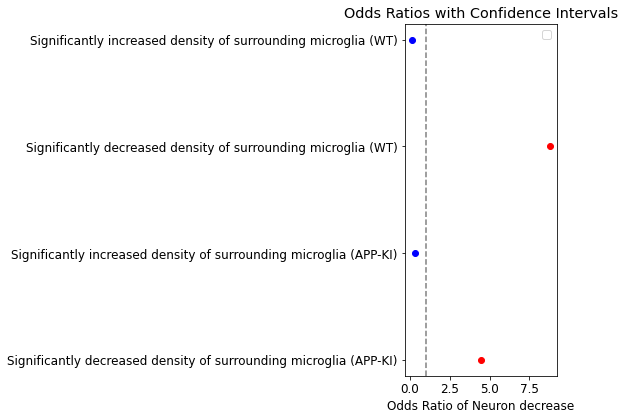

In [60]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# データタイプの定義
dt_final = np.dtype([
    ('X(um)', 'f4'), ('Y(um)', 'f4'), ('Z(um)', 'f4'),
    ('NeuN_positive', 'f4'), ('Iba1_positive', 'f4'), ('atlasID', 'u2'),
    ('id', 'u4'), ('coef', 'f8'), ('adjusted_pvalue', 'f8'),
    ('-log10(adjusted_pvalue)', 'f8'), ('mean_age1', 'f8'), ('mean_age3', 'f8'),
    ('mean_age5', 'f8'), ('mean_age7', 'f8'), ('mean_age9', 'f8'), ('change_point', 'f8')
])

# データの読み込み
def load_data(neuron_path, microglia_path):
    neuron_data = np.fromfile(neuron_path, dtype=dt_final)
    microglia_data = np.fromfile(microglia_path, dtype=dt_final)
    neuron_df = pd.DataFrame(neuron_data)
    microglia_df = pd.DataFrame(microglia_data)
    return neuron_df, microglia_df

# オッズ比と信頼区間の計算関数
def calculate_odds_ratio(neuron_df, microglia_df, condition):
    microglia_decrease = microglia_df.query(f'{condition} & (adjusted_pvalue < 0.05)')
    decrease_neuron_ids = set(microglia_decrease['id'])
    neuron_df['microglia_related'] = neuron_df['id'].apply(lambda x: x in decrease_neuron_ids)
    neuron_df['neuron_decrease'] = (neuron_df['coef'] < 0) & (neuron_df['adjusted_pvalue'] < 0.05)
    cross_tab = pd.crosstab(neuron_df['microglia_related'], neuron_df['neuron_decrease'])
    print(cross_tab)
    if cross_tab.shape == (2, 2):
        odds_ratio, p_value = stats.fisher_exact(cross_tab)
        conf_interval = stats.norm.interval(0.95, loc=np.log(odds_ratio), scale=np.sqrt(1/cross_tab.values.sum()))
        conf_interval = np.exp(conf_interval)
        return odds_ratio, conf_interval, p_value
    return None, None, None

# データセットの定義
datasets = [
    ("/export2/Imaging/ds4_Data4/Cellome/grid_points_with_all_including_onsets_APPAge3.bin",
     "/export2/Imaging/ds4_Data4/Cellome/grid_points_with_all_including_onsets_APPAge_Iba13.bin"),
    ("/export2/Imaging/ds4_Data4/Cellome/grid_points_with_all_including_onsets_AgeWithout12m3.bin",
     "/export2/Imaging/ds4_Data4/Cellome/grid_points_with_all_including_onsets_AgeWithout12m_Iba13.bin")
]

# データの読み込み
loaded_datasets = []
for neuron_path, microglia_path in datasets:
    neuron_df, microglia_df = load_data(neuron_path, microglia_path)
    loaded_datasets.append((neuron_df, microglia_df))

# プロットデータの準備
conditions = ['coef < 0', 'coef > 0']
results = []
for neuron_df, microglia_df in loaded_datasets:
    for condition in conditions:
        odds_ratio, conf_interval, p_value = calculate_odds_ratio(neuron_df, microglia_df, condition)
        if odds_ratio is not None:
            results.append((odds_ratio, conf_interval, p_value, condition))

# y軸のラベルの設定
y_labels = [
    "Significantly decreased density of surrounding microglia (APP-KI)",
    "Significantly increased density of surrounding microglia (APP-KI)",
    "Significantly decreased density of surrounding microglia (WT)",
    "Significantly increased density of surrounding microglia (WT)"
]

# フォントサイズの設定
plt.rcParams.update({'font.size': 12})

# プロットの作成
fig, ax = plt.subplots(figsize=(8, len(results) * 1.5))

for i, (odds_ratio, conf_interval, p_value, condition) in enumerate(results):
    color = 'blue' if odds_ratio < 1 else 'red'
    ax.errorbar(odds_ratio, i, xerr=[[odds_ratio - conf_interval[0]], [conf_interval[1] - odds_ratio]], fmt='o', color=color)
ax.axvline(1, color='grey', linestyle='--')
ax.set_yticks(range(len(results)))
ax.set_yticklabels(y_labels)
ax.set_xlabel('Odds Ratio of Neuron decrease')
ax.set_title('Odds Ratios with Confidence Intervals')

plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Fig.7cを作製する。

/home/mitani/my_env/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


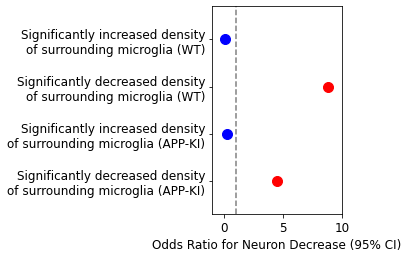

In [61]:
# フォントサイズの設定
import matplotlib
matplotlib.rcParams['pdf.use14corefonts'] = True

#plt.rcParams['font.family'] = 'DejaVu Sans'
#plt.rcParams['font.size'] = 70 

y_labels = [
    "Significantly decreased density\nof surrounding microglia (APP-KI)",
    "Significantly increased density\nof surrounding microglia (APP-KI)",
    "Significantly decreased density\nof surrounding microglia (WT)",
    "Significantly increased density\nof surrounding microglia (WT)"
]

plt.rcParams.update({'font.size': 12})

# プロットの作成
fig, ax = plt.subplots(figsize=(2, len(results) * 0.8))

for i, (odds_ratio, conf_interval, p_value, condition) in enumerate(results):
    color = 'blue' if odds_ratio < 1 else 'red'
    ax.errorbar(odds_ratio, i, xerr=[[odds_ratio - conf_interval[0]], [conf_interval[1] - odds_ratio]], fmt='o', color=color,
               markersize=10)
ax.axvline(1, color='grey', linestyle='--')
ax.set_xlim(-1, 10)
ax.set_ylim(-0.7, 3.7)
ax.set_yticks(range(len(results)))
ax.set_yticklabels(y_labels)
ax.set_xlabel('Odds Ratio for Neuron Decrease (95% CI)')
#ax.set_title('Odds Ratios with Confidence Intervals')

#plt.legend()

plt.tight_layout()
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)

# 透明な背景で保存
plt.savefig('/export3/Imaging/ds4_Data5/mitani/Neurology/Fig.7/WTandAPP_Neuron_decrease_risk_based_on_microglia_change.pdf', 
            transparent=True, dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()

In [16]:
results

[(4.463564935582118, array([4.46234739, 4.46478281]), 0.0, 'coef < 0'),
 (0.28931584182731523, array([0.28923692, 0.28939478]), 0.0, 'coef > 0'),
 (8.819663431007557, array([8.81725766, 8.82206986]), 0.0, 'coef < 0'),
 (0.09708088026910221, array([0.0970544 , 0.09710737]), 0.0, 'coef > 0')]

In [195]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm

# データタイプの定義
dt_final = np.dtype([
    ('X(um)', 'f4'), ('Y(um)', 'f4'), ('Z(um)', 'f4'),
    ('NeuN_positive', 'f4'), ('Iba1_positive', 'f4'), ('atlasID', 'u2'),
    ('id', 'u4'), ('coef', 'f8'), ('adjusted_pvalue', 'f8'),
    ('-log10(adjusted_pvalue)', 'f8'), ('mean_age1', 'f8'), ('mean_age3', 'f8'),
    ('mean_age5', 'f8'), ('mean_age7', 'f8'), ('mean_age9', 'f8'), ('change_point', 'f8')
])

# データの読み込み
def load_data(neuron_path, microglia_path):
    neuron_data = np.fromfile(neuron_path, dtype=dt_final)
    microglia_data = np.fromfile(microglia_path, dtype=dt_final)
    neuron_df = pd.DataFrame(neuron_data)
    microglia_df = pd.DataFrame(microglia_data)
    return neuron_df, microglia_df

# データ型の変換
def convert_dtypes(df):
    for col in df.columns:
        if df[col].dtype == 'O':
            df[col] = df[col].astype('float64')
    return df

# オッズ比と信頼区間の計算関数
def calculate_odds_ratio(neuron_df, microglia_df, condition):
    microglia_decrease = microglia_df.query(f'{condition} & (adjusted_pvalue < 0.05)')
    decrease_neuron_ids = set(microglia_decrease['id'])
    neuron_df['microglia_related'] = neuron_df['id'].apply(lambda x: x in decrease_neuron_ids)
    neuron_df['neuron_decrease'] = (neuron_df['coef'] < 0) & (neuron_df['adjusted_pvalue'] < 0.05)
    cross_tab = pd.crosstab(neuron_df['microglia_related'], neuron_df['neuron_decrease'])
    print(cross_tab)
    if cross_tab.shape == (2, 2):
        # Convert data types
        neuron_df = convert_dtypes(neuron_df)
        model = sm.Logit(neuron_df['neuron_decrease'], sm.add_constant(neuron_df['microglia_related']))
        result = model.fit(disp=0)
        odds_ratio = np.exp(result.params[1])
        conf_interval = np.exp(result.conf_int(alpha=0.05).loc['microglia_related'].values)
        p_value = result.pvalues[1]
        return odds_ratio, conf_interval, p_value
    return None, None, None

# データセットの定義
datasets = [
    ("/export2/Imaging/ds4_Data4/Cellome/grid_points_with_all_including_onsets_APPAge3.bin",
     "/export2/Imaging/ds4_Data4/Cellome/grid_points_with_all_including_onsets_APPAge_Iba13.bin"),
    ("/export2/Imaging/ds4_Data4/Cellome/grid_points_with_all_including_onsets_AgeWithout12m3.bin",
     "/export2/Imaging/ds4_Data4/Cellome/grid_points_with_all_including_onsets_AgeWithout12m_Iba13.bin")
]

# データの読み込み
loaded_datasets = []
for neuron_path, microglia_path in datasets:
    neuron_df, microglia_df = load_data(neuron_path, microglia_path)
    loaded_datasets.append((neuron_df, microglia_df))



neuron_decrease       False    True 
microglia_related                   
False              45089341  2297253
True                3444624   783355


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [ ]:
# Fig.7cをつくる。

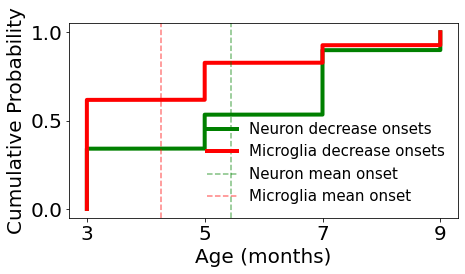

APP - Neuron Mean Onset: 5.453717663128467, Microglia Mean Onset: 4.258525189728795
T-statistic: 380.3500334958938, P-value: 0.0


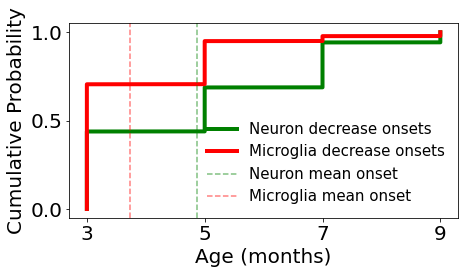

WT - Neuron Mean Onset: 4.863717129288136, Microglia Mean Onset: 3.7334769827802345
T-statistic: 256.07114130866813, P-value: 0.0


In [58]:
# フォントサイズの設定
import matplotlib
matplotlib.rcParams['pdf.use14corefonts'] = True

import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from statsmodels.distributions.empirical_distribution import ECDF

plt.rcParams.update({'font.size': 20})
# グラフと統計解析のための関数
def plot_cumulative_onsets(merged_data, condition, neuron_mean, microglia_mean):
    ecdf_neuron = ECDF(merged_data['change_point_neuron'])
    ecdf_microglia = ECDF(merged_data['change_point_microglia'])
    
    plt.figure(figsize=(6, 3))
    plt.plot(ecdf_neuron.x, ecdf_neuron.y, label='Neuron decrease onsets', color='green', linewidth=4)
    plt.plot(ecdf_microglia.x, ecdf_microglia.y, label='Microglia decrease onsets', color='red', linewidth=4)
    plt.axvline(x=neuron_mean, color='green', linestyle='--', label='Neuron mean onset', alpha = 0.5)
    plt.axvline(x=microglia_mean, color='red', linestyle='--', label='Microglia mean onset', alpha = 0.5)
    #plt.title(f'Cumulative Onsets for {condition}')
    plt.xticks([3, 5, 7, 9])
    plt.xlabel('Age (months)')
    plt.ylabel('Cumulative Probability')
    plt.legend(fontsize=15, frameon=False)
    plt.tight_layout()
    plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)

    # 透明な背景で保存
    plt.savefig(f'/export3/Imaging/ds4_Data5/mitani/Neurology/Fig.7/{condition}_Onset_Microglia_decrease_and_Neuron_decrease.pdf', 
                transparent=True, dpi=300, bbox_inches='tight', pad_inches=0.1)
    plt.show()


def perform_statistical_analysis(merged_data):
    neuron_onsets = merged_data['change_point_neuron']
    microglia_onsets = merged_data['change_point_microglia']
    
    # 平均値の計算
    neuron_mean = neuron_onsets.mean()
    microglia_mean = microglia_onsets.mean()
    
    # t検定による有意差の検定
    t_stat, p_value = ttest_ind(neuron_onsets, microglia_onsets)
    
    return neuron_mean, microglia_mean, t_stat, p_value

# 条件ごとの解析
conditions = ['APP', 'WT']
for (neuron_df, microglia_df), condition in zip(loaded_datasets, conditions):
    # データのフィルタリング
    filtered_neuron = neuron_df[(neuron_df['coef'] < 0) & (neuron_df['adjusted_pvalue'] < 0.05) & neuron_df['change_point'].notna()]
    filtered_microglia = microglia_df[(microglia_df['coef'] < 0) & (microglia_df['adjusted_pvalue'] < 0.05) & microglia_df['change_point'].notna()]
    
    # 共通のIDでデータをマージ
    merged_data = pd.merge(filtered_neuron[['id', 'change_point']], filtered_microglia[['id', 'change_point']], on='id', suffixes=('_neuron', '_microglia'))
    
    # 統計解析
    neuron_mean, microglia_mean, t_stat, p_value = perform_statistical_analysis(merged_data)
    
    # グラフのプロット
    plot_cumulative_onsets(merged_data, condition, neuron_mean, microglia_mean)
    
    print(f'{condition} - Neuron Mean Onset: {neuron_mean}, Microglia Mean Onset: {microglia_mean}')
    print(f'T-statistic: {t_stat}, P-value: {p_value}')




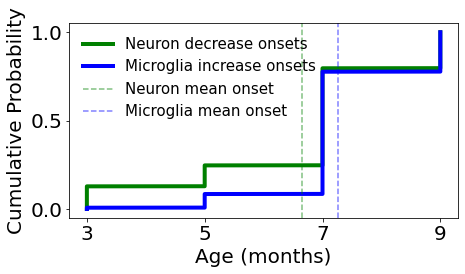

APP - Neuron Mean Onset: 6.658740329393896, Microglia Mean Onset: 7.263277801509327
T-statistic: -58.70078438000864, P-value: 0.0


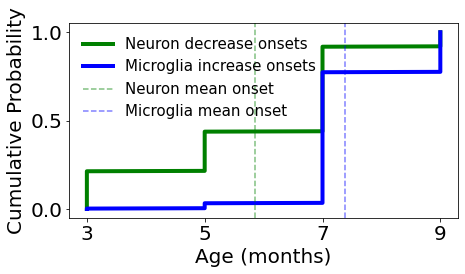

WT - Neuron Mean Onset: 5.855913978494623, Microglia Mean Onset: 7.374193548387097
T-statistic: -15.760845849784536, P-value: 9.078706664027818e-50


In [59]:
# フォントサイズの設定
import matplotlib
matplotlib.rcParams['pdf.use14corefonts'] = True

import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from statsmodels.distributions.empirical_distribution import ECDF

plt.rcParams.update({'font.size': 20})
# グラフと統計解析のための関数
def plot_cumulative_onsets(merged_data, condition, neuron_mean, microglia_mean):
    ecdf_neuron = ECDF(merged_data['change_point_neuron'])
    ecdf_microglia = ECDF(merged_data['change_point_microglia'])
    
    plt.figure(figsize=(6, 3))
    plt.plot(ecdf_neuron.x, ecdf_neuron.y, label='Neuron decrease onsets', color='green', linewidth=4)
    plt.plot(ecdf_microglia.x, ecdf_microglia.y, label='Microglia increase onsets', color='blue', linewidth=4)
    plt.axvline(x=neuron_mean, color='green', linestyle='--', label='Neuron mean onset', alpha = 0.5)
    plt.axvline(x=microglia_mean, color='blue', linestyle='--', label='Microglia mean onset', alpha = 0.5)
    #plt.title(f'Cumulative Onsets for {condition}')
    plt.xticks([3, 5, 7, 9])
    plt.xlabel('Age (months)')
    plt.ylabel('Cumulative Probability')
    plt.legend(fontsize=15, frameon=False)
    plt.tight_layout()
    plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)

    # 透明な背景で保存
    plt.savefig(f'/export3/Imaging/ds4_Data5/mitani/Neurology/Fig.7/{condition}_Onset_Microglia_increase_and_Neuron_decrease.pdf', 
                transparent=True, dpi=300, bbox_inches='tight', pad_inches=0.1)
    plt.show()


def perform_statistical_analysis(merged_data):
    neuron_onsets = merged_data['change_point_neuron']
    microglia_onsets = merged_data['change_point_microglia']
    
    # 平均値の計算
    neuron_mean = neuron_onsets.mean()
    microglia_mean = microglia_onsets.mean()
    
    # t検定による有意差の検定
    t_stat, p_value = ttest_ind(neuron_onsets, microglia_onsets)
    
    return neuron_mean, microglia_mean, t_stat, p_value

# 条件ごとの解析
conditions = ['APP', 'WT']
for (neuron_df, microglia_df), condition in zip(loaded_datasets, conditions):
    # データのフィルタリング
    filtered_neuron = neuron_df[(neuron_df['coef'] < 0) & (neuron_df['adjusted_pvalue'] < 0.05) & neuron_df['change_point'].notna()]
    filtered_microglia = microglia_df[(microglia_df['coef'] > 0) & (microglia_df['adjusted_pvalue'] < 0.05) & microglia_df['change_point'].notna()]
    
    # 共通のIDでデータをマージ
    merged_data = pd.merge(filtered_neuron[['id', 'change_point']], filtered_microglia[['id', 'change_point']], on='id', suffixes=('_neuron', '_microglia'))
    
    # 統計解析
    neuron_mean, microglia_mean, t_stat, p_value = perform_statistical_analysis(merged_data)
    
    # グラフのプロット
    plot_cumulative_onsets(merged_data, condition, neuron_mean, microglia_mean)
    
    print(f'{condition} - Neuron Mean Onset: {neuron_mean}, Microglia Mean Onset: {microglia_mean}')
    print(f'T-statistic: {t_stat}, P-value: {p_value}')


